# Pulsar Emission Data Analysis

# All Imports that may or may not be needed and used for the notebook


In [368]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat
from numpy import array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Section for extracting from a tar file. #

##### Currently implemented for original TAR File structure.

In [369]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

# Importing all data Pulsars 1 - 6

In [370]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar = pd.read_csv("Data/J0437-4715.pulses", sep = ' ', header = None, names = colnames)
pulsar2 = pd.read_csv("Data/J0953+0755.pulses", sep = ' ', header = None, names = colnames)
pulsar3 = pd.read_csv("Data/J0835-4510.pulses", sep = ' ', header = None, names = colnames)
pulsar4 = pd.read_csv("Data/J1243-6423.pulses", sep = ' ', header = None, names = colnames)
pulsar5 = pd.read_csv("Data/J1456-6843.pulses", sep = ' ', header = None, names = colnames)
pulsar6 = pd.read_csv("Data/J1644-4559.pulses", sep = ' ', header = None, names = colnames)

## Beginning of Exploration of Pulsar 1

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [371]:
pulsar.shape

(27000, 3)

In [372]:
pulsar.head(25)

Pulse Number  Brightness  Uncertainty
0              1    0.598393     0.056431
1              2    0.590859     0.055182
2              3    0.449643     0.063632
3              4    0.682860     0.056269
4              5    0.490026     0.046830
5              6    0.586071     0.052649
6              7    0.150353     0.056483
7              8    0.384684     0.052567
8              9    0.429094     0.055569
9             10    0.995865     0.075811
10            11    0.670907     0.049539
11            12    0.465406     0.047461
12            13    0.242442     0.050653
13            14    0.500057     0.050163
14            15    0.658159     0.050743
15            16    0.404870     0.056679
16            17    0.595339     0.065296
17            18    0.230061     0.051813
18            19    0.423335     0.049558
19            20    0.208840     0.049900
20            21    0.297223     0.048826
21            22    0.749683     0.071350
22            23    0.387574     0.054314
23            24    0.466527     0.045075
24            25    1.333974     0.092806

In [373]:
pulsar.describe()

Pulse Number    Brightness   Uncertainty
count   27000.00000  27000.000000  27000.000000
mean    13500.50000      0.536400      0.062556
std      7794.37297      0.413764      0.056313
min         1.00000     -5.114133      0.015426
25%      6750.75000      0.296443      0.052381
50%     13500.50000      0.423816      0.056856
75%     20250.25000      0.643723      0.063111
max     27000.00000     18.722410      3.049559

In [374]:
nullBoolBrightness = pd.isnull(pulsar["Brightness"])

pulsar[nullBoolBrightness]

Empty DataFrame
Columns: [Pulse Number, Brightness, Uncertainty]
Index: []

In [375]:
pulsar["Brightness"].describe()

count    27000.000000
mean         0.536400
std          0.413764
min         -5.114133
25%          0.296443
50%          0.423816
75%          0.643723
max         18.722410
Name: Brightness, dtype: float64

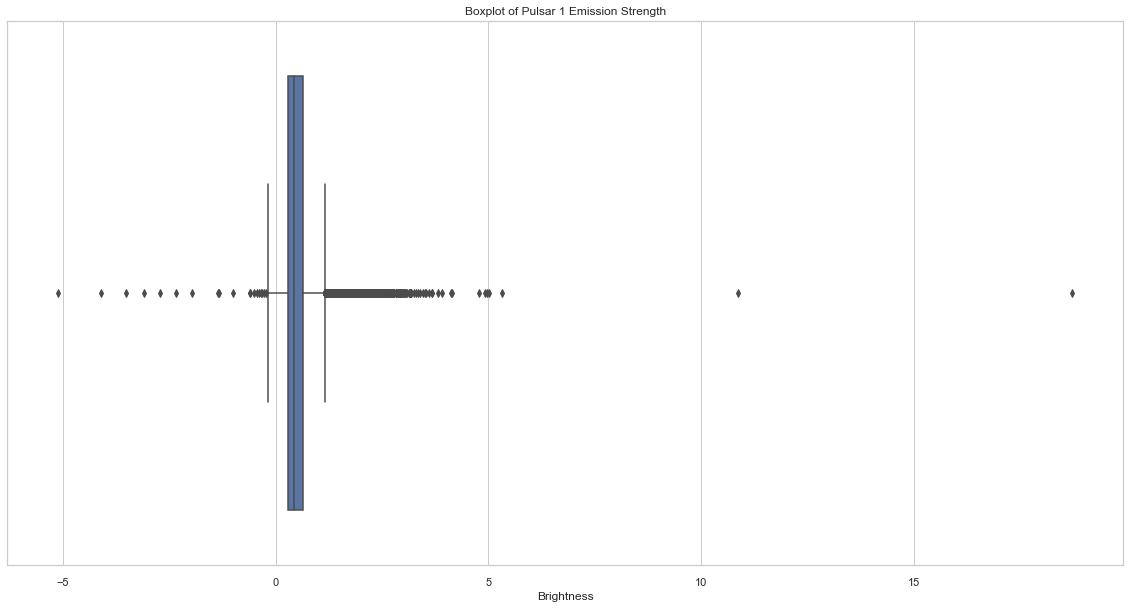

In [376]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar["Brightness"]).set_title("Boxplot of Pulsar 1 Emission Strength")

In [377]:
medianpulse = pulsar["Brightness"].median()
print("Median of Pulsar6: ", medianpulse)
pulsar['Binary'] = np.where(pulsar['Brightness'] > medianpulse, 1, 0)

Median of Pulsar6:  0.42381595


In [378]:
pulsar

Pulse Number  Brightness  Uncertainty  Binary
0                 1    0.598393     0.056431       1
1                 2    0.590859     0.055182       1
2                 3    0.449643     0.063632       1
3                 4    0.682860     0.056269       1
4                 5    0.490026     0.046830       1
...             ...         ...          ...     ...
26995         26996    0.539079     0.063854       1
26996         26997    0.324070     0.054332       0
26997         26998    0.291341     0.058106       0
26998         26999    0.346267     0.058064       0
26999         27000    0.513315     0.064349       1

[27000 rows x 4 columns]

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


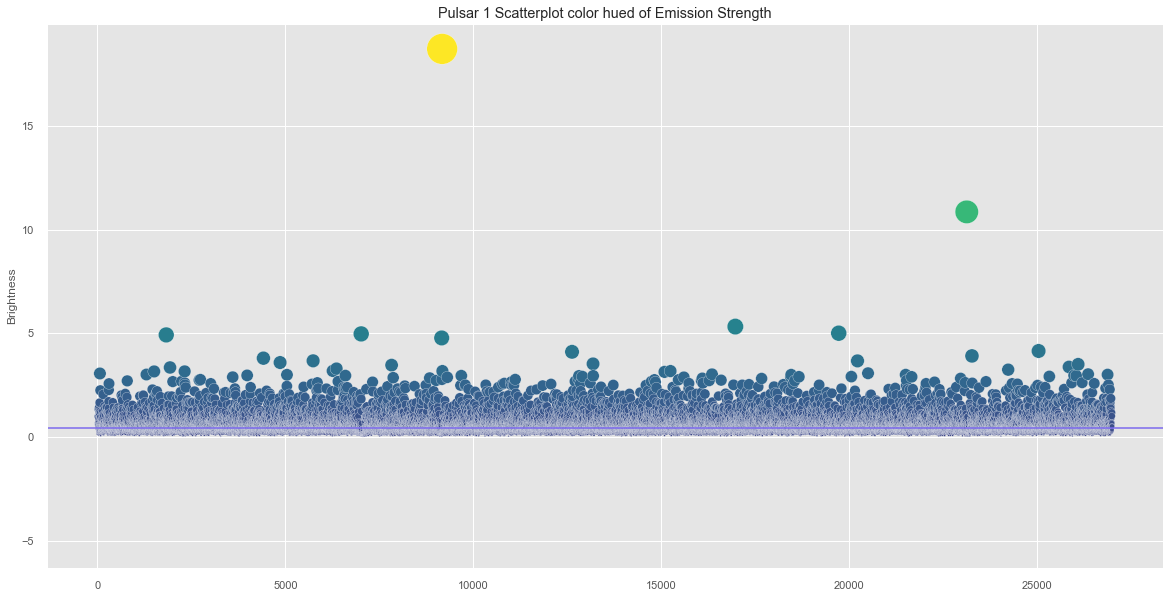

In [379]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 1 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.42381595, ls='-',c='mediumslateblue')

In [380]:
print(len(pulsar[(pulsar.Brightness > 0.42381595)]))
print(len(pulsar[(pulsar.Brightness < 0.42381595)]))

13500
13500


In [381]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = pulsar.Brightness.values
#ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
#ax = sns.swarmplot(data=pulsar["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 1 Brightness')

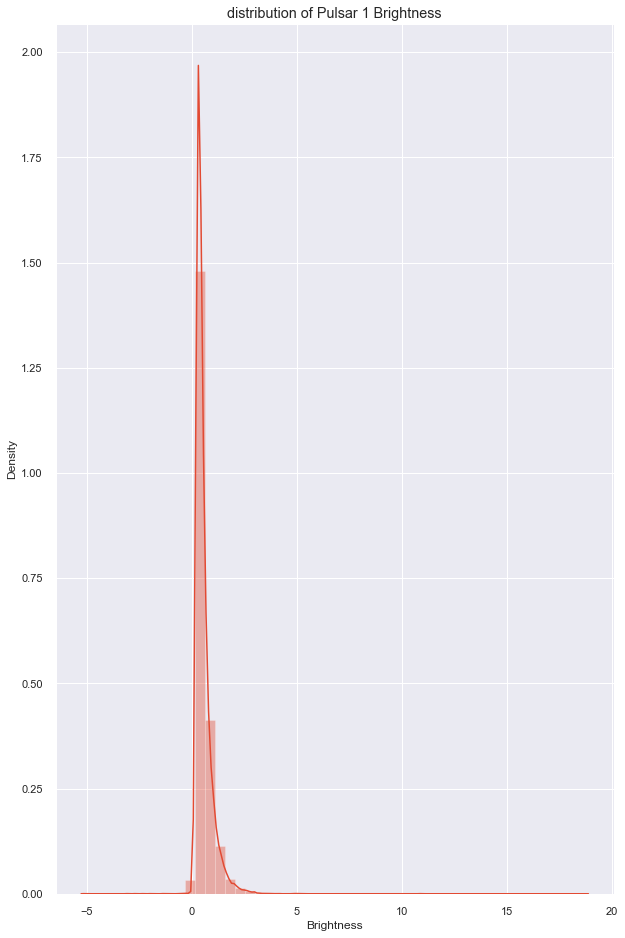

In [382]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar.Brightness)
plt.title("distribution of Pulsar 1 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 1 binary assignments')

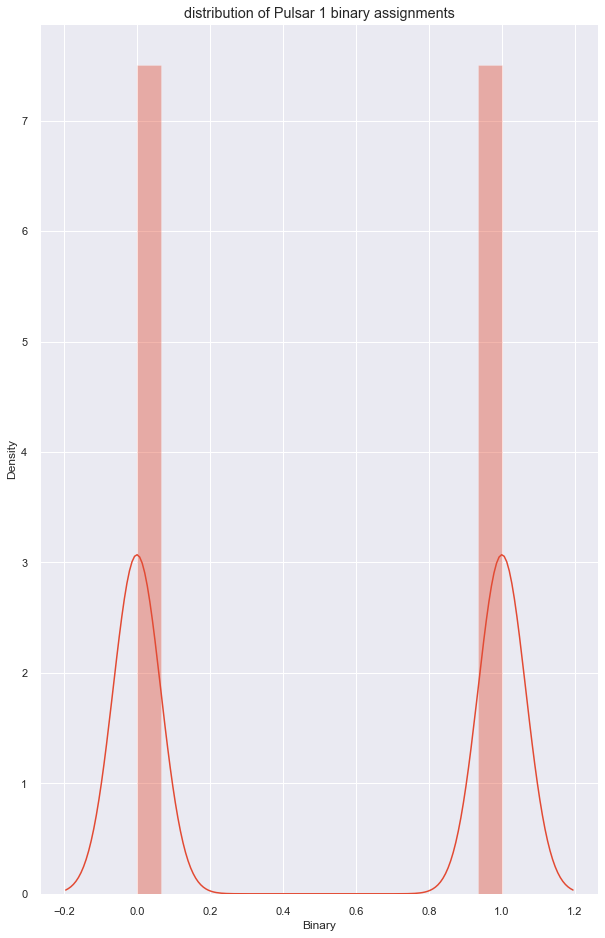

In [383]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar.Binary)
plt.title("distribution of Pulsar 1 binary assignments")

## Conclusion of Perliminary Pulsar 1 Exploration.



## Beginning of Exploration of Pulsar 2

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [384]:
pulsar2.shape

(14329, 3)

In [385]:
pulsar2.head(25)

Pulse Number  Brightness  Uncertainty
0              1    0.334330     0.015570
1              2   -0.098659     0.014051
2              3    0.123514     0.011901
3              4    0.443923     0.014365
4              5    1.590446     0.057785
5              6    1.233848     0.018692
6              7    0.857876     0.022208
7              8    0.254255     0.018185
8              9    0.292077     0.021672
9             10    0.439929     0.046293
10            11    0.824310     0.036243
11            12    1.443460     0.088372
12            13    0.127981     0.018070
13            14    0.327896     0.012362
14            15    2.473663     0.099205
15            16    0.683800     0.049683
16            17    0.744937     0.033909
17            18    0.628764     0.032342
18            19    5.077294     0.093078
19            20    0.554981     0.025086
20            21    1.006799     0.029068
21            22    4.359872     0.091381
22            23    1.576034     0.030928
23            24    1.218368     0.067754
24            25    1.377933     0.036103

In [386]:
pulsar2.describe()

Pulse Number    Brightness   Uncertainty
count  14329.000000  14329.000000  14329.000000
mean    7165.000000      0.994458      0.034561
std     4136.570339      1.211127      0.029641
min        1.000000     -0.219110      0.010120
25%     3583.000000      0.184157      0.014351
50%     7165.000000      0.481894      0.021999
75%    10747.000000      1.337406      0.043380
max    14329.000000      8.552022      0.242041

In [387]:
nullBoolBrightness = pd.isnull(pulsar2["Brightness"])

pulsar2[nullBoolBrightness]

Empty DataFrame
Columns: [Pulse Number, Brightness, Uncertainty]
Index: []

In [388]:
pulsar2["Brightness"].describe()

count    14329.000000
mean         0.994458
std          1.211127
min         -0.219110
25%          0.184157
50%          0.481894
75%          1.337406
max          8.552022
Name: Brightness, dtype: float64

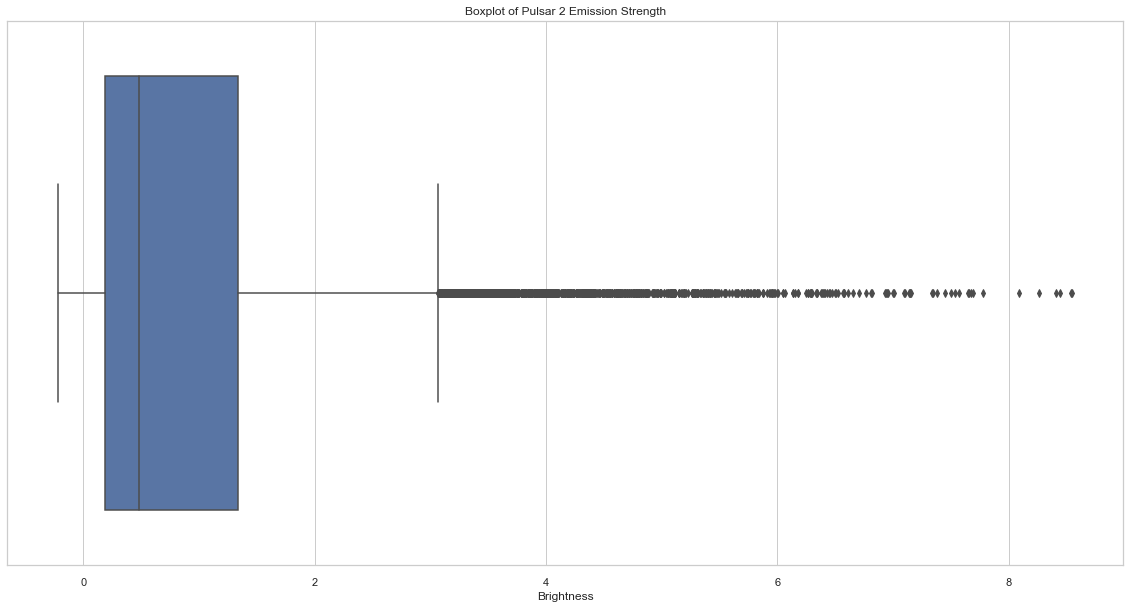

In [389]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar2["Brightness"]).set_title("Boxplot of Pulsar 2 Emission Strength")

In [390]:
medianpulse2 = pulsar2["Brightness"].median()
print("Median of Pulsar2: ", medianpulse2)
pulsar2['Binary'] = np.where(pulsar2['Brightness'] > medianpulse2, 1, 0)

Median of Pulsar2:  0.4818942


In [391]:
pulsar2

Pulse Number  Brightness  Uncertainty  Binary
0                 1    0.334330     0.015570       0
1                 2   -0.098659     0.014051       0
2                 3    0.123514     0.011901       0
3                 4    0.443923     0.014365       0
4                 5    1.590446     0.057785       1
...             ...         ...          ...     ...
14324         14325    4.876881     0.097181       1
14325         14326    2.074136     0.080444       1
14326         14327    0.585504     0.026204       1
14327         14328    0.360930     0.035051       0
14328         14329    8.409811     0.120164       1

[14329 rows x 4 columns]

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


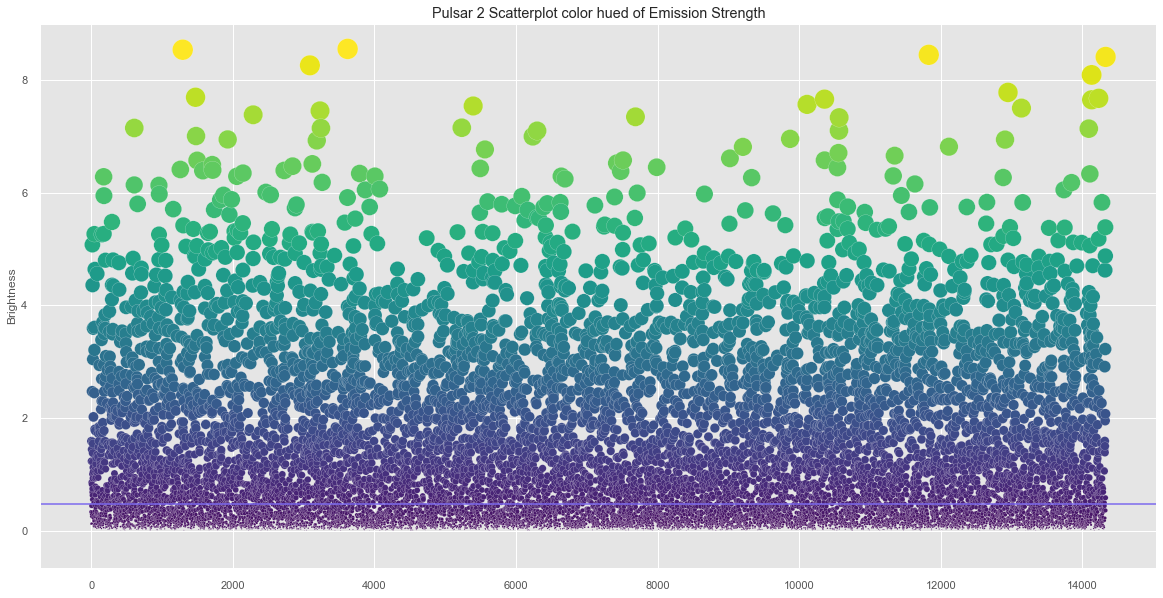

In [392]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar2.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar2["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 2 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.4818942, ls='-',c='mediumslateblue')

In [393]:
print(len(pulsar2[(pulsar2.Brightness > 0.4818942)]))
print(len(pulsar2[(pulsar2.Brightness < 0.4818942)]))

7164
7164


Text(0.5, 1.0, 'distribution of Pulsar 2 Brightness')

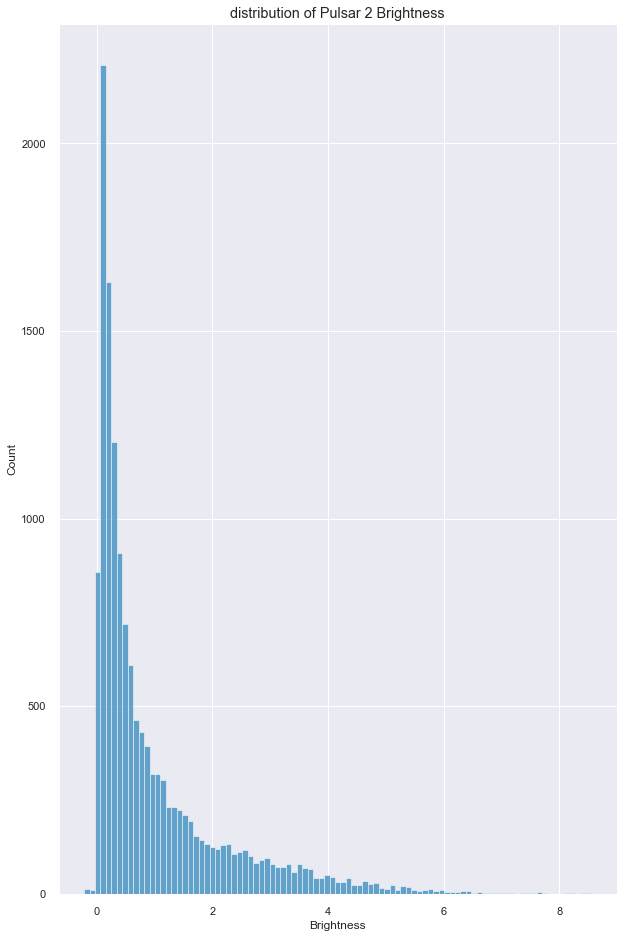

In [394]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.histplot(pulsar2.Brightness)
plt.title("distribution of Pulsar 2 Brightness")

Text(0.5, 1.0, 'distribution of Pulsar 2 binary assignments')

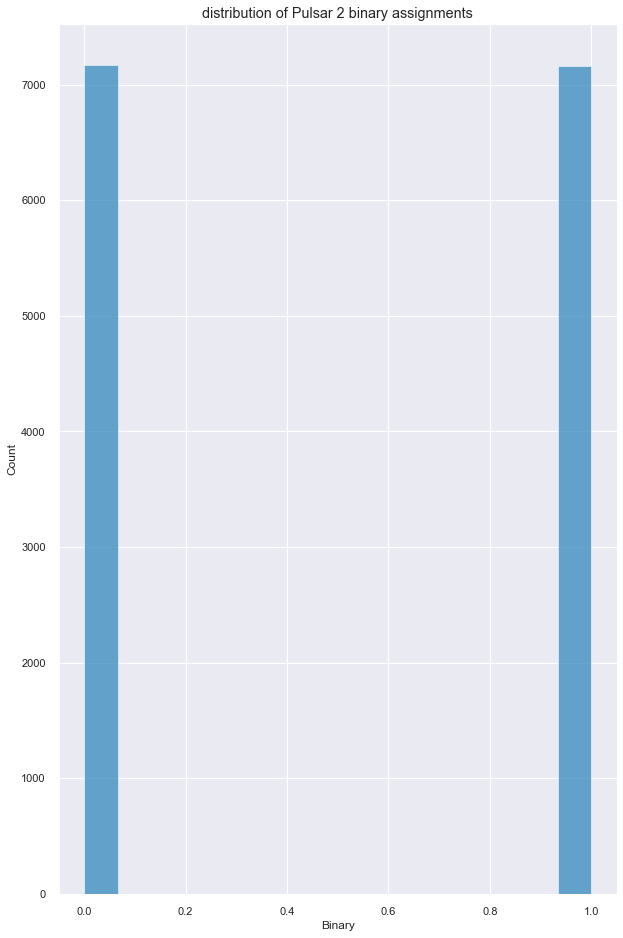

In [395]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.histplot(pulsar2.Binary)
plt.title("distribution of Pulsar 2 binary assignments")

# Beginning of Exploration of Pulsar 3

In [396]:
pulsar3.shape

(1331, 3)

In [397]:
pulsar3.head(25)

Pulse Number  Brightness  Uncertainty
0              1    0.984043     0.053831
1              2    2.487928     0.048796
2              3    1.690295     0.025639
3              4    1.196142     0.039539
4              5    1.979783     0.041460
5              6    2.297645     0.054210
6              7    2.322135     0.043554
7              8    2.289047     0.049957
8              9    2.442574     0.025110
9             10    2.136332     0.022712
10            11    1.976790     0.037551
11            12    2.445764     0.047004
12            13    1.937017     0.028561
13            14    2.315184     0.045216
14            15    2.584888     0.040232
15            16    1.581452     0.030372
16            17    1.849656     0.024236
17            18    2.529834     0.048330
18            19    2.894401     0.066794
19            20    2.769474     0.059082
20            21    1.824490     0.036531
21            22    1.498133     0.035557
22            23    2.005834     0.028621
23            24    2.594836     0.032925
24            25    2.745045     0.055348

In [398]:
nullBoolBrightness = pd.isnull(pulsar3["Brightness"])

pulsar3[nullBoolBrightness]

Empty DataFrame
Columns: [Pulse Number, Brightness, Uncertainty]
Index: []

In [399]:
pulsar3["Brightness"].describe()

count    1331.000000
mean        2.248107
std         0.591161
min         0.633413
25%         1.825375
50%         2.255182
75%         2.682259
max         4.050718
Name: Brightness, dtype: float64

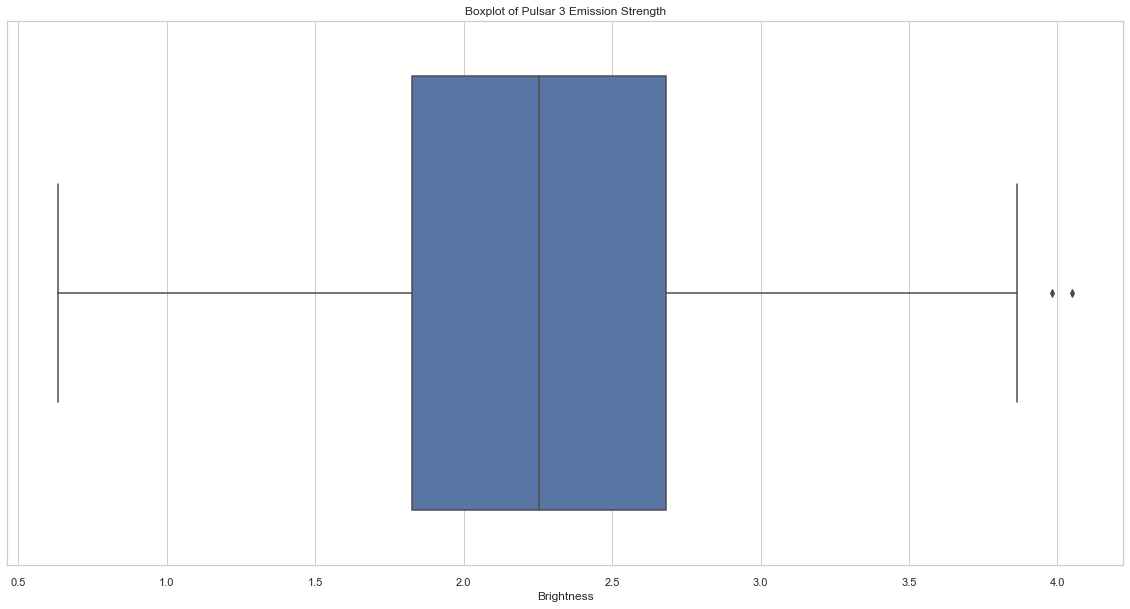

In [400]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar3["Brightness"]).set_title("Boxplot of Pulsar 3 Emission Strength")

In [401]:
medianpulse3 = pulsar3["Brightness"].median()
print("Median of Pulsar6: ", medianpulse3)
pulsar3['Binary'] = np.where(pulsar3['Brightness'] > medianpulse3, 1, 0)

Median of Pulsar6:  2.255182


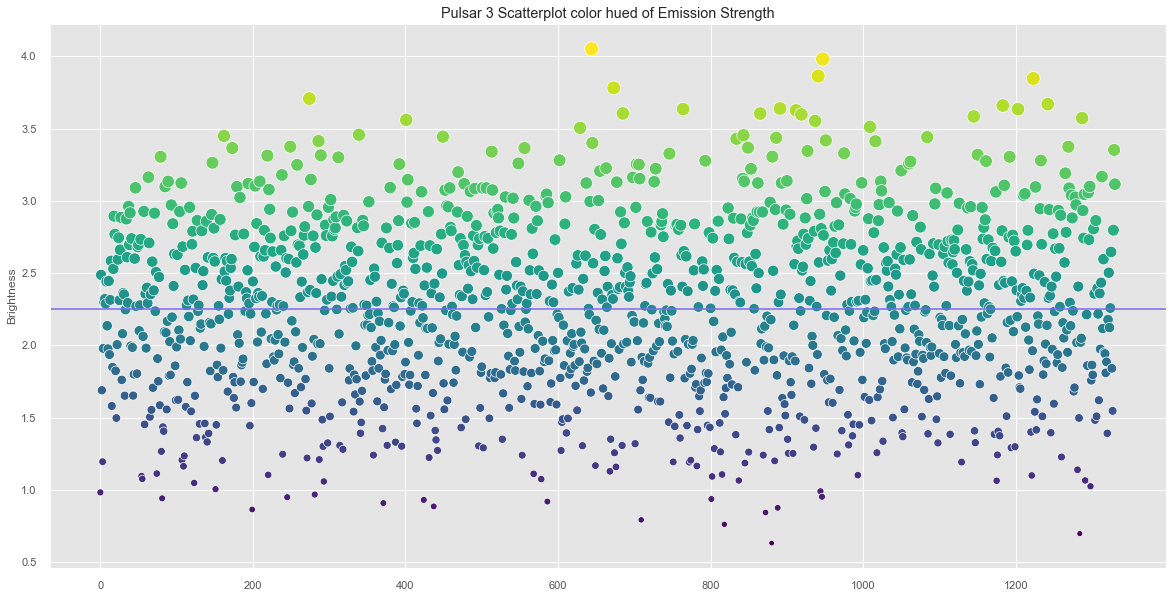

In [402]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar3.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar3["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 3 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=2.255182, ls='-',c='mediumslateblue')

In [403]:
print(len(pulsar3[(pulsar3.Brightness > 2.255182)]))
print(len(pulsar3[(pulsar3.Brightness < 2.255182)]))

665
665


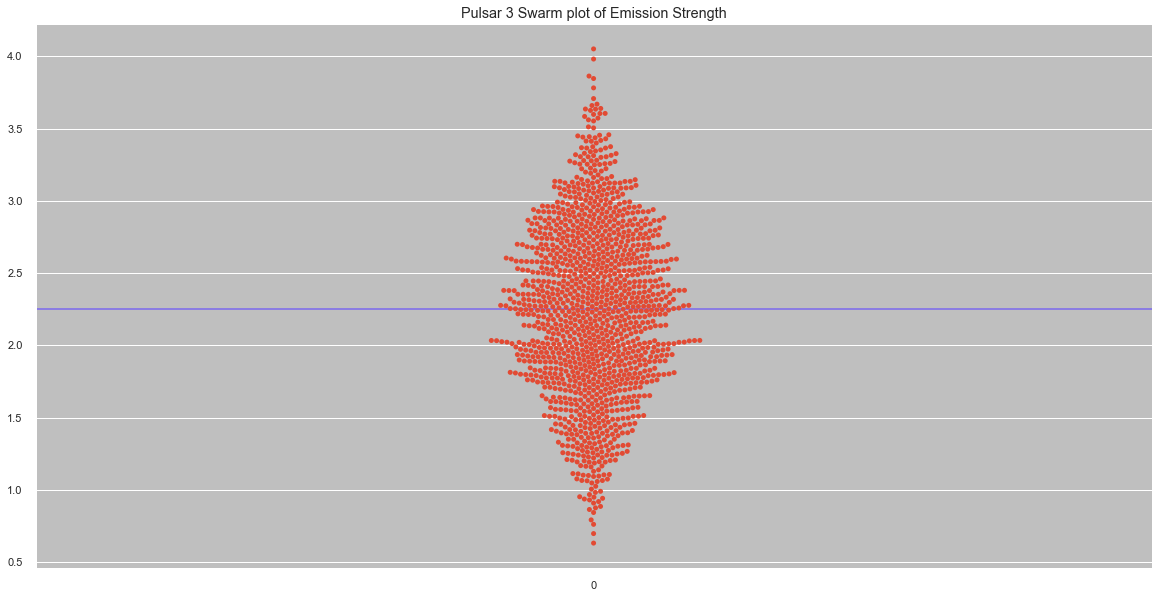

In [404]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar3.Brightness.values
ax = plt.axhline( y=2.255182, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar3["Brightness"], c="blue").set_title('Pulsar 3 Swarm plot of Emission Strength')


c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 3 Brightness')

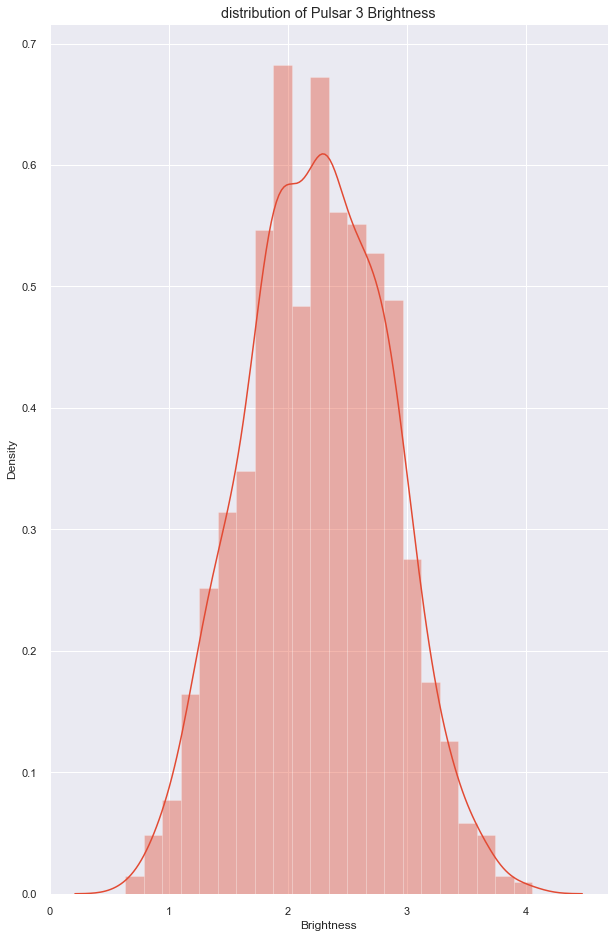

In [405]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar3.Brightness)
plt.title("distribution of Pulsar 3 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 3 binary assignments')

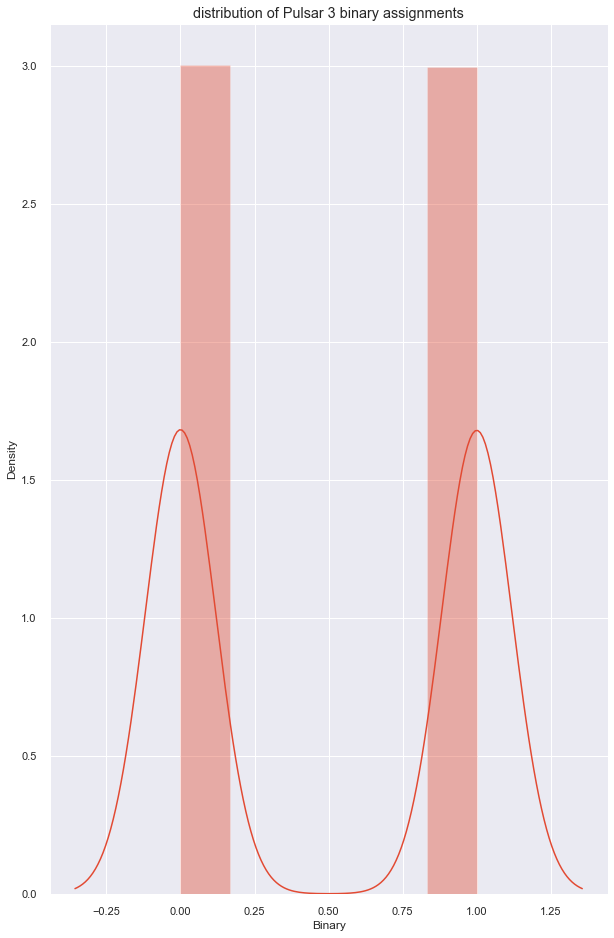

In [406]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar3.Binary)
plt.title("distribution of Pulsar 3 binary assignments")

# Beginning of Exploration of Pulsar 4

In [407]:
pulsar4.shape

(1819, 3)

In [408]:
pulsar4.head(25)

Pulse Number  Brightness  Uncertainty
0              1    0.101127     0.001893
1              2    0.012166     0.001814
2              3    0.021918     0.001835
3              4    0.181179     0.002183
4              5    0.000240     0.001725
5              6    0.085866     0.001723
6              7    0.067280     0.001778
7              8    0.092884     0.002438
8              9    0.083350     0.002101
9             10    0.087871     0.001941
10            11    0.123529     0.002026
11            12    0.097413     0.001878
12            13    0.100649     0.001820
13            14    0.058025     0.001724
14            15    0.116164     0.001948
15            16    0.029203     0.001918
16            17    0.174895     0.002131
17            18    0.200468     0.002571
18            19    0.123890     0.001805
19            20    0.083496     0.001856
20            21    0.042757     0.001891
21            22    0.119953     0.001744
22            23    0.096266     0.001911
23            24    0.040698     0.001975
24            25    0.175852     0.002251

In [409]:
pulsar4.describe()

Pulse Number   Brightness  Uncertainty
count   1819.000000  1819.000000  1819.000000
mean     910.000000     0.075070     0.001958
std      525.244388     0.057006     0.000306
min        1.000000    -0.004643     0.001532
25%      455.500000     0.019738     0.001774
50%      910.000000     0.076660     0.001872
75%     1364.500000     0.112285     0.002041
max     1819.000000     0.269903     0.005952

In [410]:
nullBoolBrightness = pd.isnull(pulsar4["Brightness"])

pulsar4[nullBoolBrightness]

Empty DataFrame
Columns: [Pulse Number, Brightness, Uncertainty]
Index: []

In [411]:
pulsar4["Brightness"].describe()

count    1819.000000
mean        0.075070
std         0.057006
min        -0.004643
25%         0.019738
50%         0.076660
75%         0.112285
max         0.269903
Name: Brightness, dtype: float64

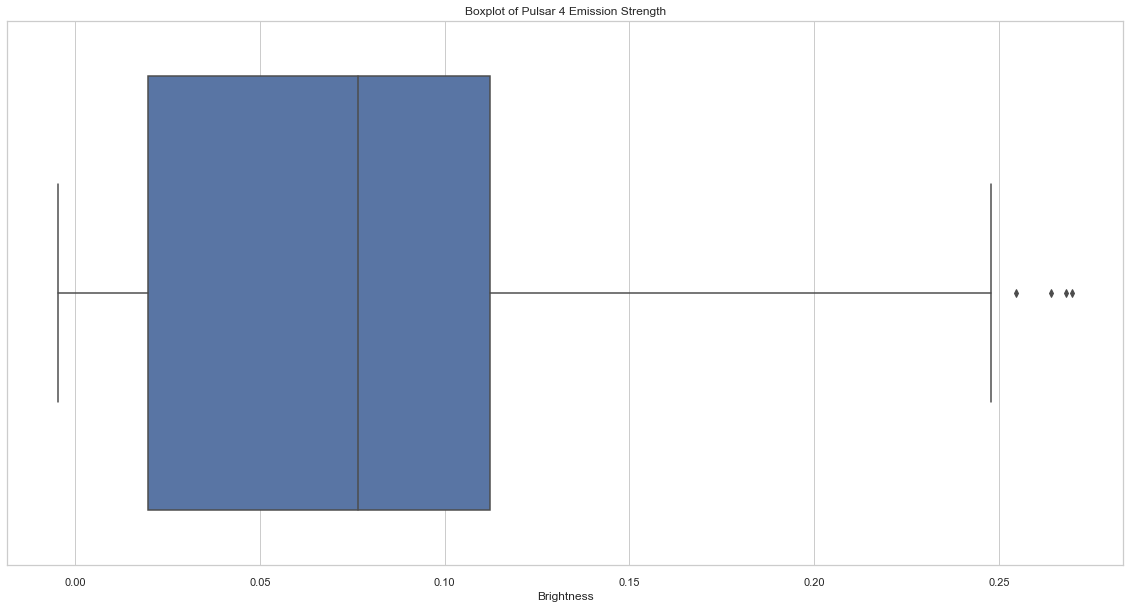

In [412]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar4["Brightness"]).set_title("Boxplot of Pulsar 4 Emission Strength")

In [413]:
medianpulse4 = pulsar4["Brightness"].median()
print("Median of Pulsar6: ", medianpulse4)
pulsar4['Binary'] = np.where(pulsar4['Brightness'] > medianpulse4, 1, 0)

Median of Pulsar6:  0.07665979


In [414]:
pulsar4

Pulse Number  Brightness  Uncertainty  Binary
0                1    0.101127     0.001893       1
1                2    0.012166     0.001814       0
2                3    0.021918     0.001835       0
3                4    0.181179     0.002183       1
4                5    0.000240     0.001725       0
...            ...         ...          ...     ...
1814          1815    0.105178     0.002086       1
1815          1816    0.064272     0.001995       0
1816          1817    0.000171     0.001730       0
1817          1818   -0.000924     0.001706       0
1818          1819    0.000001     0.001532       0

[1819 rows x 4 columns]

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


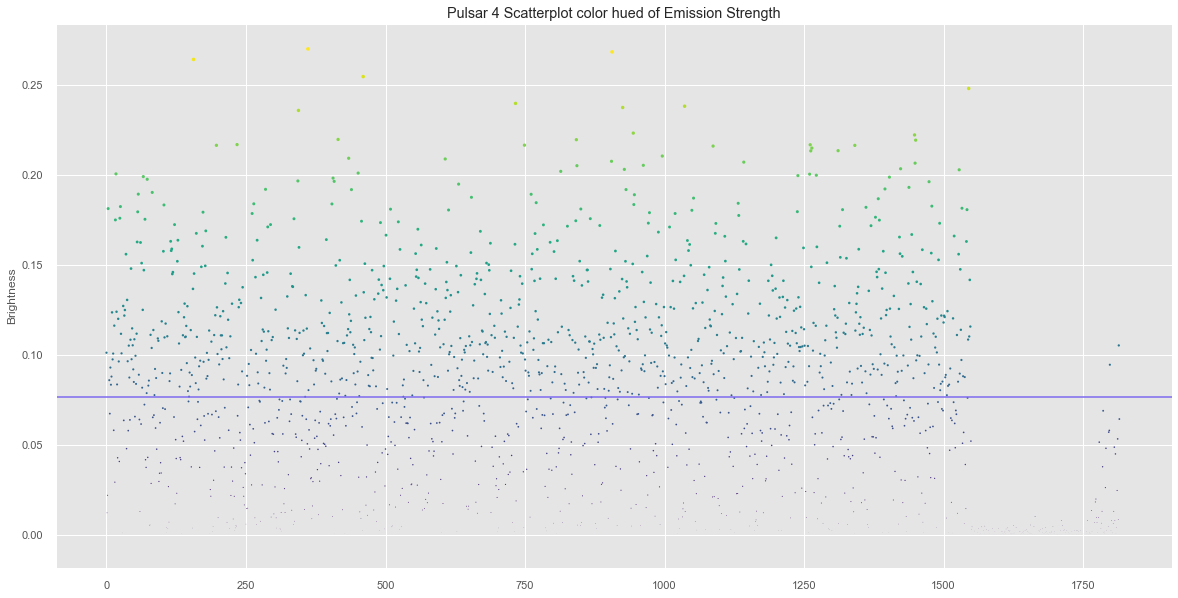

In [415]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar4.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar4["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 4 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.07665979, ls='-',c='mediumslateblue')

In [416]:
print(len(pulsar4[(pulsar4.Brightness > 0.07665979)]))
print(len(pulsar4[(pulsar4.Brightness < 0.07665979)]))

909
909


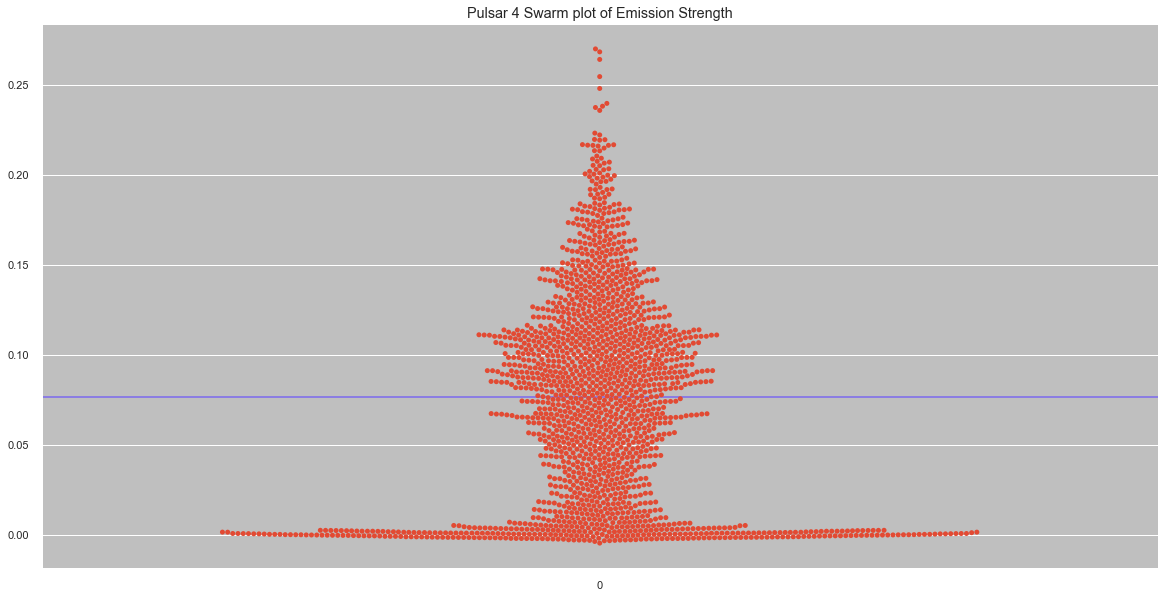

In [417]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar4.Brightness.values
ax = plt.axhline( y=0.07665979, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar4["Brightness"], c="blue").set_title('Pulsar 4 Swarm plot of Emission Strength')


c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 4 Brightness')

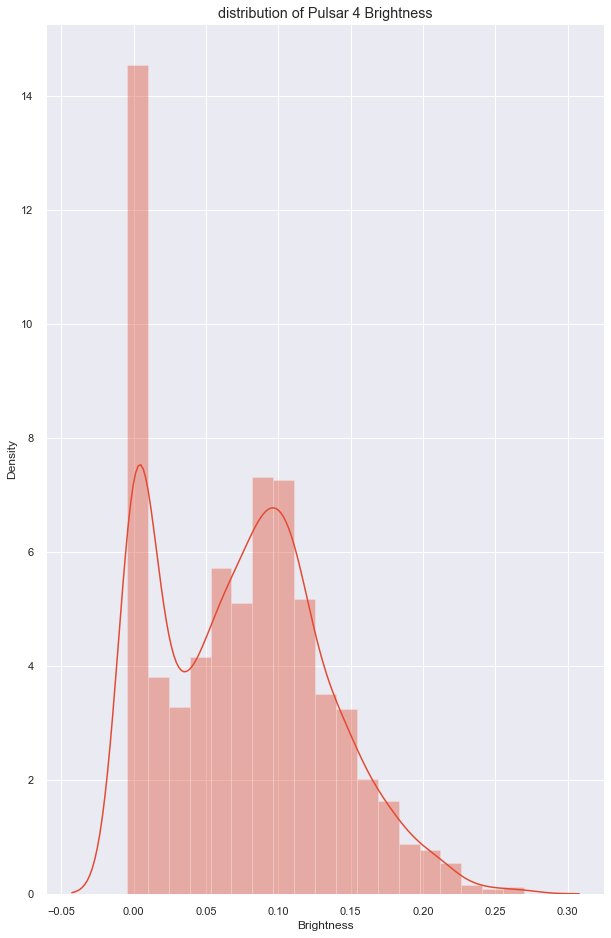

In [418]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar4.Brightness)
plt.title("distribution of Pulsar 4 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 4 binary assignments')

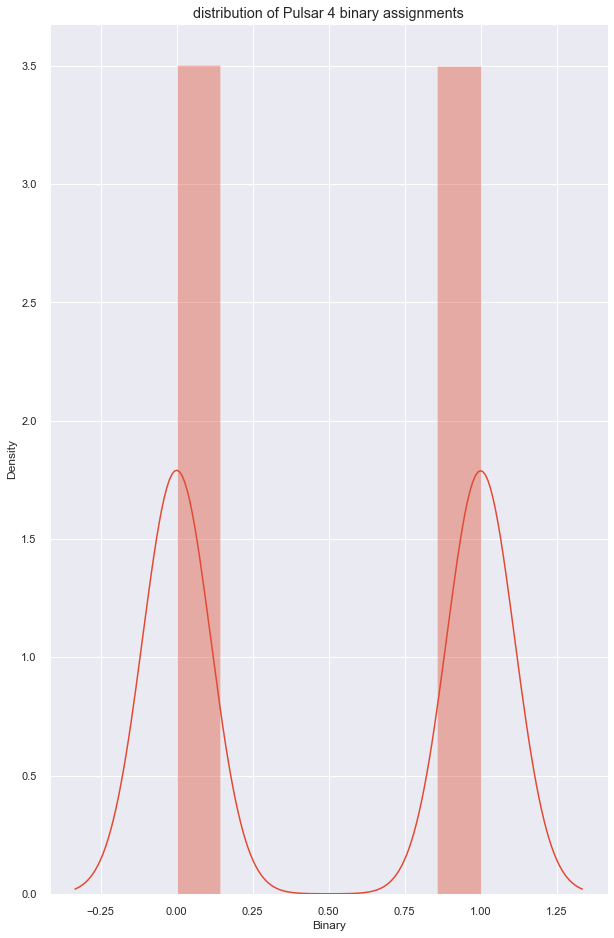

In [419]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar4.Binary)
plt.title("distribution of Pulsar 4 binary assignments")

# Beginning of Exploration of Pulsar 5

In [420]:
pulsar5.shape

(1219, 3)

In [421]:
pulsar5.head(25)

Pulse Number  Brightness  Uncertainty
0              1    0.053904     0.005560
1              2    0.058653     0.004821
2              3    0.110208     0.005196
3              4    0.034716     0.004729
4              5    0.056101     0.004619
5              6    0.046168     0.005074
6              7    0.055648     0.004916
7              8    0.060890     0.004581
8              9    0.024388     0.004922
9             10    0.039370     0.004633
10            11    0.009141     0.004581
11            12    0.145273     0.005053
12            13    0.039953     0.004938
13            14   -0.002554     0.004409
14            15    0.035696     0.004903
15            16    0.046869     0.004706
16            17    0.082637     0.004596
17            18    0.349419     0.006828
18            19    0.058343     0.004650
19            20    0.090261     0.005068
20            21    0.120429     0.005141
21            22    0.209730     0.005389
22            23    0.088045     0.004945
23            24    0.203736     0.008553
24            25    0.024098     0.004641

In [422]:
pulsar5.describe()

Pulse Number   Brightness  Uncertainty
count   1219.000000  1219.000000  1219.000000
mean     610.000000     0.104176     0.005410
std      352.039297     0.081916     0.001282
min        1.000000    -0.007285     0.001075
25%      305.500000     0.045763     0.004728
50%      610.000000     0.081228     0.004966
75%      914.500000     0.144228     0.005541
max     1219.000000     0.825366     0.016201

In [423]:
nullBoolBrightness = pd.isnull(pulsar5["Brightness"])

pulsar5[nullBoolBrightness]

Empty DataFrame
Columns: [Pulse Number, Brightness, Uncertainty]
Index: []

In [424]:
pulsar5["Brightness"].describe()

count    1219.000000
mean        0.104176
std         0.081916
min        -0.007285
25%         0.045763
50%         0.081228
75%         0.144228
max         0.825366
Name: Brightness, dtype: float64

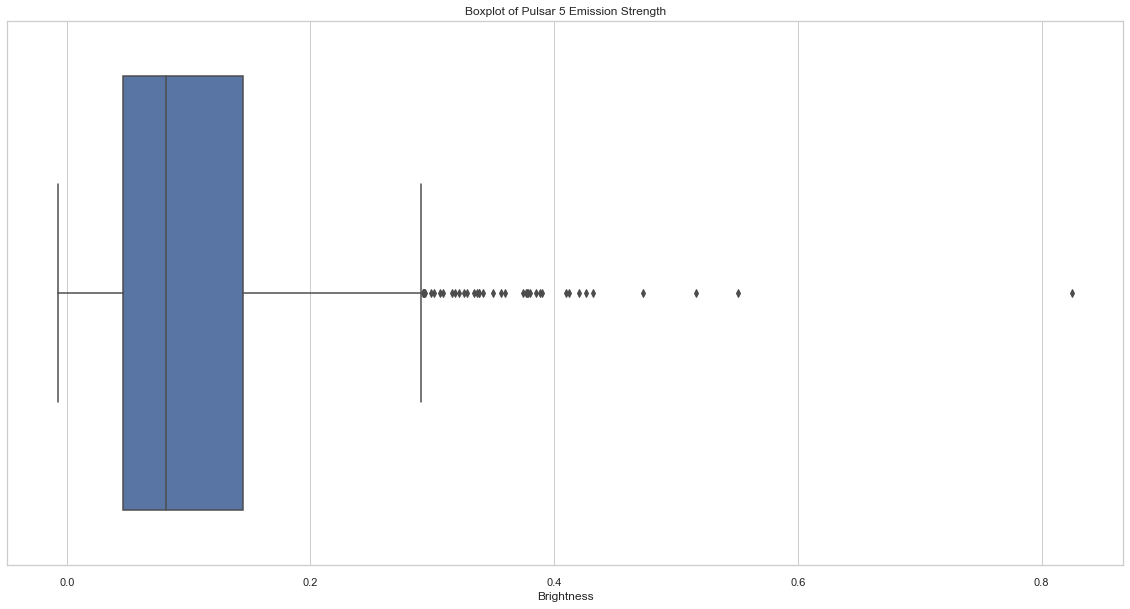

In [425]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar5["Brightness"]).set_title("Boxplot of Pulsar 5 Emission Strength")

In [426]:
medianpulse5 = pulsar5["Brightness"].median()
print("Median of Pulsar6: ", medianpulse5)
pulsar5['Binary'] = np.where(pulsar5['Brightness'] > medianpulse5, 1, 0)

Median of Pulsar6:  0.081228


In [427]:
pulsar5

Pulse Number    Brightness  Uncertainty  Binary
0                1  5.390386e-02     0.005560       0
1                2  5.865279e-02     0.004821       0
2                3  1.102083e-01     0.005196       1
3                4  3.471609e-02     0.004729       0
4                5  5.610133e-02     0.004619       0
...            ...           ...          ...     ...
1214          1215  4.321559e-02     0.004991       0
1215          1216  1.830750e-02     0.004578       0
1216          1217  1.155671e-01     0.005212       1
1217          1218  1.562609e-02     0.004686       0
1218          1219 -1.137418e-08     0.001075       0

[1219 rows x 4 columns]

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


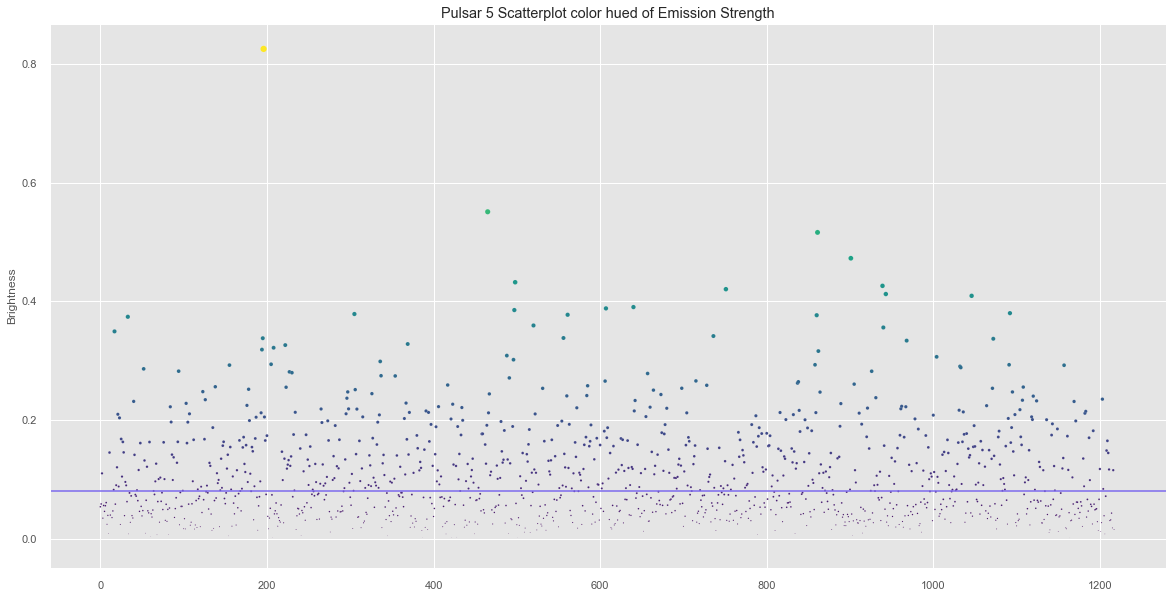

In [428]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar5.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar5["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 5 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.081228, ls='-',c='mediumslateblue')

In [429]:
print(len(pulsar5[(pulsar5.Brightness > 0.081228)]))
print(len(pulsar5[(pulsar5.Brightness < 0.081228)]))

609
609


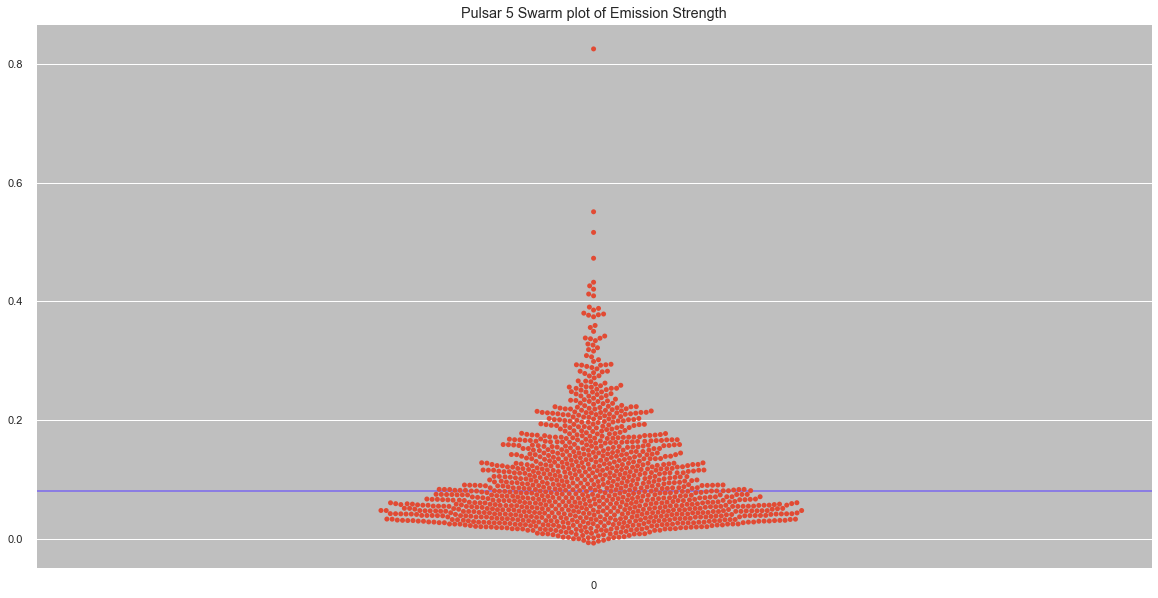

In [430]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar5.Brightness.values
ax = plt.axhline( y=0.081228, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar5["Brightness"], c="blue").set_title('Pulsar 5 Swarm plot of Emission Strength')


c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 5 Brightness')

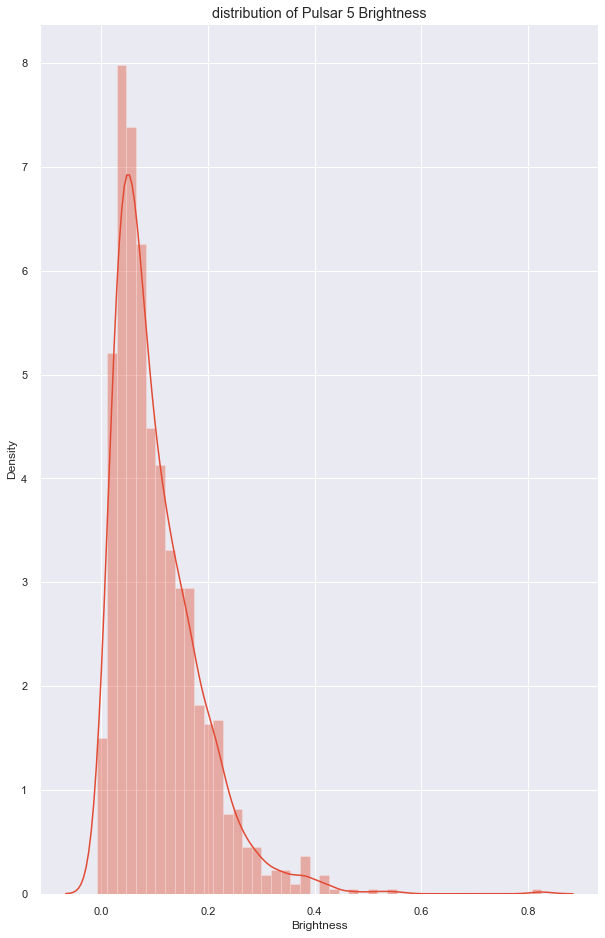

In [431]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar5.Brightness)
plt.title("distribution of Pulsar 5 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 5 binary assignments')

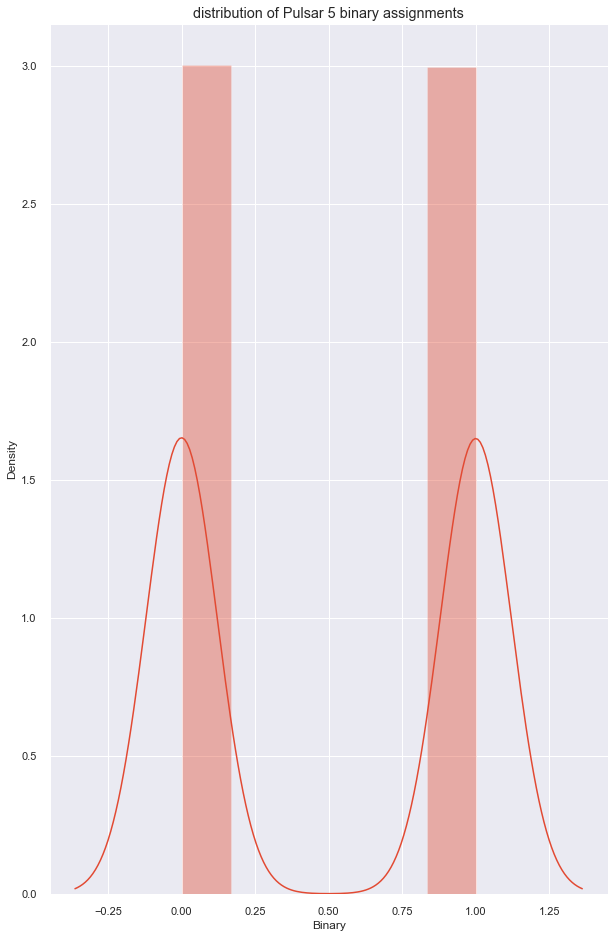

In [432]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar5.Binary)
plt.title("distribution of Pulsar 5 binary assignments")

# Beginning of Exploration Pulsar 6

In [433]:
pulsar6.shape

(698, 3)

In [434]:
pulsar6.head(25)

Pulse Number  Brightness  Uncertainty
0              1    0.634671     0.002761
1              2    0.736945     0.005207
2              3    0.693834     0.002706
3              4    1.021866     0.010184
4              5    0.673845     0.006236
5              6    0.676883     0.004763
6              7    0.527039     0.002422
7              8    0.673417     0.003174
8              9    0.357076     0.002848
9             10    0.661704     0.005588
10            11    0.545564     0.003835
11            12    0.494655     0.003145
12            13    0.804260     0.005258
13            14    0.513362     0.005700
14            15    0.477025     0.002945
15            16    0.399571     0.004712
16            17    0.188069     0.002452
17            18    0.748592     0.005468
18            19    0.723437     0.004548
19            20    0.960154     0.006765
20            21    0.707715     0.006011
21            22    1.074550     0.006831
22            23    0.961340     0.006617
23            24    0.754457     0.004117
24            25    0.773151     0.004920

In [435]:
pulsar6.describe()

Pulse Number  Brightness  Uncertainty
count     698.00000  698.000000   698.000000
mean      349.50000    0.654319     0.004445
std       201.63953    0.163945     0.001855
min         1.00000    0.007642     0.002129
25%       175.25000    0.555267     0.003086
50%       349.50000    0.658295     0.003951
75%       523.75000    0.753396     0.005349
max       698.00000    1.159334     0.016097

In [436]:
nullBoolBrightness = pd.isnull(pulsar6["Brightness"])

pulsar6[nullBoolBrightness]

Empty DataFrame
Columns: [Pulse Number, Brightness, Uncertainty]
Index: []

In [437]:
pulsar6["Brightness"].describe()

count    698.000000
mean       0.654319
std        0.163945
min        0.007642
25%        0.555267
50%        0.658295
75%        0.753396
max        1.159334
Name: Brightness, dtype: float64

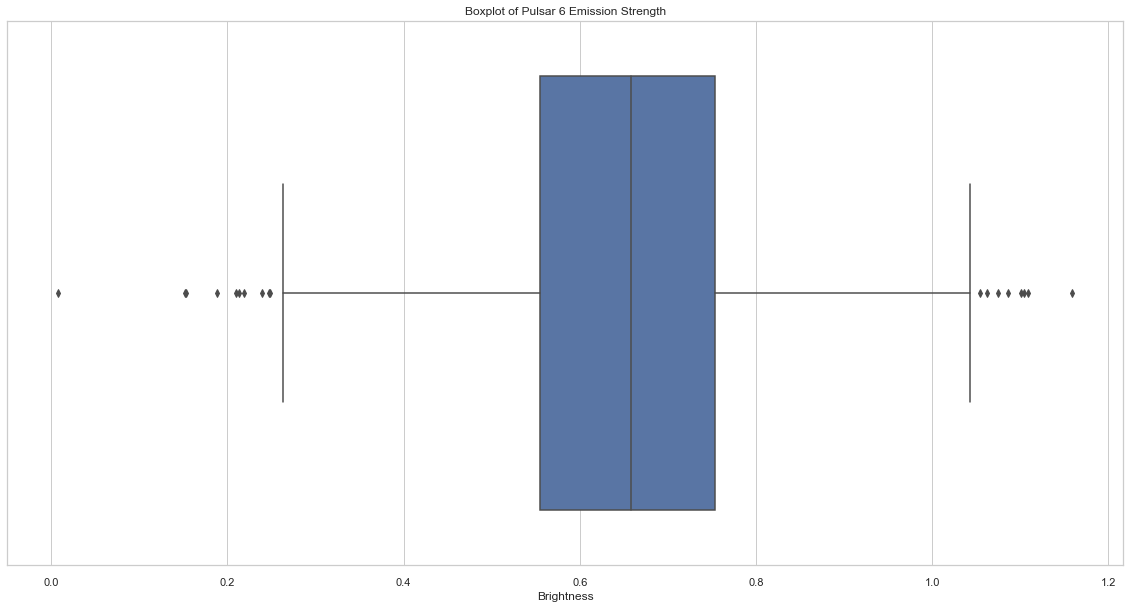

In [438]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [439]:
medianpulse6 = pulsar6["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  0.65829515


In [440]:
pulsar6

Pulse Number  Brightness  Uncertainty  Binary
0               1    0.634671     0.002761       0
1               2    0.736945     0.005207       1
2               3    0.693834     0.002706       1
3               4    1.021866     0.010184       1
4               5    0.673845     0.006236       1
..            ...         ...          ...     ...
693           694    0.776083     0.008928       1
694           695    0.625382     0.006018       0
695           696    0.647559     0.003765       0
696           697    0.312449     0.002901       0
697           698    0.548353     0.009056       0

[698 rows x 4 columns]

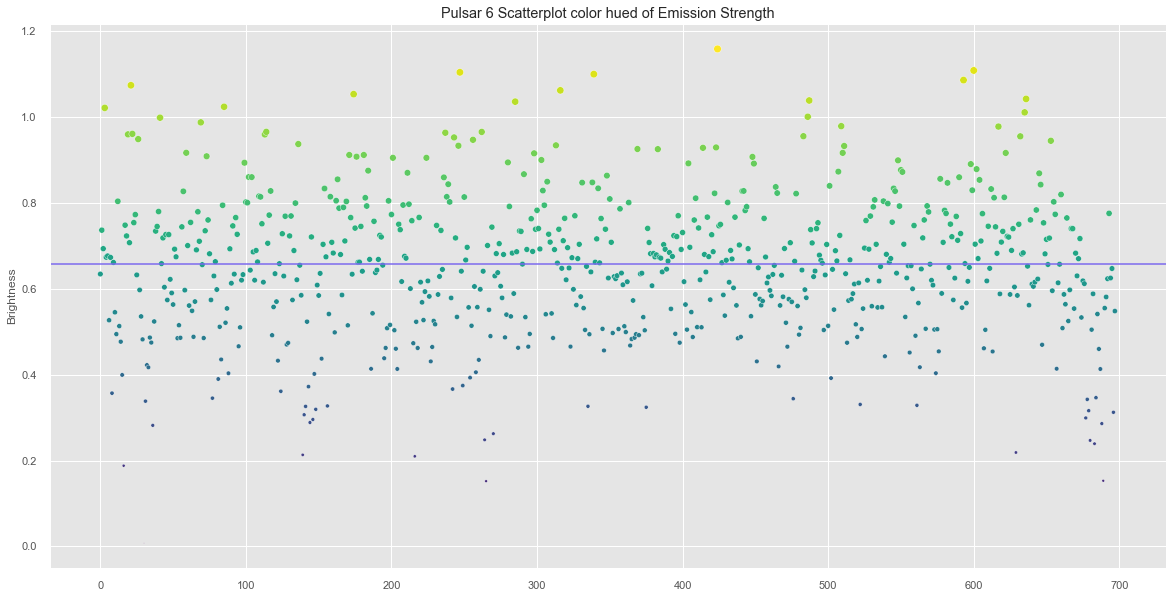

In [441]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

In [442]:
print(len(pulsar6[(pulsar6.Brightness > 0.6589028)]))
print(len(pulsar6[(pulsar6.Brightness < 0.6589028)]))

348
350


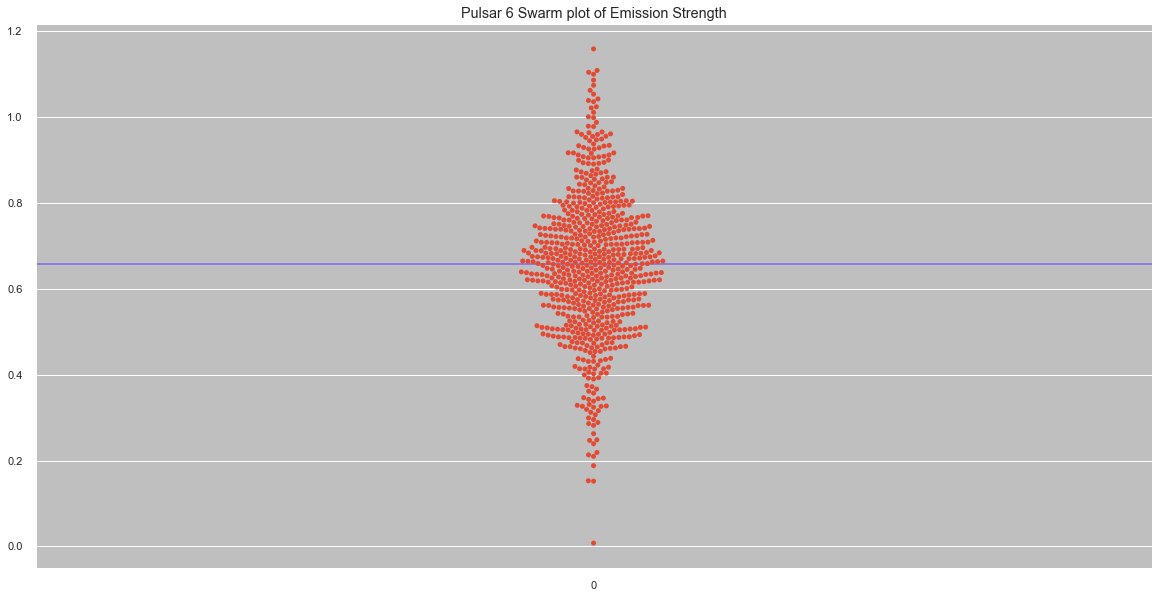

In [443]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar6["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

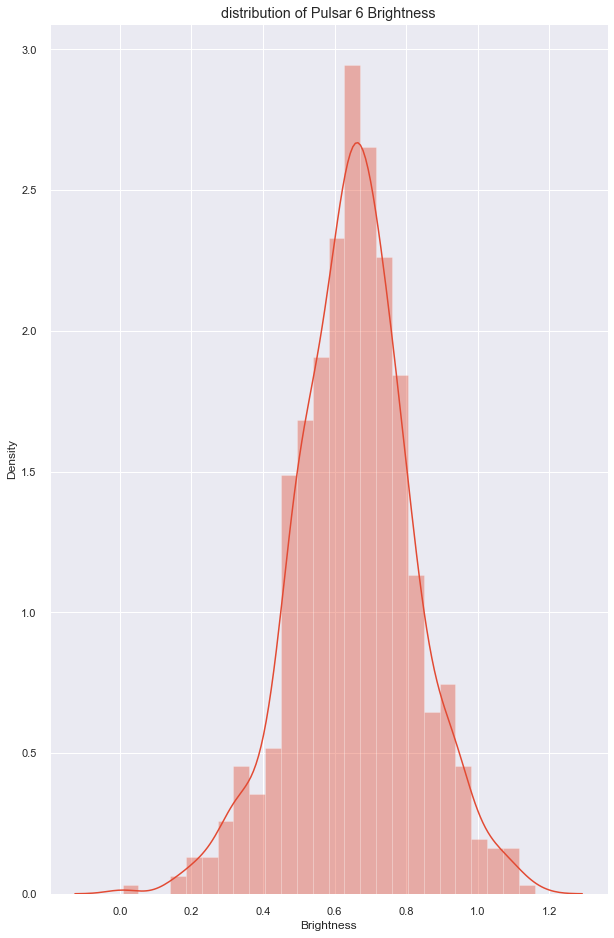

In [444]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

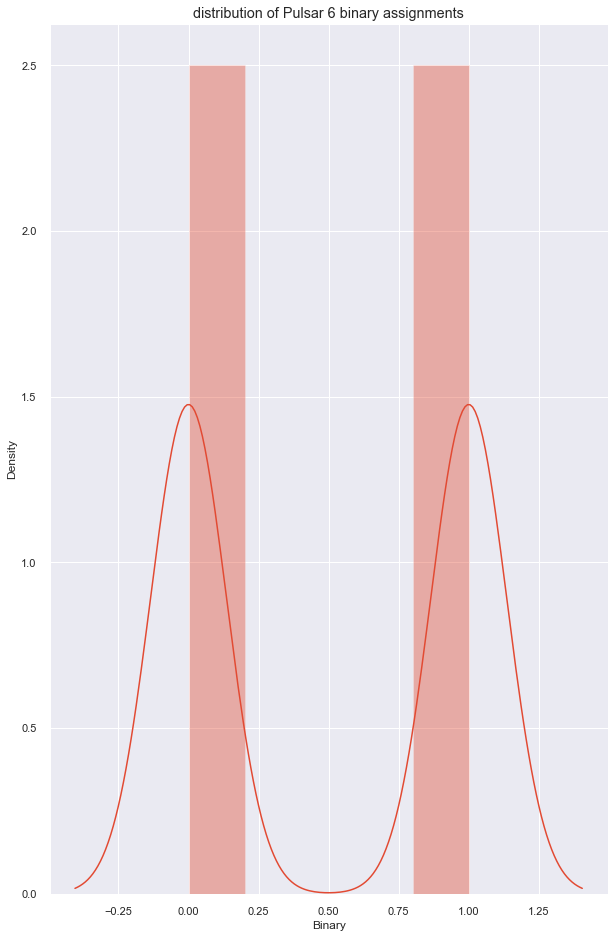

In [445]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Rolling Medians, Rolling Means, Binned Medians and Binned Mean analysis.


In [446]:
data = pulsar["Brightness"]
data

0        0.598393
1        0.590859
2        0.449643
3        0.682860
4        0.490026
           ...   
26995    0.539079
26996    0.324070
26997    0.291341
26998    0.346267
26999    0.513315
Name: Brightness, Length: 27000, dtype: float64

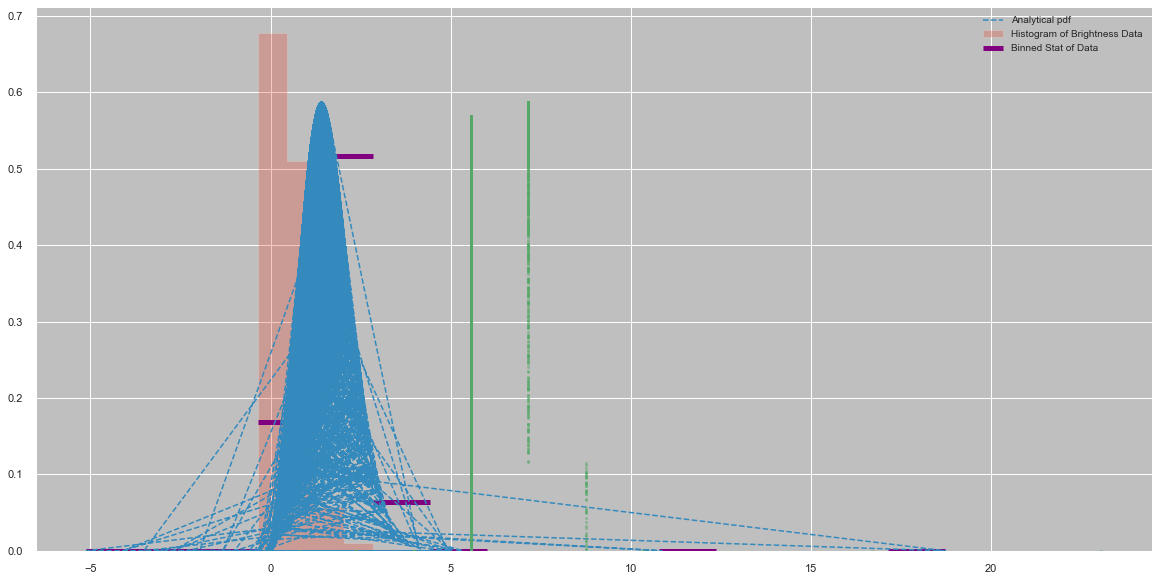

In [447]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, '--', label = "Analytical pdf")
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

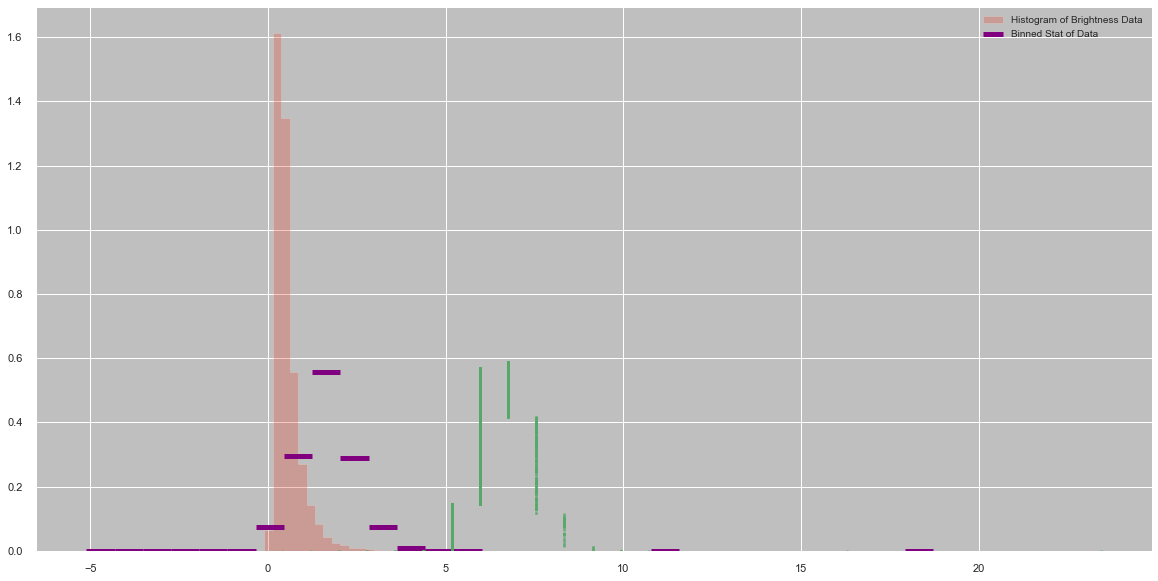

In [448]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=30)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=100, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

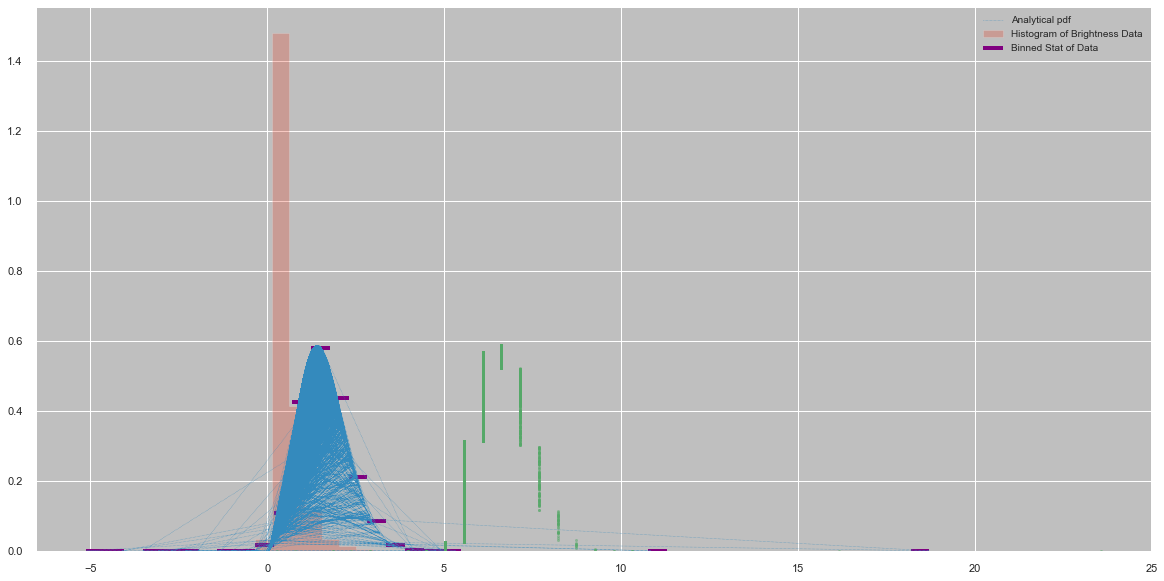

In [449]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=45)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=50, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, ':', label = "Analytical pdf", lw=0.5)
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

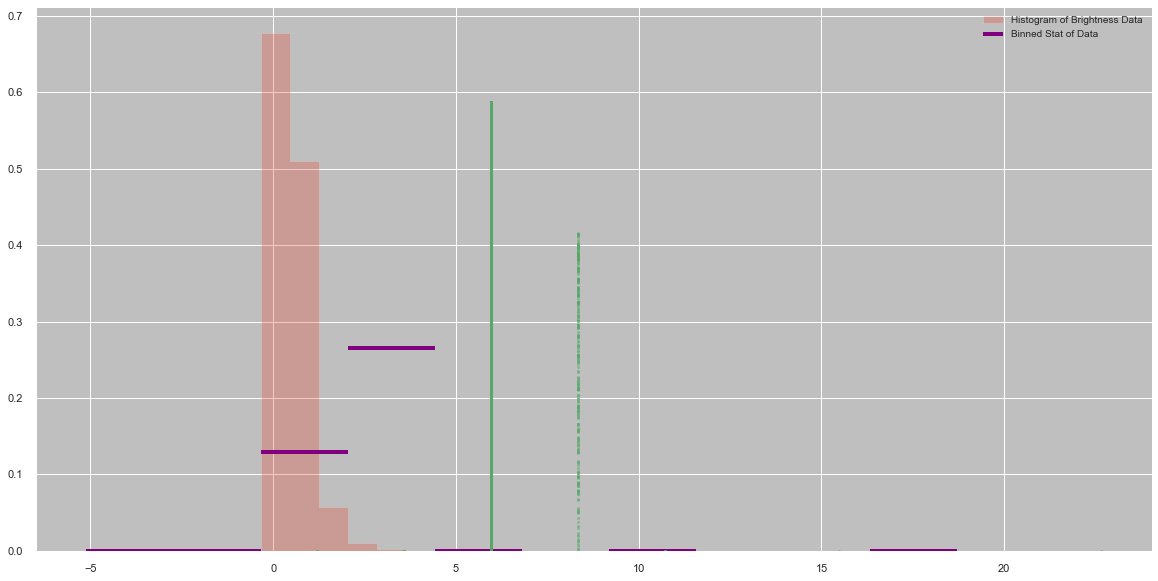

In [450]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

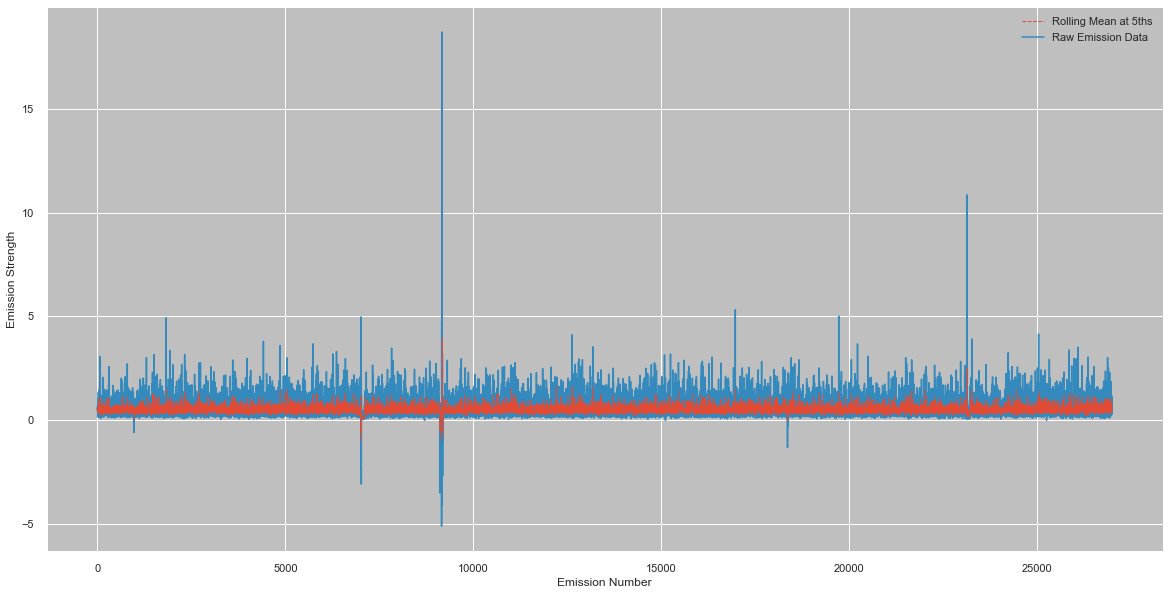

In [451]:
pulsar['RollingMeanEmissions5ths'] = pulsar["Brightness"].rolling(5).mean()

plt.figure(figsize=(20,10))
plt.plot(pulsar['RollingMeanEmissions5ths'], label="Rolling Mean at 5ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

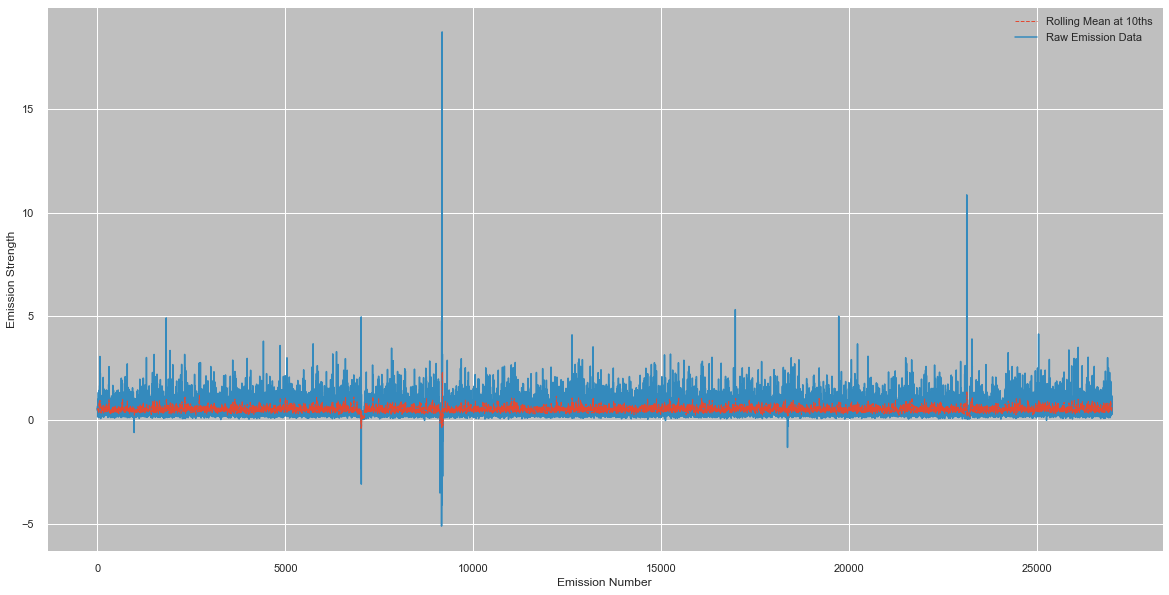

In [452]:
pulsar['RollingMeanEmissions10ths'] = pulsar["Brightness"].rolling(10).mean()

plt.figure(figsize=(20,10))
plt.plot(pulsar['RollingMeanEmissions10ths'], label="Rolling Mean at 10ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

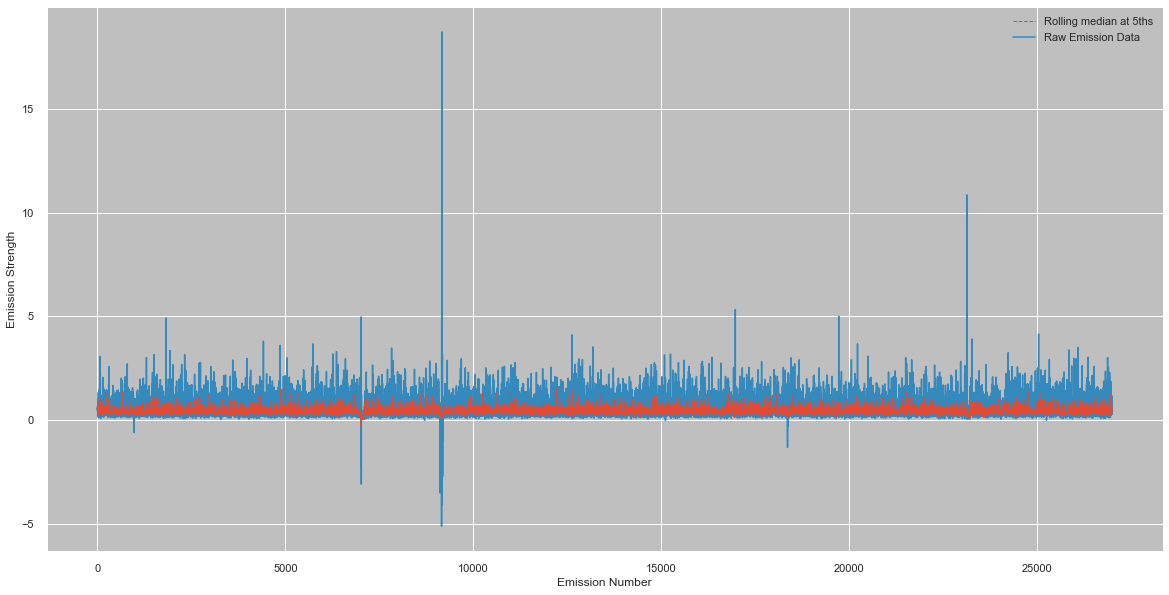

In [453]:
pulsar['RollingMedianEmissions5ths'] = pulsar["Brightness"].rolling(5).median()

plt.figure(figsize=(20,10))
plt.plot(pulsar['RollingMedianEmissions5ths'], label="Rolling median at 5ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

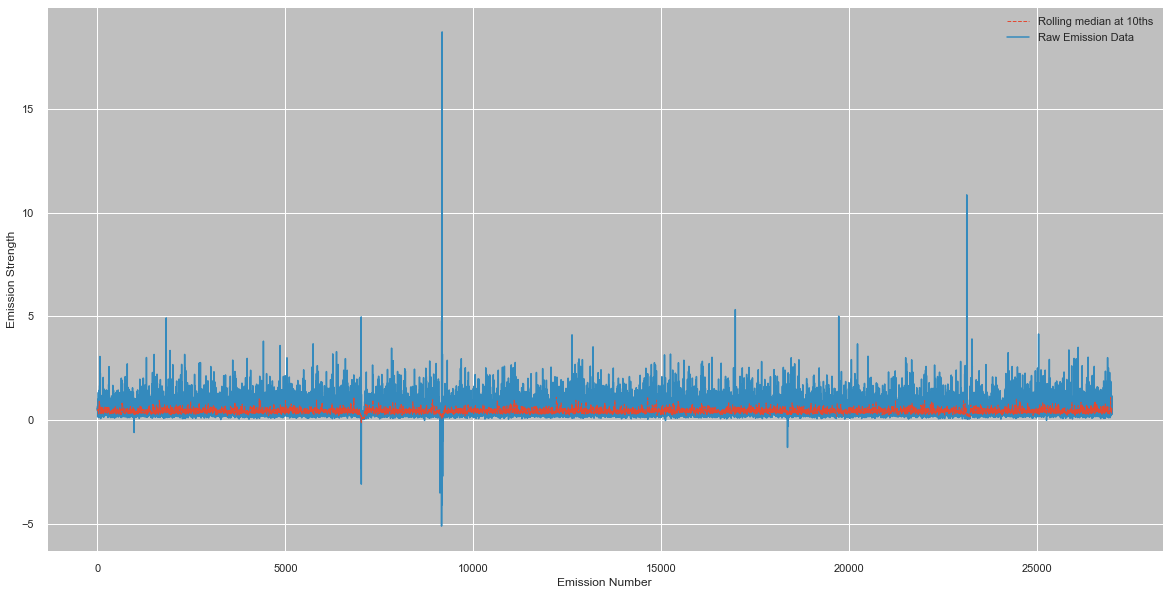

In [454]:
pulsar['RollingMedianEmissions10ths'] = pulsar["Brightness"].rolling(10).median()

plt.figure(figsize=(20,10))
plt.plot(pulsar['RollingMedianEmissions10ths'], label="Rolling median at 10ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

In [455]:
pulsar.head(25)

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0              1    0.598393     0.056431       1                       NaN   
1              2    0.590859     0.055182       1                       NaN   
2              3    0.449643     0.063632       1                       NaN   
3              4    0.682860     0.056269       1                       NaN   
4              5    0.490026     0.046830       1                  0.562356   
5              6    0.586071     0.052649       1                  0.559892   
6              7    0.150353     0.056483       0                  0.471791   
7              8    0.384684     0.052567       0                  0.458799   
8              9    0.429094     0.055569       1                  0.408046   
9             10    0.995865     0.075811       1                  0.509214   
10            11    0.670907     0.049539       1                  0.526181   
11            12    0.465406     0.047461       1                  0.589191   
12            13    0.242442     0.050653       0                  0.560743   
13            14    0.500057     0.050163       1                  0.574935   
14            15    0.658159     0.050743       1                  0.507394   
15            16    0.404870     0.056679       0                  0.454187   
16            17    0.595339     0.065296       1                  0.480173   
17            18    0.230061     0.051813       0                  0.477697   
18            19    0.423335     0.049558       0                  0.462353   
19            20    0.208840     0.049900       0                  0.372489   
20            21    0.297223     0.048826       0                  0.350959   
21            22    0.749683     0.071350       1                  0.381828   
22            23    0.387574     0.054314       0                  0.413331   
23            24    0.466527     0.045075       1                  0.421969   
24            25    1.333974     0.092806       1                  0.646996   

    RollingMeanEmissions10ths  RollingMedianEmissions5ths  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                    0.590859   
5                         NaN                    0.586071   
6                         NaN                    0.490026   
7                         NaN                    0.490026   
8                         NaN                    0.429094   
9                    0.535785                    0.429094   
10                   0.543036                    0.429094   
11                   0.530491                    0.465406   
12                   0.509771                    0.465406   
13                   0.491490                    0.500057   
14                   0.508304                    0.500057   
15                   0.490184                    0.465406   
16                   0.534682                    0.500057   
17                   0.519220                    0.500057   
18                   0.518644                    0.423335   
19                   0.439941                    0.404870   
20                   0.402573                    0.297223   
21                   0.431001                    0.297223   
22                   0.445514                    0.387574   
23                   0.442161                    0.387574   
24                   0.509742                    0.466527   

    RollingMedianEmissions10ths  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
5                           NaN  
6                           NaN  
7                           NaN  
8                           NaN  
9                     

# Rolling Medians, Rolling Means, Binned Medians and Binned Mean analysis Pulsar 2

In [456]:
data = pulsar2["Brightness"]
data

0        0.334330
1       -0.098659
2        0.123514
3        0.443923
4        1.590446
           ...   
14324    4.876881
14325    2.074136
14326    0.585504
14327    0.360930
14328    8.409811
Name: Brightness, Length: 14329, dtype: float64

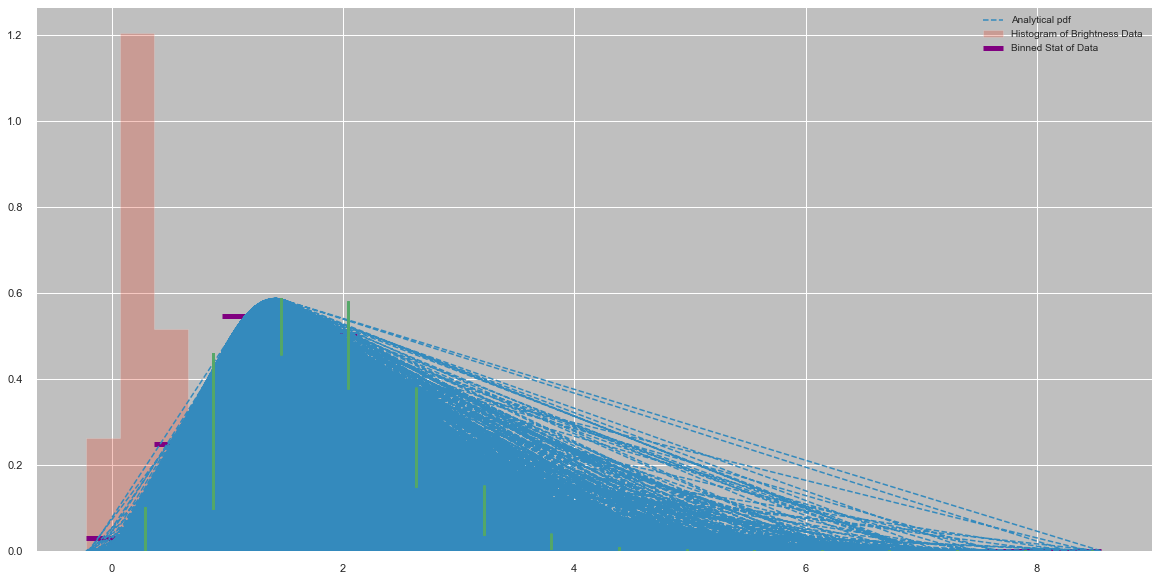

In [457]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, '--', label = "Analytical pdf")
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

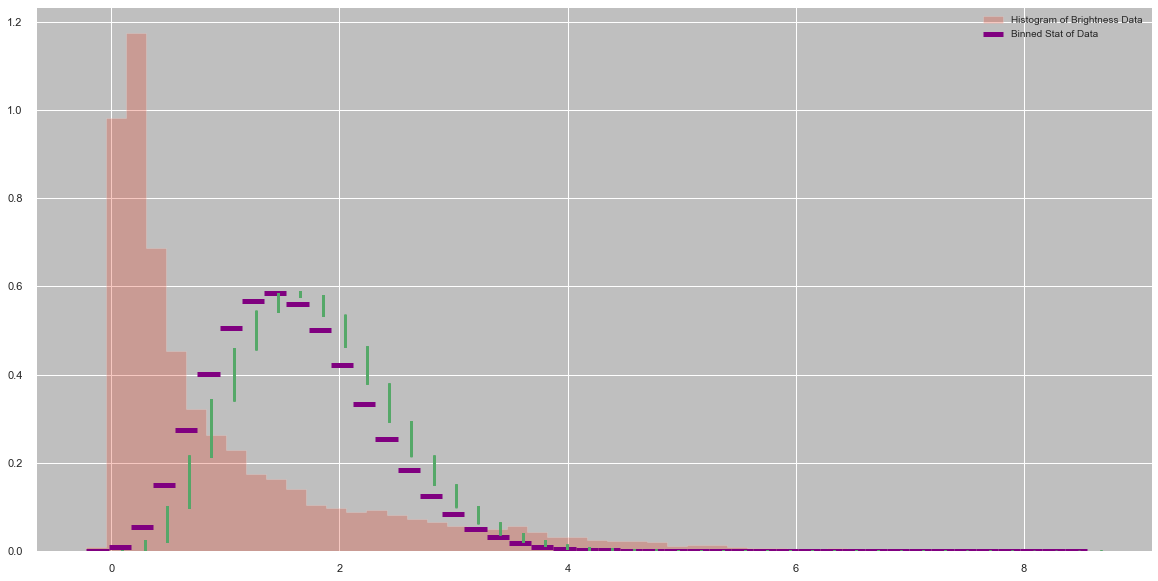

In [458]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=45)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=50, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

In [459]:
bin_means


array([0.00000000e+00, 8.81530427e-03, 5.38415730e-02, 1.49756107e-01,
       2.73125852e-01, 4.01123140e-01, 5.04761799e-01, 5.66191753e-01,
       5.84907585e-01, 5.61036295e-01, 5.01177831e-01, 4.21732083e-01,
       3.33612652e-01, 2.54679272e-01, 1.82840139e-01, 1.24506362e-01,
       8.24283627e-02, 5.00284899e-02, 3.03141668e-02, 1.69974463e-02,
       9.55908130e-03, 4.72589785e-03, 2.40750708e-03, 1.18099567e-03,
       5.06087771e-04, 2.28810393e-04, 1.06452122e-04, 4.29449863e-05,
       1.55640178e-05, 6.45344945e-06, 2.07944444e-06, 7.57196804e-07,
       2.31253715e-07, 6.97119673e-08, 2.43624651e-08, 7.51230054e-09,
       1.89486815e-09, 4.99721235e-10, 8.58589595e-11, 3.32495050e-11,
       7.97809520e-12, 3.47785011e-12, 3.20154700e-13, 8.29409902e-14,
       1.48398875e-14])

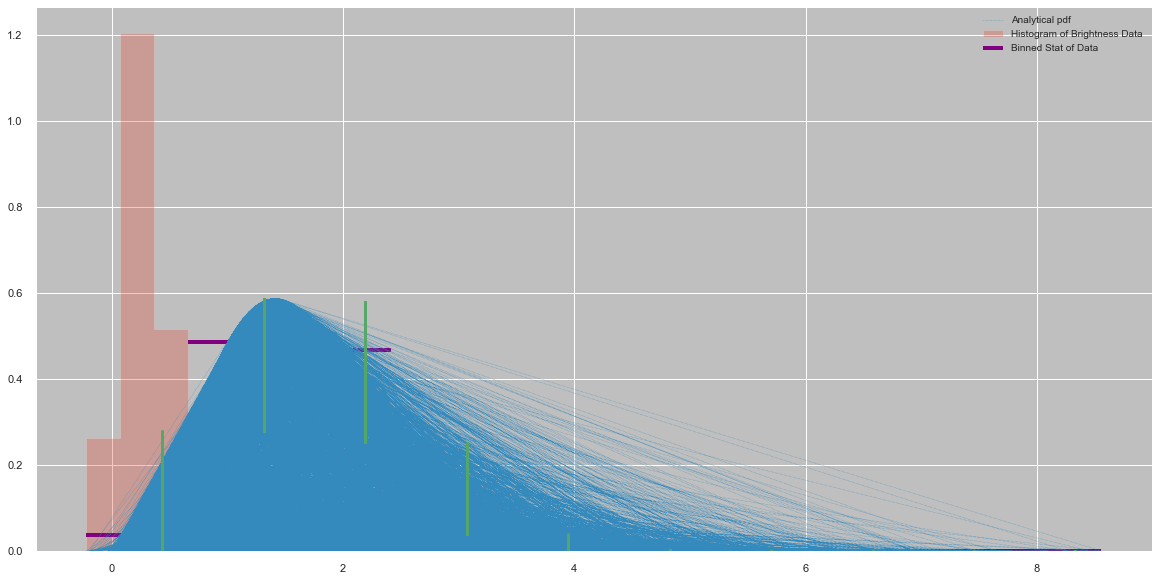

In [460]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, ':', label = "Analytical pdf", lw=0.5)
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

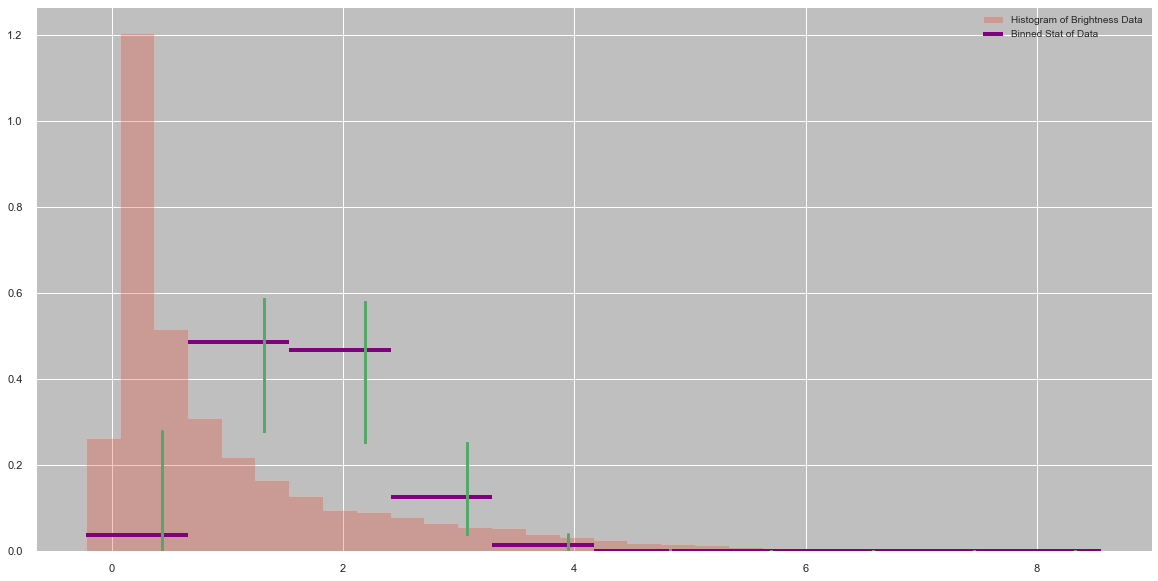

In [461]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

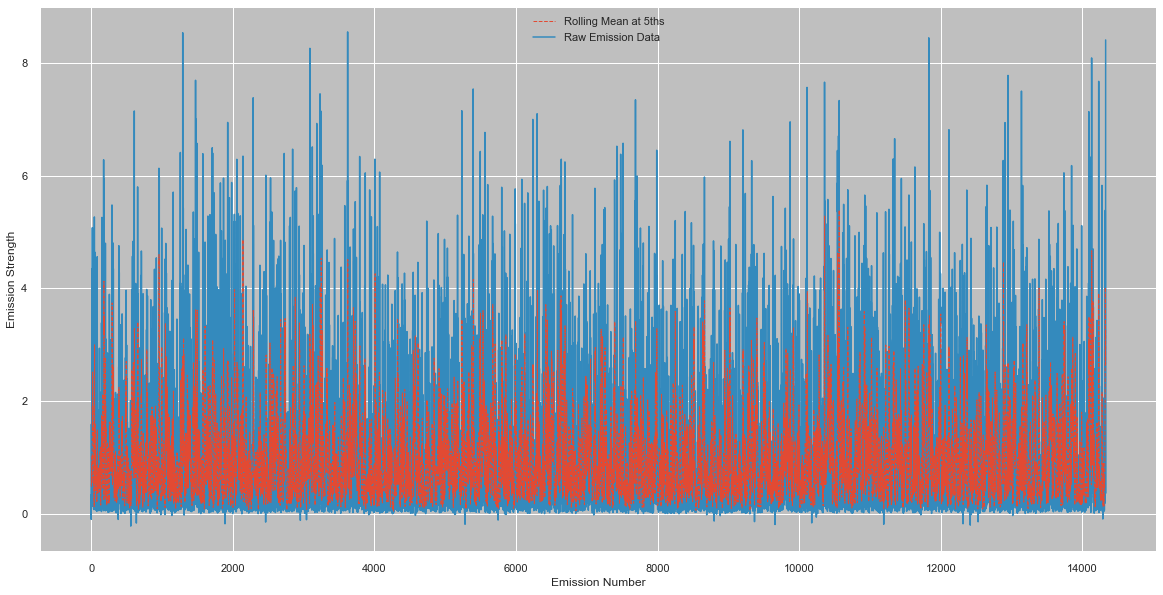

In [462]:
pulsar2['RollingMeanEmissions5ths'] = pulsar2["Brightness"].rolling(5).mean()

plt.figure(figsize=(20,10))
plt.plot(pulsar2['RollingMeanEmissions5ths'], label="Rolling Mean at 5ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar2['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

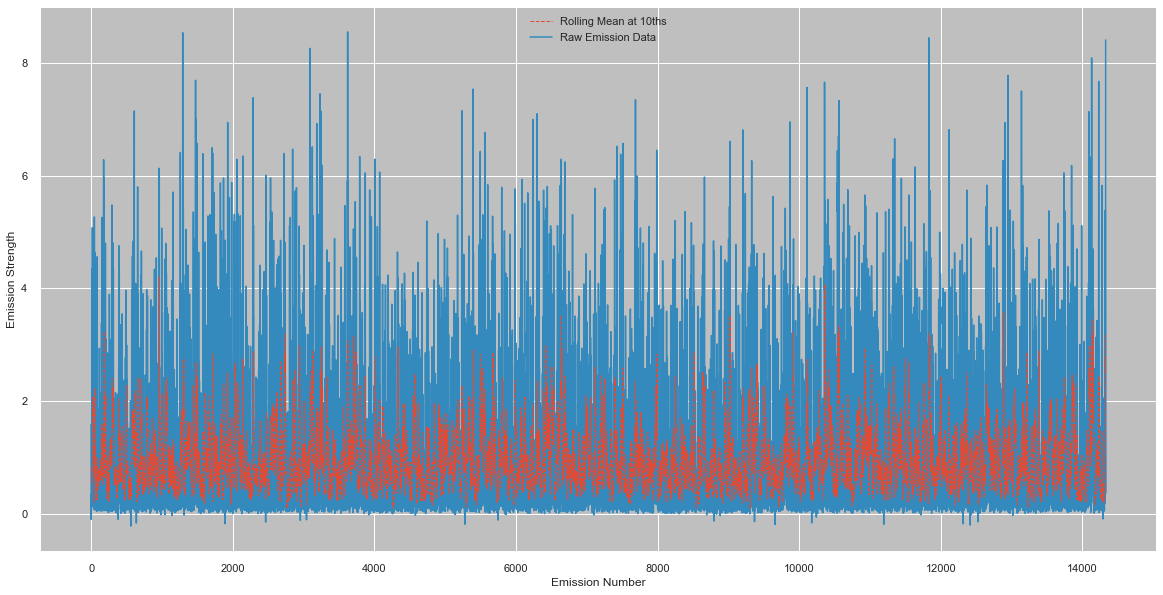

In [463]:
pulsar2['RollingMeanEmissions10ths'] = pulsar2["Brightness"].rolling(10).mean()

plt.figure(figsize=(20,10))
plt.plot(pulsar2['RollingMeanEmissions10ths'], label="Rolling Mean at 10ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar2['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

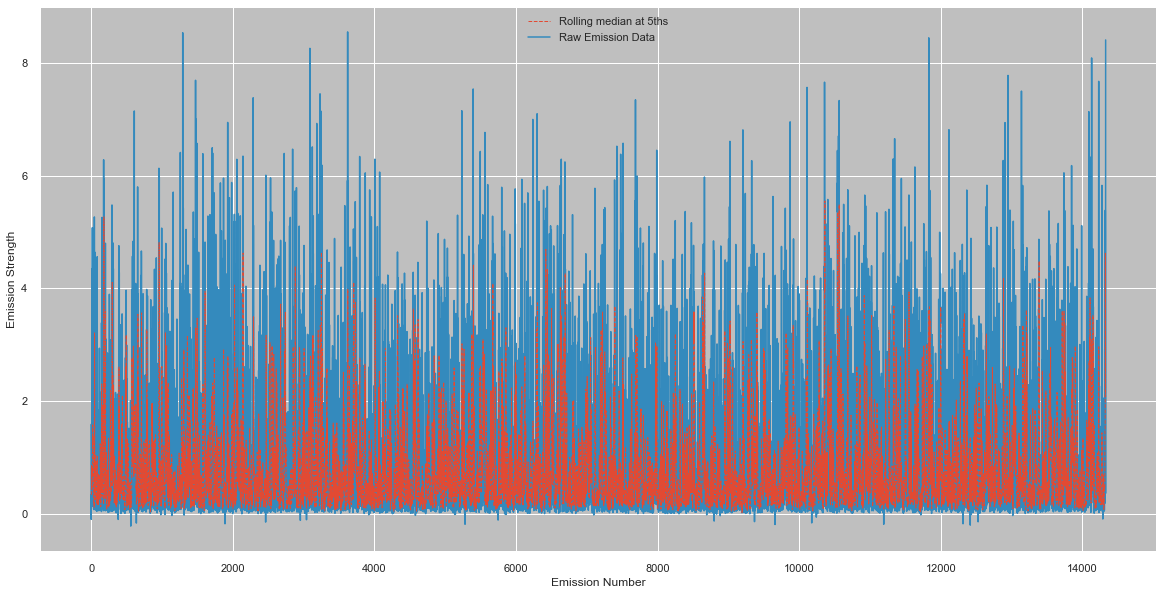

In [464]:
pulsar2['RollingMedianEmissions5ths'] = pulsar2["Brightness"].rolling(5).median()

plt.figure(figsize=(20,10))
plt.plot(pulsar2['RollingMedianEmissions5ths'], label="Rolling median at 5ths", lw=1, linestyle='--', zorder=2)
plt.plot(pulsar2['Brightness'], label= "Raw Emission Data", zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

In [465]:
pulsar2.head(25)

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0              1    0.334330     0.015570       0                       NaN   
1              2   -0.098659     0.014051       0                       NaN   
2              3    0.123514     0.011901       0                       NaN   
3              4    0.443923     0.014365       0                       NaN   
4              5    1.590446     0.057785       1                  0.478711   
5              6    1.233848     0.018692       1                  0.658614   
6              7    0.857876     0.022208       1                  0.849921   
7              8    0.254255     0.018185       0                  0.876070   
8              9    0.292077     0.021672       0                  0.845700   
9             10    0.439929     0.046293       0                  0.615597   
10            11    0.824310     0.036243       1                  0.533689   
11            12    1.443460     0.088372       1                  0.650806   
12            13    0.127981     0.018070       0                  0.625551   
13            14    0.327896     0.012362       0                  0.632715   
14            15    2.473663     0.099205       1                  1.039462   
15            16    0.683800     0.049683       1                  1.011360   
16            17    0.744937     0.033909       1                  0.871656   
17            18    0.628764     0.032342       1                  0.971812   
18            19    5.077294     0.093078       1                  1.921692   
19            20    0.554981     0.025086       1                  1.537955   
20            21    1.006799     0.029068       1                  1.602555   
21            22    4.359872     0.091381       1                  2.325542   
22            23    1.576034     0.030928       1                  2.514996   
23            24    1.218368     0.067754       1                  1.743211   
24            25    1.377933     0.036103       1                  1.907801   

    RollingMeanEmissions10ths  RollingMedianEmissions5ths  
0                         NaN                         NaN  
1                         NaN                         NaN  
2                         NaN                         NaN  
3                         NaN                         NaN  
4                         NaN                    0.334330  
5                         NaN                    0.443923  
6                         NaN                    0.857876  
7                         NaN                    0.857876  
8                         NaN                    0.857876  
9                    0.547154                    0.439929  
10                   0.596152                    0.439929  
11                   0.750364                    0.439929  
12                   0.750810                    0.439929  
13                   0.739208                    0.439929  
14                   0.827529                    0.824310  
15                   0.772525                    0.683800  
16                   0.761231                    0.683800  
17                   0.798682                    0.683800  
18                   1.277203                    0.744937  
19                   1.288709                    0.683800  
20                   1.306958                    0.744937  
21                   1.598599                    1.006799  
22                   1.743404                    1.576034  
23                   1.832451                    1.218368  
24                   1.722878                    1.377933

# Rolling Medians, Rolling Means, Binned Medians and Binned Mean analysis of pulsar 3


In [466]:
data = pulsar3["Brightness"]
data

0       0.984043
1       2.487928
2       1.690295
3       1.196142
4       1.979783
          ...   
1326    1.842016
1327    1.547695
1328    2.797312
1329    3.351977
1330    3.115255
Name: Brightness, Length: 1331, dtype: float64

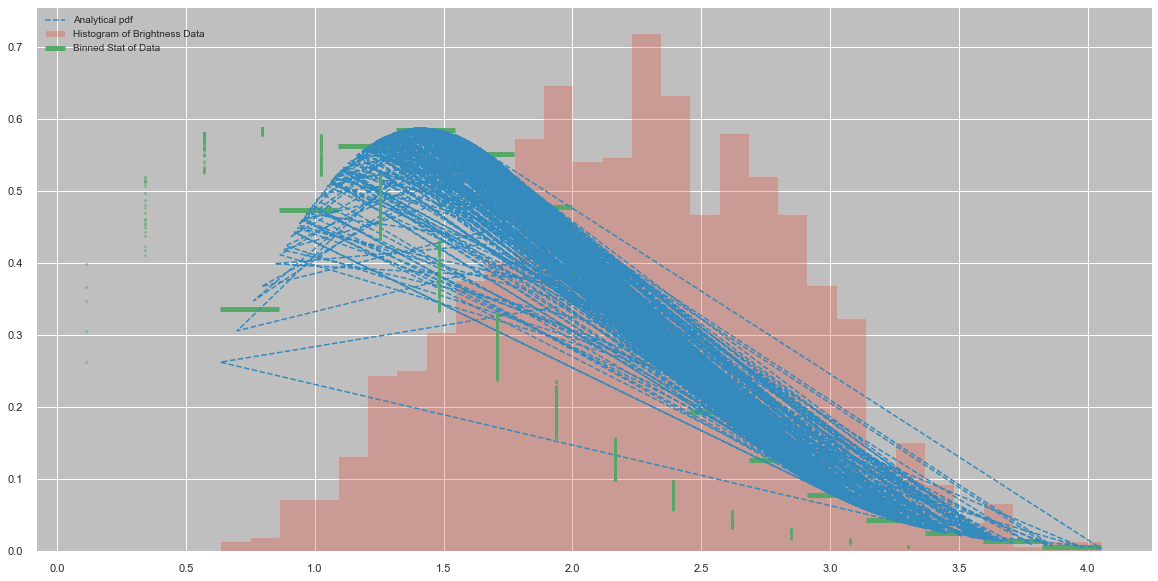

In [467]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, '--', label = "Analytical pdf")
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], 'g', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

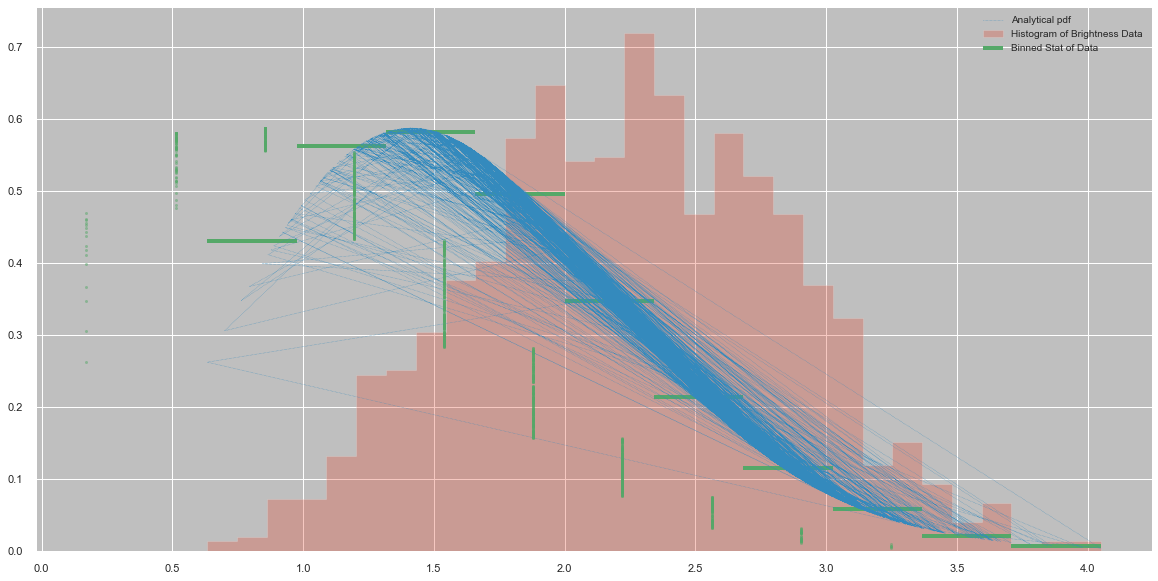

In [468]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize=(20,10))
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, ':', label = "Analytical pdf", lw=0.5)
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], 'g', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

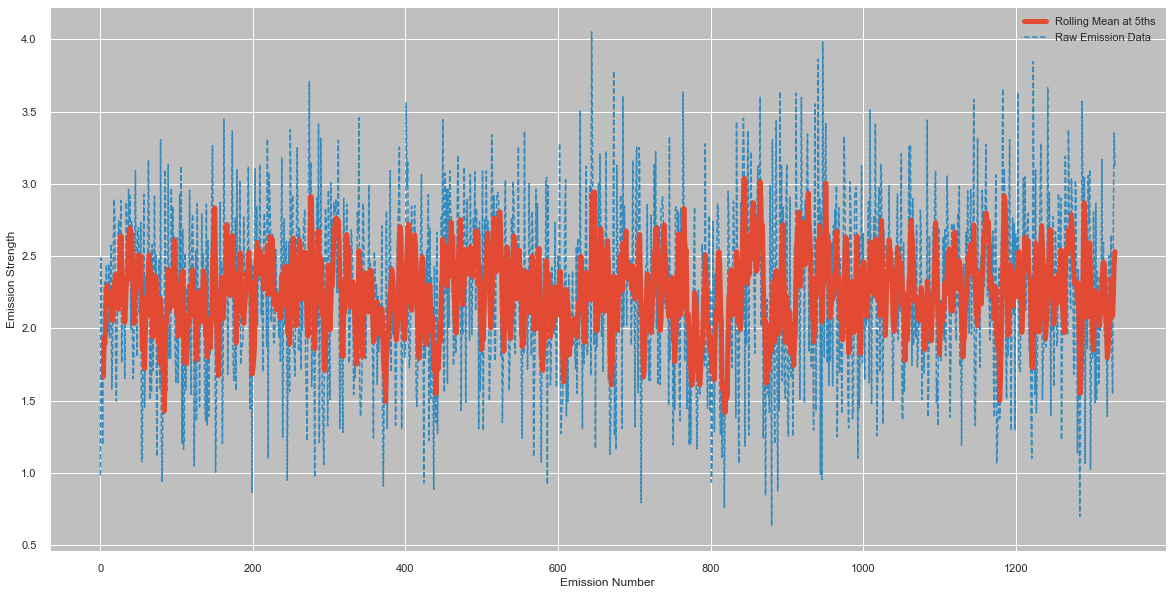

In [469]:
pulsar3['RollingMeanEmissions5ths'] = pulsar3["Brightness"].rolling(5).mean()

plt.figure(figsize=(20,10))
plt.plot(pulsar3['RollingMeanEmissions5ths'], label="Rolling Mean at 5ths", lw=5, zorder=2)
plt.plot(pulsar3['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

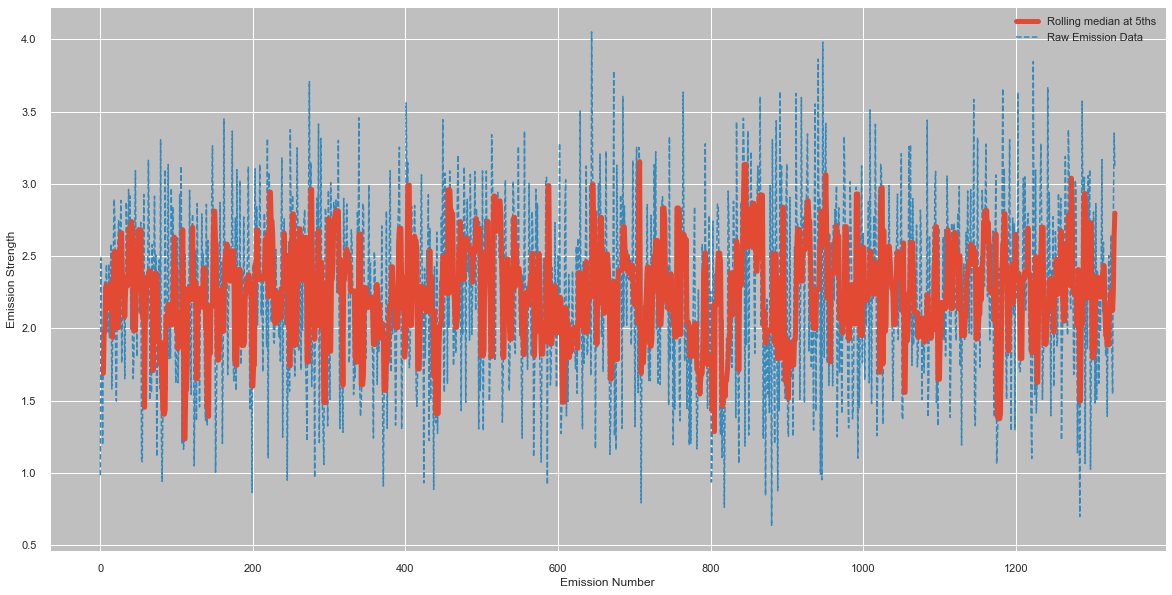

In [470]:
pulsar3['RollingMedianEmissions5ths'] = pulsar3["Brightness"].rolling(5).median()

plt.figure(figsize=(20,10))
plt.plot(pulsar3['RollingMedianEmissions5ths'], label="Rolling median at 5ths", lw=5, zorder=2)
plt.plot(pulsar3['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

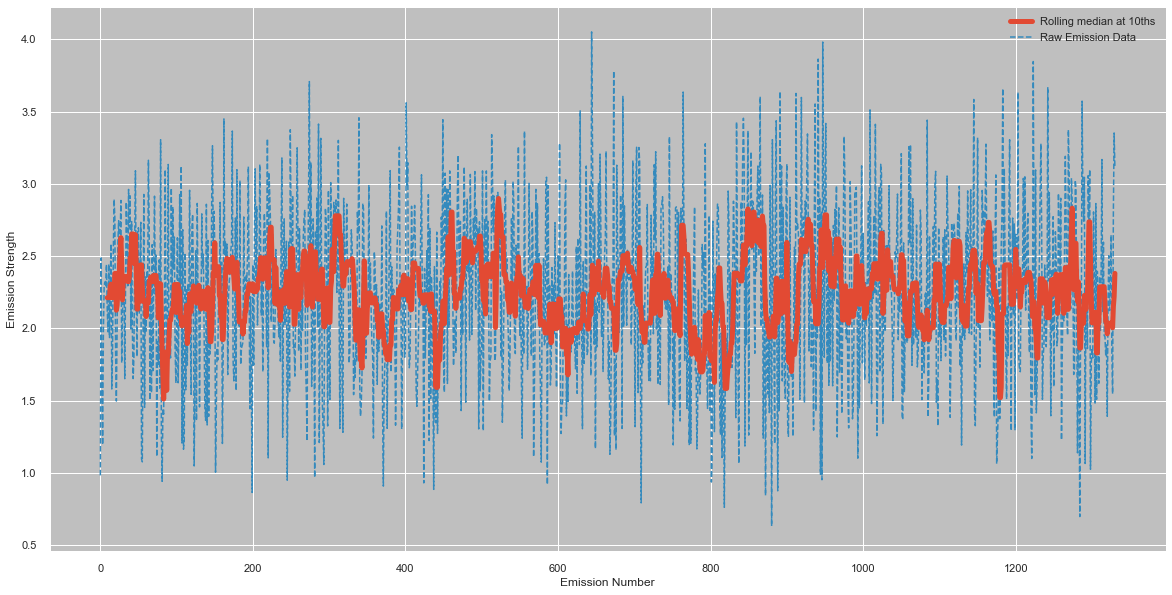

In [471]:
pulsar3['RollingMedianEmissions10ths'] = pulsar3["Brightness"].rolling(10).median()

plt.figure(figsize=(20,10))
plt.plot(pulsar3['RollingMedianEmissions10ths'], label="Rolling median at 10ths", lw=5, zorder=2)
plt.plot(pulsar3['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

In [472]:
pulsar3.head(25)

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0              1    0.984043     0.053831       0                       NaN   
1              2    2.487928     0.048796       1                       NaN   
2              3    1.690295     0.025639       0                       NaN   
3              4    1.196142     0.039539       0                       NaN   
4              5    1.979783     0.041460       0                  1.667638   
5              6    2.297645     0.054210       1                  1.930359   
6              7    2.322135     0.043554       1                  1.897200   
7              8    2.289047     0.049957       1                  2.016950   
8              9    2.442574     0.025110       1                  2.266237   
9             10    2.136332     0.022712       0                  2.297547   
10            11    1.976790     0.037551       0                  2.233376   
11            12    2.445764     0.047004       1                  2.258101   
12            13    1.937017     0.028561       0                  2.187695   
13            14    2.315184     0.045216       1                  2.162217   
14            15    2.584888     0.040232       1                  2.251929   
15            16    1.581452     0.030372       0                  2.172861   
16            17    1.849656     0.024236       0                  2.053639   
17            18    2.529834     0.048330       1                  2.172203   
18            19    2.894401     0.066794       1                  2.288046   
19            20    2.769474     0.059082       1                  2.324963   
20            21    1.824490     0.036531       0                  2.373571   
21            22    1.498133     0.035557       0                  2.303266   
22            23    2.005834     0.028621       0                  2.198466   
23            24    2.594836     0.032925       1                  2.138553   
24            25    2.745045     0.055348       1                  2.133668   

    RollingMedianEmissions5ths  RollingMedianEmissions10ths  
0                          NaN                          NaN  
1                          NaN                          NaN  
2                          NaN                          NaN  
3                          NaN                          NaN  
4                     1.690295                          NaN  
5                     1.979783                          NaN  
6                     1.979783                          NaN  
7                     2.289047                          NaN  
8                     2.297645                          NaN  
9                     2.297645                     2.212689  
10                    2.289047                     2.212689  
11                    2.289047                     2.212689  
12                    2.136332                     2.212689  
13                    2.136332                     2.293346  
14                    2.315184                     2.306414  
15                    2.315184                     2.302116  
16                    1.937017                     2.212689  
17                    2.315184                     2.225758  
18                    2.529834                     2.225758  
19                    2.529834                     2.380474  
20                    2.529834                     2.380474  
21                    2.529834                     2.126100  
22                    2.005834                     2.160509  
23                    2.005834                     2.267834  
24                    2.005834                     2.267834

# Rolling Medians, Rolling Means, Binned Medians and Binned Mean analysis of pulsar 4


In [473]:
data = pulsar4["Brightness"]
data

0       0.101127
1       0.012166
2       0.021918
3       0.181179
4       0.000240
          ...   
1814    0.105178
1815    0.064272
1816    0.000171
1817   -0.000924
1818    0.000001
Name: Brightness, Length: 1819, dtype: float64

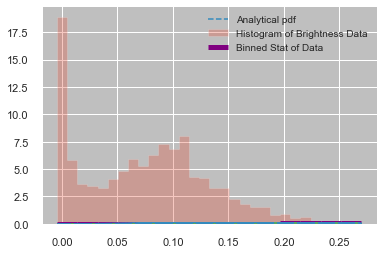

In [474]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, '--', label = "Analytical pdf")
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

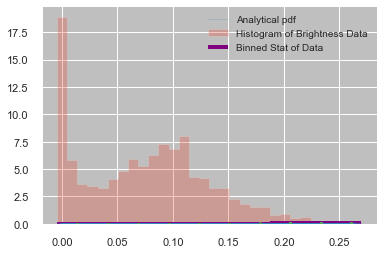

In [475]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, ':', label = "Analytical pdf", lw=0.5)
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

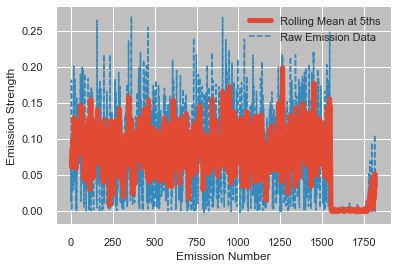

In [476]:
pulsar4['RollingMeanEmissions5ths'] = pulsar4["Brightness"].rolling(5).mean()

plt.plot(pulsar4['RollingMeanEmissions5ths'], label="Rolling Mean at 5ths", lw=5, zorder=2)
plt.plot(pulsar4['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

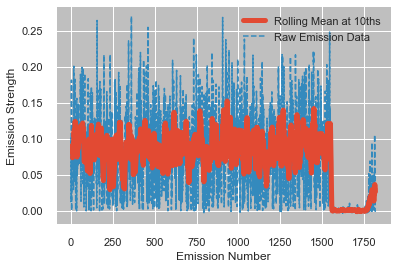

In [477]:
pulsar4['RollingMeanEmissions10ths'] = pulsar4["Brightness"].rolling(10).mean()

plt.plot(pulsar4['RollingMeanEmissions10ths'], label="Rolling Mean at 10ths", lw=5, zorder=2)
plt.plot(pulsar4['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

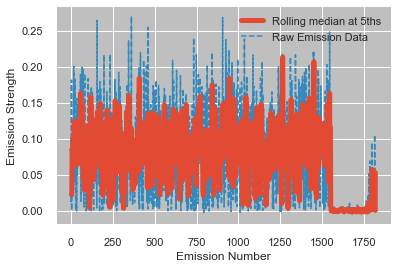

In [478]:
pulsar4['RollingMedianEmissions5ths'] = pulsar4["Brightness"].rolling(5).median()

plt.plot(pulsar4['RollingMedianEmissions5ths'], label="Rolling median at 5ths", lw=5, zorder=2)
plt.plot(pulsar4['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

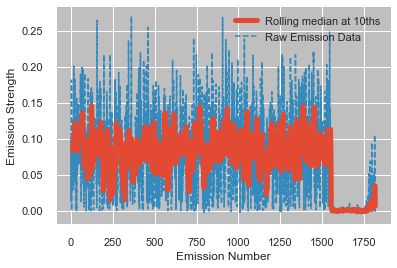

In [479]:
pulsar4['RollingMedianEmissions10ths'] = pulsar4["Brightness"].rolling(10).median()

plt.plot(pulsar4['RollingMedianEmissions10ths'], label="Rolling median at 10ths", lw=5, zorder=2)
plt.plot(pulsar4['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

In [480]:
pulsar4.head(25)

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0              1    0.101127     0.001893       1                       NaN   
1              2    0.012166     0.001814       0                       NaN   
2              3    0.021918     0.001835       0                       NaN   
3              4    0.181179     0.002183       1                       NaN   
4              5    0.000240     0.001725       0                  0.063326   
5              6    0.085866     0.001723       1                  0.060274   
6              7    0.067280     0.001778       0                  0.071297   
7              8    0.092884     0.002438       1                  0.085490   
8              9    0.083350     0.002101       1                  0.065924   
9             10    0.087871     0.001941       1                  0.083450   
10            11    0.123529     0.002026       1                  0.090983   
11            12    0.097413     0.001878       1                  0.097009   
12            13    0.100649     0.001820       1                  0.098562   
13            14    0.058025     0.001724       0                  0.093498   
14            15    0.116164     0.001948       1                  0.099156   
15            16    0.029203     0.001918       0                  0.080291   
16            17    0.174895     0.002131       1                  0.095787   
17            18    0.200468     0.002571       1                  0.115751   
18            19    0.123890     0.001805       1                  0.128924   
19            20    0.083496     0.001856       1                  0.122391   
20            21    0.042757     0.001891       0                  0.125101   
21            22    0.119953     0.001744       1                  0.114113   
22            23    0.096266     0.001911       1                  0.093273   
23            24    0.040698     0.001975       0                  0.076634   
24            25    0.175852     0.002251       1                  0.095105   

    RollingMeanEmissions10ths  RollingMedianEmissions5ths  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                    0.021918   
5                         NaN                    0.021918   
6                         NaN                    0.067280   
7                         NaN                    0.085866   
8                         NaN                    0.083350   
9                    0.073388                    0.085866   
10                   0.075628                    0.087871   
11                   0.084153                    0.092884   
12                   0.092026                    0.097413   
13                   0.079711                    0.097413   
14                   0.091303                    0.100649   
15                   0.085637                    0.097413   
16                   0.096398                    0.100649   
17                   0.107157                    0.116164   
18                   0.111211                    0.123890   
19                   0.110773                    0.123890   
20                   0.102696                    0.123890   
21                   0.104950                    0.119953   
22                   0.104512                    0.096266   
23                   0.102779                    0.083496   
24                   0.108748                    0.096266   

    RollingMedianEmissions10ths  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
5                           NaN  
6                           NaN  
7                           NaN  
8                           NaN  
9                     

# Rolling Medians, Rolling Means, Binned Medians and Binned Mean analysis of pulsar 5


In [481]:
data = pulsar5["Brightness"]
data

0       5.390386e-02
1       5.865279e-02
2       1.102083e-01
3       3.471609e-02
4       5.610133e-02
            ...     
1214    4.321559e-02
1215    1.830750e-02
1216    1.155671e-01
1217    1.562609e-02
1218   -1.137418e-08
Name: Brightness, Length: 1219, dtype: float64

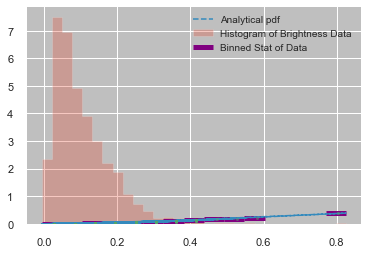

In [482]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, '--', label = "Analytical pdf")
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

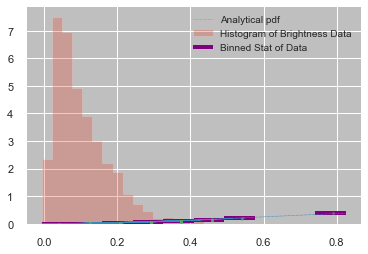

In [483]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, ':', label = "Analytical pdf", lw=0.5)
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

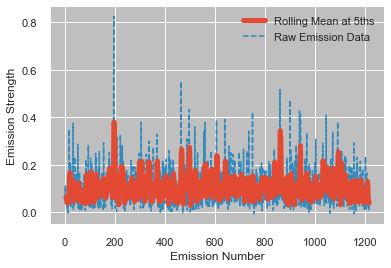

In [484]:
pulsar5['RollingMeanEmissions5ths'] = pulsar5["Brightness"].rolling(5).mean()

plt.plot(pulsar5['RollingMeanEmissions5ths'], label="Rolling Mean at 5ths", lw=5, zorder=2)
plt.plot(pulsar5['Brightness'], label= "Raw Emission Data", linestyle='--',zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

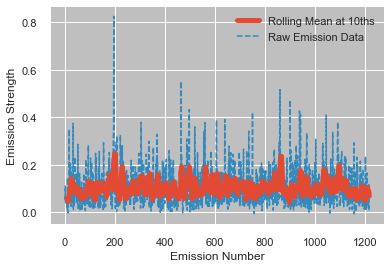

In [485]:
pulsar5['RollingMeanEmissions10ths'] = pulsar5["Brightness"].rolling(10).mean()

plt.plot(pulsar5['RollingMeanEmissions10ths'], label="Rolling Mean at 10ths", lw=5, zorder=2)
plt.plot(pulsar5['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

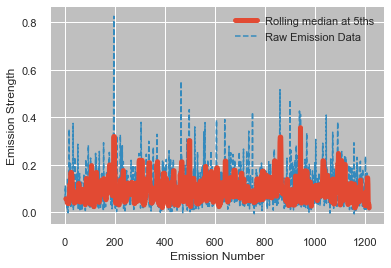

In [486]:
pulsar5['RollingMedianEmissions5ths'] = pulsar5["Brightness"].rolling(5).median()

plt.plot(pulsar5['RollingMedianEmissions5ths'], label="Rolling median at 5ths", lw=5, zorder=2)
plt.plot(pulsar5['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

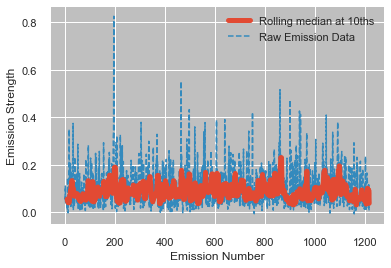

In [487]:
pulsar5['RollingMedianEmissions10ths'] = pulsar5["Brightness"].rolling(10).median()

plt.plot(pulsar5['RollingMedianEmissions10ths'], label="Rolling median at 10ths", lw=5, zorder=2)
plt.plot(pulsar5['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

In [488]:
pulsar5.head(25)

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0              1    0.053904     0.005560       0                       NaN   
1              2    0.058653     0.004821       0                       NaN   
2              3    0.110208     0.005196       1                       NaN   
3              4    0.034716     0.004729       0                       NaN   
4              5    0.056101     0.004619       0                  0.062716   
5              6    0.046168     0.005074       0                  0.061169   
6              7    0.055648     0.004916       0                  0.060568   
7              8    0.060890     0.004581       0                  0.050705   
8              9    0.024388     0.004922       0                  0.048639   
9             10    0.039370     0.004633       0                  0.045293   
10            11    0.009141     0.004581       0                  0.037888   
11            12    0.145273     0.005053       1                  0.055813   
12            13    0.039953     0.004938       0                  0.051625   
13            14   -0.002554     0.004409       0                  0.046237   
14            15    0.035696     0.004903       0                  0.045502   
15            16    0.046869     0.004706       0                  0.053048   
16            17    0.082637     0.004596       1                  0.040520   
17            18    0.349419     0.006828       1                  0.102413   
18            19    0.058343     0.004650       0                  0.114593   
19            20    0.090261     0.005068       1                  0.125506   
20            21    0.120429     0.005141       1                  0.140218   
21            22    0.209730     0.005389       1                  0.165637   
22            23    0.088045     0.004945       1                  0.113362   
23            24    0.203736     0.008553       1                  0.142440   
24            25    0.024098     0.004641       0                  0.129208   

    RollingMeanEmissions10ths  RollingMedianEmissions5ths  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                    0.056101   
5                         NaN                    0.056101   
6                         NaN                    0.055648   
7                         NaN                    0.055648   
8                         NaN                    0.055648   
9                    0.054005                    0.046168   
10                   0.049528                    0.039370   
11                   0.058190                    0.039370   
12                   0.051165                    0.039370   
13                   0.047438                    0.039370   
14                   0.045397                    0.035696   
15                   0.045468                    0.039953   
16                   0.048166                    0.039953   
17                   0.077019                    0.046869   
18                   0.080415                    0.058343   
19                   0.085504                    0.082637   
20                   0.096633                    0.090261   
21                   0.103078                    0.120429   
22                   0.107888                    0.090261   
23                   0.128517                    0.120429   
24                   0.127357                    0.120429   

    RollingMedianEmissions10ths  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
5                           NaN  
6                           NaN  
7                           NaN  
8                           NaN  
9                     

# Rolling Medians, Rolling Means, Binned Medians and Binned Mean analysis of pulsar 6


In [489]:
data = pulsar6["Brightness"]
data

0      0.634671
1      0.736945
2      0.693834
3      1.021866
4      0.673845
         ...   
693    0.776083
694    0.625382
695    0.647559
696    0.312449
697    0.548353
Name: Brightness, Length: 698, dtype: float64

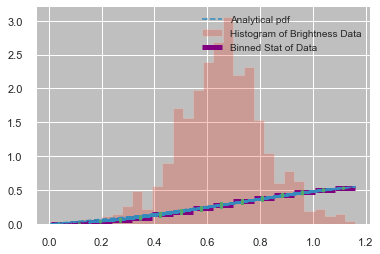

In [490]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, '--', label = "Analytical pdf")
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

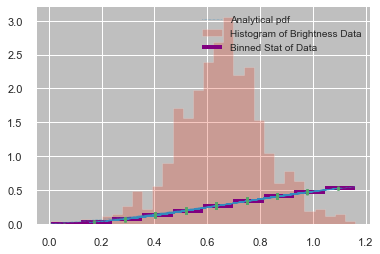

In [491]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, ':', label = "Analytical pdf", lw=0.5)
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

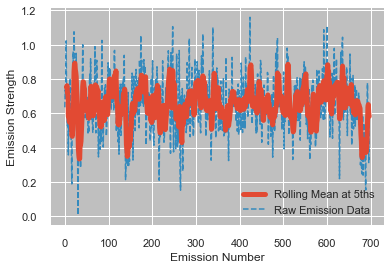

In [492]:
pulsar6['RollingMeanEmissions5ths'] = pulsar6["Brightness"].rolling(5).mean()

plt.plot(pulsar6['RollingMeanEmissions5ths'], label="Rolling Mean at 5ths", lw=5, zorder=2)
plt.plot(pulsar6['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

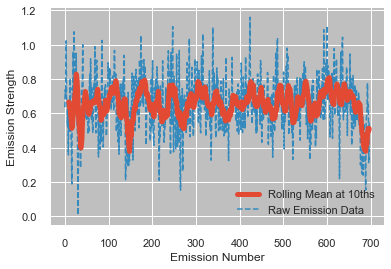

In [493]:
pulsar6['RollingMeanEmissions10ths'] = pulsar6["Brightness"].rolling(10).mean()

plt.plot(pulsar6['RollingMeanEmissions10ths'], label="Rolling Mean at 10ths", lw=5, zorder=2)
plt.plot(pulsar6['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

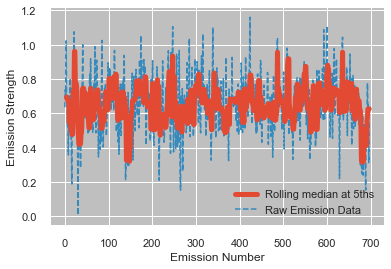

In [494]:
pulsar6['RollingMedianEmissions5ths'] = pulsar6["Brightness"].rolling(5).median()

plt.plot(pulsar6['RollingMedianEmissions5ths'], label="Rolling median at 5ths", lw=5, zorder=2)
plt.plot(pulsar6['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

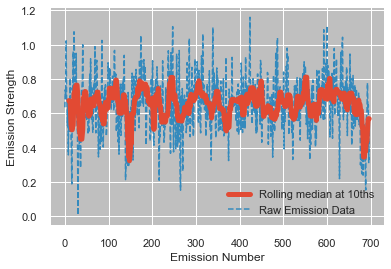

In [495]:
pulsar6['RollingMedianEmissions10ths'] = pulsar6["Brightness"].rolling(10).median()

plt.plot(pulsar6['RollingMedianEmissions10ths'], label="Rolling median at 10ths", lw=5, zorder=2)
plt.plot(pulsar6['Brightness'], label= "Raw Emission Data", linestyle='--', zorder=1)
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

In [496]:
pulsar6.head(25)

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0              1    0.634671     0.002761       0                       NaN   
1              2    0.736945     0.005207       1                       NaN   
2              3    0.693834     0.002706       1                       NaN   
3              4    1.021866     0.010184       1                       NaN   
4              5    0.673845     0.006236       1                  0.752232   
5              6    0.676883     0.004763       1                  0.760675   
6              7    0.527039     0.002422       0                  0.718693   
7              8    0.673417     0.003174       1                  0.714610   
8              9    0.357076     0.002848       0                  0.581652   
9             10    0.661704     0.005588       1                  0.579224   
10            11    0.545564     0.003835       0                  0.552960   
11            12    0.494655     0.003145       0                  0.546483   
12            13    0.804260     0.005258       1                  0.572651   
13            14    0.513362     0.005700       0                  0.603909   
14            15    0.477025     0.002945       0                  0.566973   
15            16    0.399571     0.004712       0                  0.537775   
16            17    0.188069     0.002452       0                  0.476457   
17            18    0.748592     0.005468       1                  0.465324   
18            19    0.723437     0.004548       1                  0.507339   
19            20    0.960154     0.006765       1                  0.603965   
20            21    0.707715     0.006011       1                  0.665593   
21            22    1.074550     0.006831       1                  0.842890   
22            23    0.961340     0.006617       1                  0.885439   
23            24    0.754457     0.004117       1                  0.891643   
24            25    0.773151     0.004920       1                  0.854242   

    RollingMeanEmissions10ths  RollingMedianEmissions5ths  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                    0.693834   
5                         NaN                    0.693834   
6                         NaN                    0.676883   
7                         NaN                    0.673845   
8                         NaN                    0.673417   
9                    0.665728                    0.661704   
10                   0.656817                    0.545564   
11                   0.632588                    0.545564   
12                   0.643631                    0.545564   
13                   0.592780                    0.545564   
14                   0.573098                    0.513362   
15                   0.545367                    0.494655   
16                   0.511470                    0.477025   
17                   0.518988                    0.477025   
18                   0.555624                    0.477025   
19                   0.585469                    0.723437   
20                   0.601684                    0.723437   
21                   0.659673                    0.748592   
22                   0.675381                    0.960154   
23                   0.699491                    0.960154   
24                   0.729103                    0.773151   

    RollingMedianEmissions10ths  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
5                           NaN  
6                           NaN  
7                           NaN  
8                           NaN  
9                     

# ML for Pulsar 1

## Binary Classification

In [497]:
X = pulsar[['Brightness', 'Uncertainty']]
y = pulsar['Binary']

In [498]:
X.head()

Brightness  Uncertainty
0    0.598393     0.056431
1    0.590859     0.055182
2    0.449643     0.063632
3    0.682860     0.056269
4    0.490026     0.046830

In [499]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Binary, dtype: int32

In [500]:

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

In [501]:


train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

In [502]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [503]:
predictions = model.predict(X_test)

In [504]:


cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  2702
False Positive(FP) =  124
True Negative(TN)  =  2574
False Negative(FN) =  0


In [505]:
acc = (2689 + 2603)/(2689 + 2603 + 108 + 0)
recall = (2689)/(0+2689)
precision = (2689)/(2689+108)
f1 = (2)/((1/recall)+ (1/precision))

print(acc)
print(recall)
print(precision)
print(f1)

0.98
1.0
0.9613872005720415
0.9803135253372222


In [506]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print("Accuracy of the model is ", accuracy)

Accuracy of the model is  0.977037037037037


## Bidirectional LSTM Model

In [507]:
values_list = pulsar[['Brightness', 'Uncertainty']].values.tolist()
values_list = preprocessing.normalize(values_list)
def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)
# splitting the list
X, y = split_list(values_list, 100)
# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))
# splitting the list into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)
# setting the parameters for the lstm model and compiling it
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(100, 2)))
model.add(Dense(25))
model.add(Dense(12))
model.add(Dense(6))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1, batch_size=(int(X_train.shape[0]/50)))
# predicting the y/brightness values for the test set
y_pred = model.predict(X_test, verbose=0)

Epoch 1/2
51/51 [==============================] - 17s 288ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 2/2
51/51 [==============================] - 16s 312ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0030 - val_mse: 0.0030


In [508]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RSE: ', math.sqrt(mean_absolute_error(y_test, y_pred)))

R2 Score:  0.08285777664769833
MAE:  0.015454641925850183
RSE:  0.12431670010843347


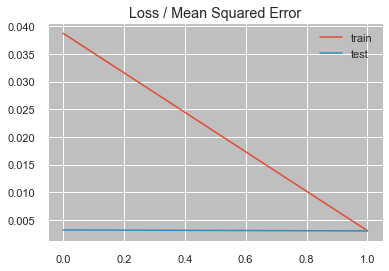

In [509]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## ML Evaluation.

### Logistic Regression

This model appears to have gained some insight in the data and accurately defined a majority of the data. The accuracy of the model is >95% which indicates that it was able to determine a trend and apply it in a useful manner in the predictions during evaluation. Further, the confusion matrix further supports the high accuracy and likely usefulness of the model with only 3 false assignments. However, in analysis this is only to determine if there is a correlation between binary assignment and the emission strength x error in measurement. This doesn't aid us in our overall randomness determination, but it does determine that uncertainty has a role in the binary assignment and the overall trust of emission strength.

### Bidirectional LSTM

This model is very error prone as the loss value is consistently at 60& or higher at every epoch during training and at exactly 63.07% in evaluation with a 0% accuracy this indicates that there is either a great error in the formation of the model, data used or trend being obtained. Alternatively it could indicate that there is no trend there to predict. Likely this indicates that the model is not valuable for any meaningful analysis.

# Machine Learning Algorithms for Pulsar 2


## Binary Classifcation with Logistic Regression of Pulsar 2


In [510]:
X = pulsar2[['Brightness', 'Uncertainty']]
y = pulsar2['Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [511]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1408
False Positive(FP) =  1
True Negative(TN)  =  1417
False Negative(FN) =  40


In [512]:
acc = (2689 + 2603)/(2689 + 2603 + 108 + 0)
recall = (2689)/(0+2689)
precision = (2689)/(2689+108)
f1 = (2)/((1/recall)+ (1/precision))

print(acc)
print(recall)
print(precision)
print(f1)

0.98
1.0
0.9613872005720415
0.9803135253372222


In [513]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print("Accuracy of the model is ", accuracy)

Accuracy of the model is  0.9856943475226797


## Bidirectional LSTM Model of Pulsar 2

In [514]:
values_list = pulsar2[['Brightness', 'Uncertainty']].values.tolist()
values_list = preprocessing.normalize(values_list)
def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)
# splitting the list
X, y = split_list(values_list, 100)
# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))
# splitting the list into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)
# setting the parameters for the lstm model and compiling it
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(100, 2)))
model.add(Dense(25))
model.add(Dense(12))
model.add(Dense(6))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1, batch_size=(int(X_train.shape[0]/50)))
# predicting the y/brightness values for the test set
y_pred = model.predict(X_test, verbose=0)

Epoch 1/2
51/51 [==============================] - 8s 122ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 2/2
51/51 [==============================] - 6s 111ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0078 - val_mse: 0.0078


In [515]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RSE: ', math.sqrt(mean_absolute_error(y_test, y_pred)))

R2 Score:  -0.03016332762087015
MAE:  0.019397977582998056
RSE:  0.1392766225286859


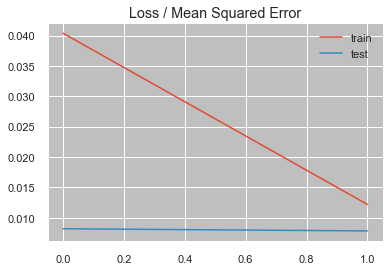

In [516]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Pulsar 2 ML Evaluation.

### Logistic Regression

This model appears to have gained some insight in the data and accurately defined a majority of the data. The accuracy of the model is >95% which indicates that it was able to determine a trend and apply it in a useful manner in the predictions during evaluation. Further, the confusion matrix further supports the high accuracy and likely usefulness of the model with only 3 false assignments. However, in analysis this is only to determine if there is a correlation between binary assignment and the emission strength x error in measurement. This doesn't aid us in our overall randomness determination, but it does determine that uncertainty has a role in the binary assignment and the overall trust of emission strength.

### Bidirectional LSTM

This model is very error prone as the loss value is consistently at 60& or higher at every epoch during training and at exactly 63.07% in evaluation with a 0% accuracy this indicates that there is either a great error in the formation of the model, data used or trend being obtained. Alternatively it could indicate that there is no trend there to predict. Likely this indicates that the model is not valuable for any meaningful analysis.

# Machine Learning Algorithms for Pulsar 3


## Logistic Regression.

In [517]:
X = pulsar3[['Brightness', 'Uncertainty']]
y = pulsar3['Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [518]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  136
False Positive(FP) =  6
True Negative(TN)  =  124
False Negative(FN) =  1


In [519]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print("Accuracy of the model is ", accuracy)

Accuracy of the model is  0.9737827715355806


## Bidirectional LSTM Model.

In [520]:
values_list = pulsar3[['Brightness', 'Uncertainty']].values.tolist()
values_list = preprocessing.normalize(values_list)
def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)
# splitting the list
X, y = split_list(values_list, 100)
# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))
# splitting the list into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)
# setting the parameters for the lstm model and compiling it
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(100, 2)))
model.add(Dense(25))
model.add(Dense(12))
model.add(Dense(6))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1, batch_size=(int(X_train.shape[0]/50)))
# predicting the y/brightness values for the test set
y_pred = model.predict(X_test, verbose=0)


Epoch 1/2
52/52 [==============================] - 5s 44ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 5.0718e-04 - val_mse: 5.0718e-04
Epoch 2/2
52/52 [==============================] - 2s 40ms/step - loss: 7.5609e-05 - mse: 7.5609e-05 - val_loss: 2.6630e-06 - val_mse: 2.6630e-06


In [521]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RSE: ', math.sqrt(mean_absolute_error(y_test, y_pred)))

R2 Score:  -147.5902096658256
MAE:  0.0016074164402208352
RSE:  0.04009259832214464


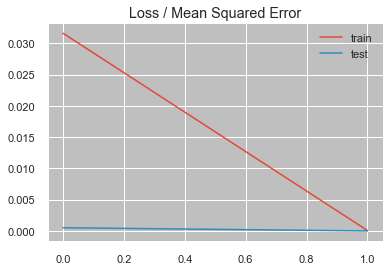

In [522]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Pulsar 3 ML Evaluation.

### Logistic Regression

This model appears to have gained some insight in the data and accurately defined a majority of the data. The accuracy of the model is >95% which indicates that it was able to determine a trend and apply it in a useful manner in the predictions during evaluation. Further, the confusion matrix further supports the high accuracy and likely usefulness of the model with only 3 false assignments. However, in analysis this is only to determine if there is a correlation between binary assignment and the emission strength x error in measurement. This doesn't aid us in our overall randomness determination, but it does determine that uncertainty has a role in the binary assignment and the overall trust of emission strength.

### Bidirectional LSTM

This model is very error prone as the loss value is consistently at 60& or higher at every epoch during training and at exactly 63.07% in evaluation with a 0% accuracy this indicates that there is either a great error in the formation of the model, data used or trend being obtained. Alternatively it could indicate that there is no trend there to predict. Likely this indicates that the model is not valuable for any meaningful analysis.

# Pulsar 4 ML section

## Logistic Regression

In [523]:
X = pulsar4[['Brightness', 'Uncertainty']]
y = pulsar4['Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [524]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  176
False Positive(FP) =  7
True Negative(TN)  =  181
False Negative(FN) =  0


In [525]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print("Accuracy of the model is ", accuracy)

Accuracy of the model is  0.9807692307692307


## Bidirectional LSTM

In [526]:
values_list = pulsar4[['Brightness', 'Uncertainty']].values.tolist()
values_list = preprocessing.normalize(values_list)
def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)
# splitting the list
X, y = split_list(values_list, 100)
# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))
# splitting the list into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)
# setting the parameters for the lstm model and compiling it
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(100, 2)))
model.add(Dense(25))
model.add(Dense(12))
model.add(Dense(6))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1, batch_size=(int(X_train.shape[0]/50)))
# predicting the y/brightness values for the test set
y_pred = model.predict(X_test, verbose=0)

Epoch 1/2
51/51 [==============================] - 5s 51ms/step - loss: 0.1841 - mse: 0.1841 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 2/2
51/51 [==============================] - 2s 37ms/step - loss: 0.0940 - mse: 0.0940 - val_loss: 0.0996 - val_mse: 0.0996


In [527]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RSE: ', math.sqrt(mean_absolute_error(y_test, y_pred)))

R2 Score:  0.44135336648806556
MAE:  0.14931135582560254
RSE:  0.38640827608321554


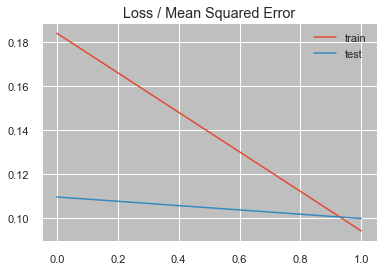

In [528]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## ML Evaluation of Pulsar 4

### Logistic Regression

This model appears to have gained some insight in the data and accurately defined a majority of the data. The accuracy of the model is >95% which indicates that it was able to determine a trend and apply it in a useful manner in the predictions during evaluation. Further, the confusion matrix further supports the high accuracy and likely usefulness of the model with only 3 false assignments. However, in analysis this is only to determine if there is a correlation between binary assignment and the emission strength x error in measurement. This doesn't aid us in our overall randomness determination, but it does determine that uncertainty has a role in the binary assignment and the overall trust of emission strength.

### Bidirectional LSTM

This model is very error prone as the loss value is consistently at 60& or higher at every epoch during training and at exactly 63.07% in evaluation with a 0% accuracy this indicates that there is either a great error in the formation of the model, data used or trend being obtained. Alternatively it could indicate that there is no trend there to predict. Likely this indicates that the model is not valuable for any meaningful analysis.

# ML For Pulsar 5

## Logistic Regression

In [529]:
X = pulsar5[['Brightness', 'Uncertainty']]
y = pulsar5['Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [530]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  118
False Positive(FP) =  0
True Negative(TN)  =  101
False Negative(FN) =  25


In [531]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print("Accuracy of the model is ", accuracy)

Accuracy of the model is  0.8975409836065574


## Bidirectional LSTM

In [532]:
values_list = pulsar5[['Brightness', 'Uncertainty']].values.tolist()
values_list = preprocessing.normalize(values_list)
def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)
# splitting the list
X, y = split_list(values_list, 100)
# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))
# splitting the list into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)
# setting the parameters for the lstm model and compiling it
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(100, 2)))
model.add(Dense(25))
model.add(Dense(12))
model.add(Dense(6))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1, batch_size=(int(X_train.shape[0]/50)))
# predicting the y/brightness values for the test set
y_pred = model.predict(X_test, verbose=0)

Epoch 1/2
53/53 [==============================] - 4s 37ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 2/2
53/53 [==============================] - 1s 25ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0079 - val_mse: 0.0079


In [533]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RSE: ', math.sqrt(mean_absolute_error(y_test, y_pred)))

R2 Score:  -0.05806535861126472
MAE:  0.027745581382024785
RSE:  0.16657004947476237


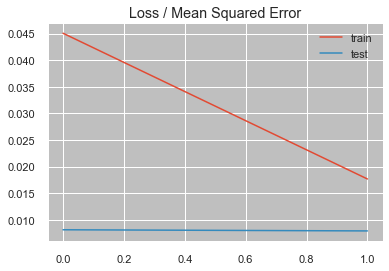

In [534]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## ML Evaluation of pulsar 5

### Logistic Regression

This model appears to have gained some insight in the data and accurately defined a majority of the data. The accuracy of the model is >95% which indicates that it was able to determine a trend and apply it in a useful manner in the predictions during evaluation. Further, the confusion matrix further supports the high accuracy and likely usefulness of the model with only 3 false assignments. However, in analysis this is only to determine if there is a correlation between binary assignment and the emission strength x error in measurement. This doesn't aid us in our overall randomness determination, but it does determine that uncertainty has a role in the binary assignment and the overall trust of emission strength.

### Bidirectional LSTM

This model is very error prone as the loss value is consistently at 60& or higher at every epoch during training and at exactly 63.07% in evaluation with a 0% accuracy this indicates that there is either a great error in the formation of the model, data used or trend being obtained. Alternatively it could indicate that there is no trend there to predict. Likely this indicates that the model is not valuable for any meaningful analysis.

# ML for Pulsar 6

## Logistic Regression

In [535]:
X = pulsar6[['Brightness', 'Uncertainty']]
y = pulsar6['Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [536]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  71
False Positive(FP) =  0
True Negative(TN)  =  69
False Negative(FN) =  0


In [537]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print("Accuracy of the model is ", accuracy)

Accuracy of the model is  1.0


## Bidirectional LSTM

In [538]:
values_list = pulsar6[['Brightness', 'Uncertainty']].values.tolist()
values_list = preprocessing.normalize(values_list)
def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)
# splitting the list
X, y = split_list(values_list, 100)
# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))
# splitting the list into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)
# setting the parameters for the lstm model and compiling it
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(100, 2)))
model.add(Dense(25))
model.add(Dense(12))
model.add(Dense(6))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1, batch_size=(int(X_train.shape[0]/50)))
# predicting the y/brightness values for the test set
y_pred = model.predict(X_test, verbose=0)

Epoch 1/2
54/54 [==============================] - 5s 47ms/step - loss: 0.0740 - mse: 0.0740 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/2
54/54 [==============================] - 2s 38ms/step - loss: 1.1575e-04 - mse: 1.1575e-04 - val_loss: 3.6621e-07 - val_mse: 3.6621e-07


In [539]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RSE: ', math.sqrt(mean_absolute_error(y_test, y_pred)))

R2 Score:  -397.9862654315415
MAE:  0.0005607288057481046
RSE:  0.02367971295746856


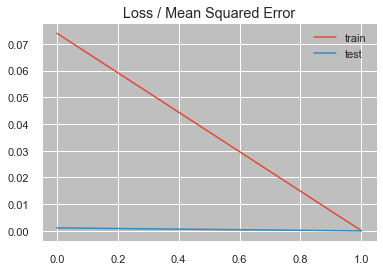

In [540]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## ML Evaluation of pulsar 6

### Logistic Regression

This model appears to have gained some insight in the data and accurately defined a majority of the data. The accuracy of the model is >95% which indicates that it was able to determine a trend and apply it in a useful manner in the predictions during evaluation. Further, the confusion matrix further supports the high accuracy and likely usefulness of the model with only 3 false assignments. However, in analysis this is only to determine if there is a correlation between binary assignment and the emission strength x error in measurement. This doesn't aid us in our overall randomness determination, but it does determine that uncertainty has a role in the binary assignment and the overall trust of emission strength.

### Bidirectional LSTM

This model is very error prone as the loss value is consistently at 60& or higher at every epoch during training and at exactly 63.07% in evaluation with a 0% accuracy this indicates that there is either a great error in the formation of the model, data used or trend being obtained. Alternatively it could indicate that there is no trend there to predict. Likely this indicates that the model is not valuable for any meaningful analysis.




# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

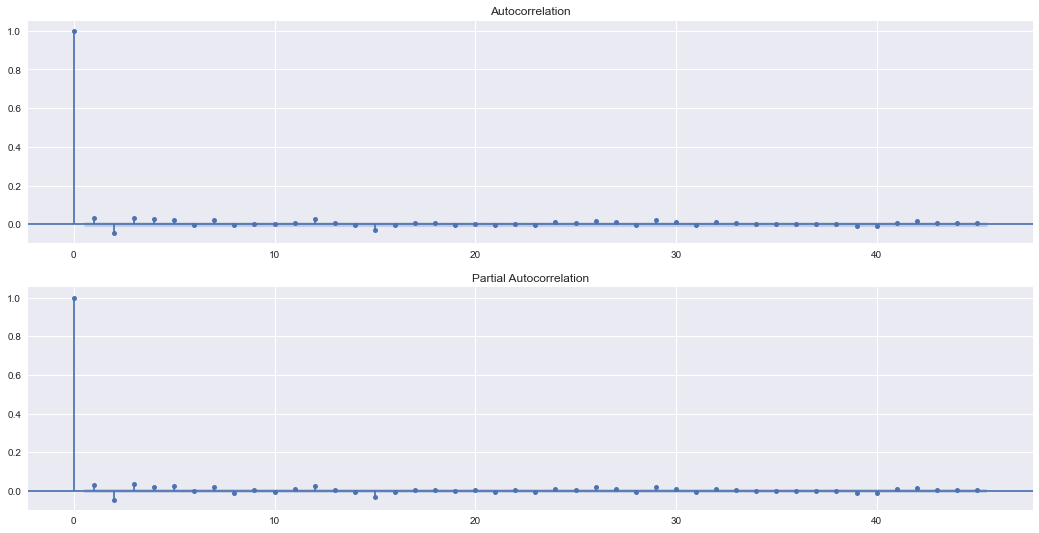

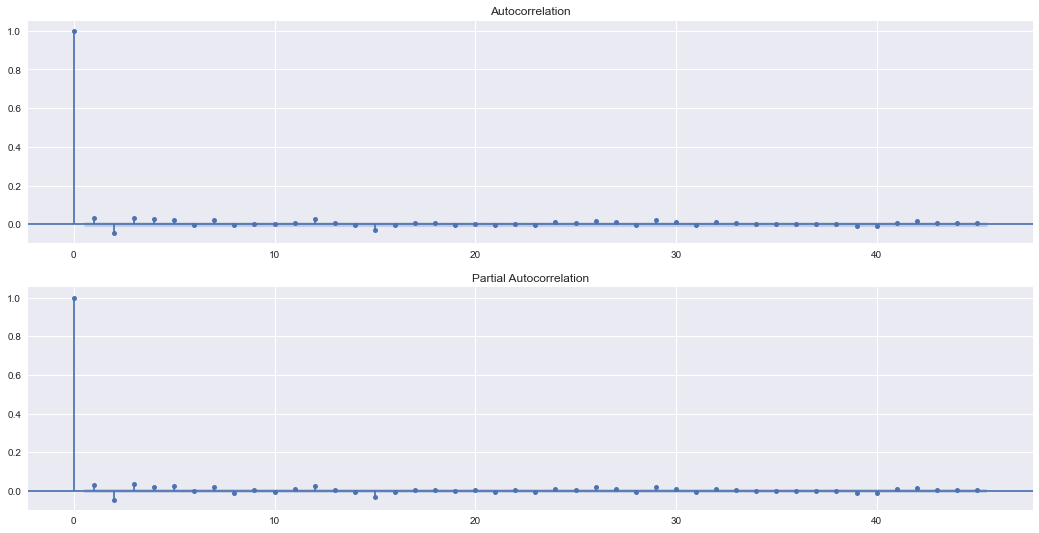

In [541]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar['Brightness'], ax=ax[0])
plot_pacf(pulsar['Brightness'], ax=ax[1], method="ols")

In [542]:
acf(pulsar['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  3.02297520e-02, -4.45596588e-02,  3.11934730e-02,
        2.59222929e-02,  2.29438690e-02, -2.72483478e-03,  2.17140483e-02,
       -5.63815508e-03,  1.61127481e-03, -7.10167005e-04])

In [543]:
acfpulsar = pd.DataFrame()
for lag in range(0,11):
    acfpulsar[f"B_lag_{lag}"] = pulsar['Brightness'].shift(lag)


acfpulsar

B_lag_0   B_lag_1   B_lag_2   B_lag_3   B_lag_4   B_lag_5   B_lag_6  \
0      0.598393       NaN       NaN       NaN       NaN       NaN       NaN   
1      0.590859  0.598393       NaN       NaN       NaN       NaN       NaN   
2      0.449643  0.590859  0.598393       NaN       NaN       NaN       NaN   
3      0.682860  0.449643  0.590859  0.598393       NaN       NaN       NaN   
4      0.490026  0.682860  0.449643  0.590859  0.598393       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
26995  0.539079  0.396929  1.014446  0.659313  1.173766  0.606806  0.500412   
26996  0.324070  0.539079  0.396929  1.014446  0.659313  1.173766  0.606806   
26997  0.291341  0.324070  0.539079  0.396929  1.014446  0.659313  1.173766   
26998  0.346267  0.291341  0.324070  0.539079  0.396929  1.014446  0.659313   
26999  0.513315  0.346267  0.291341  0.324070  0.539079  0.396929  1.014446   

        B_lag_7   B_lag_8   B_lag_9  B_lag_10  
0           NaN       NaN       NaN       NaN  
1           NaN       NaN       NaN       NaN  
2           NaN       NaN       NaN       NaN  
3           NaN       NaN       NaN       NaN  
4           NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...  
26995  0.409631  0.698172  0.262350  0.447577  
26996  0.500412  0.409631  0.698172  0.262350  
26997  0.606806  0.500412  0.409631  0.698172  
26998  1.173766  0.606806  0.500412  0.409631  
26999  0.659313  1.173766  0.606806  0.500412  

[27000 rows x 11 columns]

In [544]:
acfpulsar.corr()["B_lag_0"].values

array([ 1.00000000e+00,  3.02297663e-02, -4.45598682e-02,  3.11938480e-02,
        2.59227920e-02,  2.29443159e-02, -2.72489307e-03,  2.17154085e-02,
       -5.63853223e-03,  1.61145686e-03, -7.10263111e-04])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [545]:
held5ths = pulsar[pulsar.index % 5 == 0]
held5ths

Pulse Number  Brightness  Uncertainty  Binary  \
0                 1    0.598393     0.056431       1   
5                 6    0.586071     0.052649       1   
10               11    0.670907     0.049539       1   
15               16    0.404870     0.056679       0   
20               21    0.297223     0.048826       0   
...             ...         ...          ...     ...   
26975         26976    0.384184     0.070075       0   
26980         26981    0.317133     0.055033       0   
26985         26986    0.447577     0.054011       1   
26990         26991    0.606806     0.043464       1   
26995         26996    0.539079     0.063854       1   

       RollingMeanEmissions5ths  RollingMeanEmissions10ths  \
0                           NaN                        NaN   
5                      0.559892                        NaN   
10                     0.526181                   0.543036   
15                     0.454187                   0.490184   
20                     0.350959                   0.402573   
...                         ...                        ...   
26975                  0.595775                   0.483936   
26980                  0.589773                   0.592774   
26985                  0.440076                   0.514925   
26990                  0.495474                   0.467775   
26995                  0.756707                   0.626091   

       RollingMedianEmissions5ths  RollingMedianEmissions10ths  
0                             NaN                          NaN  
5                        0.586071                          NaN  
10                       0.429094                     0.538048  
15                       0.465406                     0.447250  
20                       0.297223                     0.414102  
...                           ...                          ...  
26975                    0.516402                     0.474701  
26980                    0.317133                     0.474701  
26985                    0.447577                     0.382355  
26990                    0.500412                     0.450191  
26995                    0.659313                     0.572943  

[5400 rows x 8 columns]

In [546]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.43021975

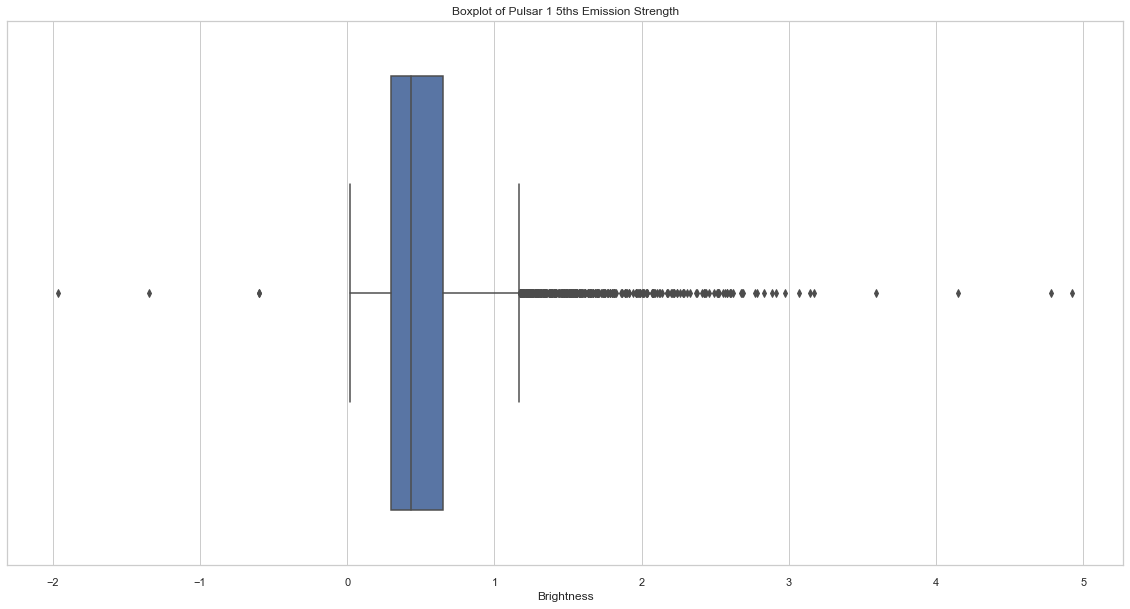

In [547]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 1 5ths Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


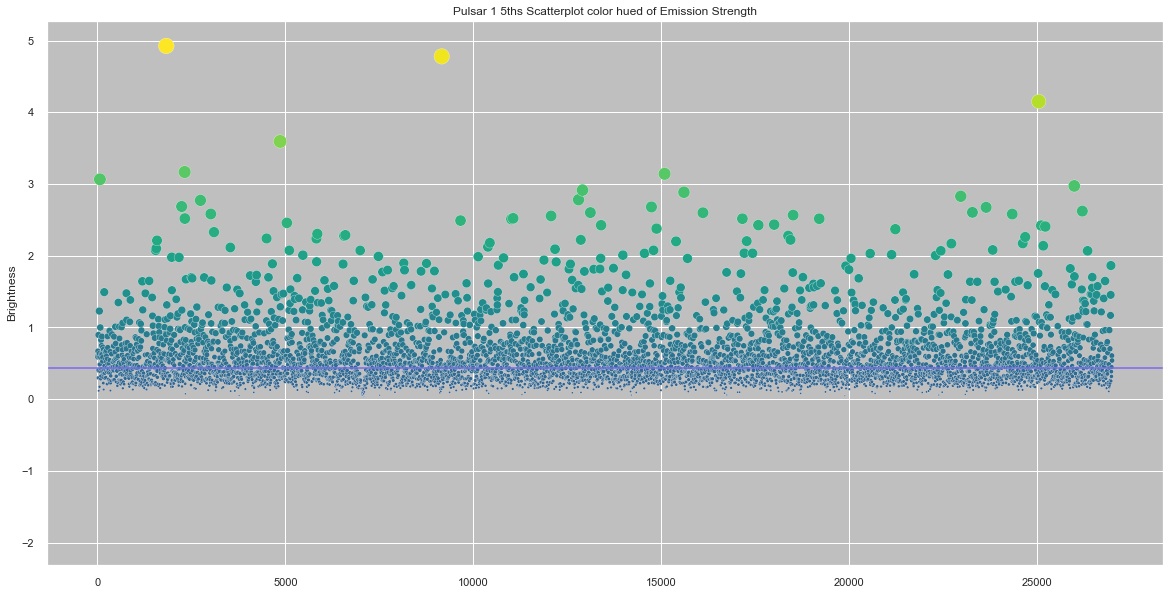

In [548]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 1 5ths Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.43021975, ls='-',c='mediumslateblue')

In [549]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = held5ths.Brightness.values
#ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
#ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [550]:
print(len(held5ths[(held5ths.Brightness > 0.43021975)]))
print(len(held5ths[(held5ths.Brightness < 0.43021975)]))

2700
2700


# Exporting Pulsar 1 datasets.

In [551]:
np.savetxt(r'every5thbinarypulsar1.txt', held5ths.Binary, fmt='%d', delimiter='')
pulsar15thsbinary = held5ths.Binary.to_list()
np.savetxt(r'allpulsar1.txt', pulsar.Binary, fmt='%d', delimiter='')

# Below we begin autocorrelation and autocovariance analysis for Pulsar 2

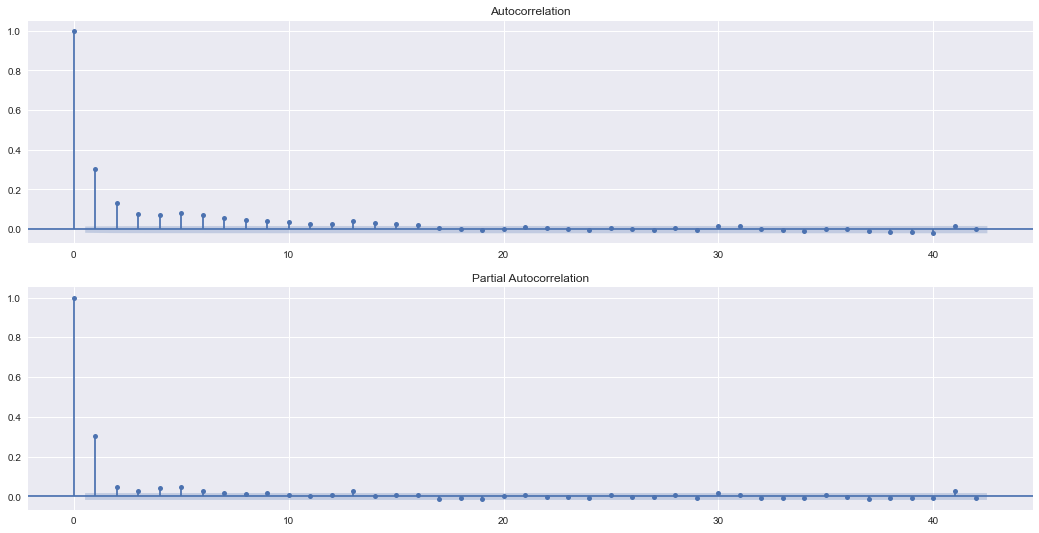

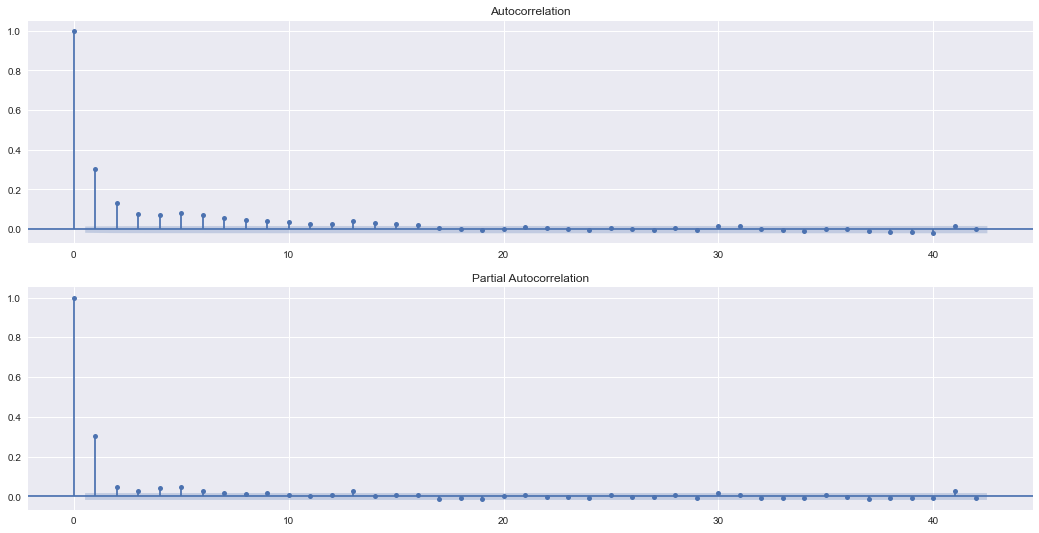

In [552]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar2['Brightness'], ax=ax[0])
plot_pacf(pulsar2['Brightness'], ax=ax[1], method="ols")

In [553]:
acf(pulsar2['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.30152047, 0.13254511, 0.07716124, 0.07364129,
       0.08096058, 0.07046427, 0.05556536, 0.0436438 , 0.04277081,
       0.03660132])

In [554]:
acfpulsar2 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar2[f"B_lag_{lag}"] = pulsar2['Brightness'].shift(lag)


acfpulsar2

B_lag_0   B_lag_1   B_lag_2   B_lag_3   B_lag_4   B_lag_5   B_lag_6  \
0      0.334330       NaN       NaN       NaN       NaN       NaN       NaN   
1     -0.098659  0.334330       NaN       NaN       NaN       NaN       NaN   
2      0.123514 -0.098659  0.334330       NaN       NaN       NaN       NaN   
3      0.443923  0.123514 -0.098659  0.334330       NaN       NaN       NaN   
4      1.590446  0.443923  0.123514 -0.098659  0.334330       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
14324  4.876881  5.386421  3.224787  1.953645  4.624813  0.225158  1.502603   
14325  2.074136  4.876881  5.386421  3.224787  1.953645  4.624813  0.225158   
14326  0.585504  2.074136  4.876881  5.386421  3.224787  1.953645  4.624813   
14327  0.360930  0.585504  2.074136  4.876881  5.386421  3.224787  1.953645   
14328  8.409811  0.360930  0.585504  2.074136  4.876881  5.386421  3.224787   

        B_lag_7   B_lag_8   B_lag_9  B_lag_10  
0           NaN       NaN       NaN       NaN  
1           NaN       NaN       NaN       NaN  
2           NaN       NaN       NaN       NaN  
3           NaN       NaN       NaN       NaN  
4           NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...  
14324  1.389349  1.592995  2.913151  0.181665  
14325  1.502603  1.389349  1.592995  2.913151  
14326  0.225158  1.502603  1.389349  1.592995  
14327  4.624813  0.225158  1.502603  1.389349  
14328  1.953645  4.624813  0.225158  1.502603  

[14329 rows x 11 columns]

In [555]:
acfpulsar2.corr()["B_lag_0"].values

array([1.        , 0.30191886, 0.13272532, 0.07726788, 0.07374568,
       0.08110522, 0.07062283, 0.0556971 , 0.04374889, 0.04288793,
       0.0367024 ])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [556]:
held5ths = pulsar2[pulsar2.index % 5 == 0]
held5ths

Pulse Number  Brightness  Uncertainty  Binary  \
0                 1    0.334330     0.015570       0   
5                 6    1.233848     0.018692       1   
10               11    0.824310     0.036243       1   
15               16    0.683800     0.049683       1   
20               21    1.006799     0.029068       1   
...             ...         ...          ...     ...   
14305         14306    0.081548     0.011737       0   
14310         14311    0.060433     0.011708       0   
14315         14316    2.913151     0.089312       1   
14320         14321    4.624813     0.095899       1   
14325         14326    2.074136     0.080444       1   

       RollingMeanEmissions5ths  RollingMeanEmissions10ths  \
0                           NaN                        NaN   
5                      0.658614                        NaN   
10                     0.533689                   0.596152   
15                     1.011360                   0.772525   
20                     1.602555                   1.306958   
...                         ...                        ...   
14305                  0.150069                   0.206964   
14310                  0.624411                   0.387240   
14315                  1.018175                   0.821293   
14320                  1.866984                   1.442579   
14325                  3.503174                   2.685079   

       RollingMedianEmissions5ths  
0                             NaN  
5                        0.443923  
10                       0.439929  
15                       0.683800  
20                       0.744937  
...                           ...  
14305                    0.081548  
14310                    0.374685  
14315                    0.496700  
14320                    1.502603  
14325                    3.224787  

[2866 rows x 7 columns]

In [557]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.49492415

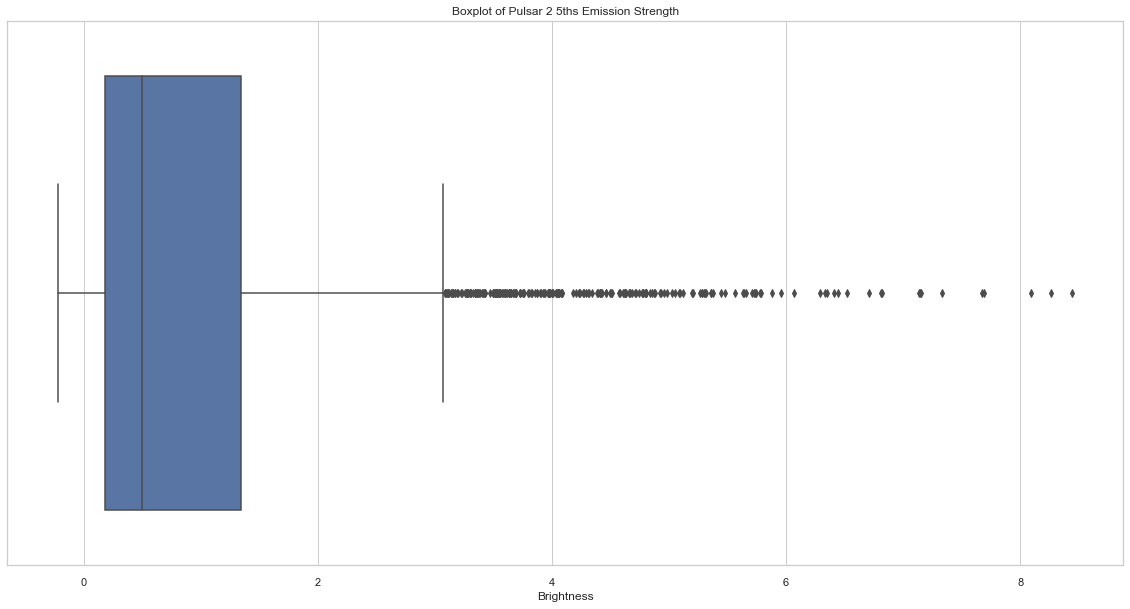

In [558]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 2 5ths Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


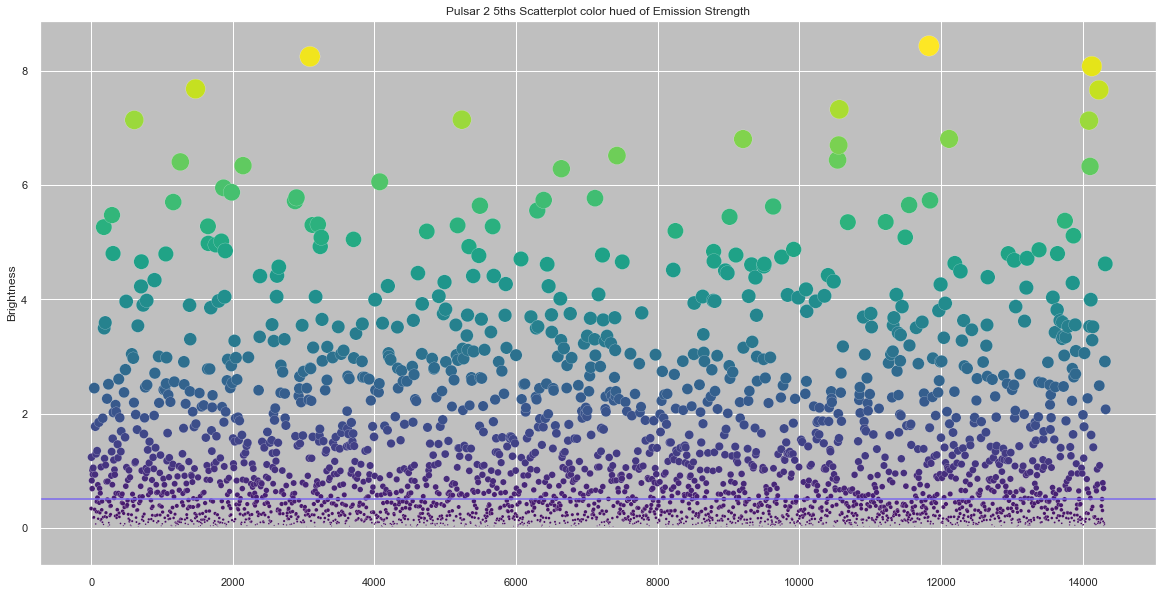

In [559]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 2 5ths Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.49492415, ls='-',c='mediumslateblue')

In [560]:
print(len(held5ths[(held5ths.Brightness > 0.49492415)]))
print(len(held5ths[(held5ths.Brightness < 0.49492415)]))

1433
1433


# Pulsar 2 Data Export

In [561]:
np.savetxt(r'every5thbinarypulsar2.txt', held5ths.Binary, fmt='%d', delimiter='')
pulsar25thsbinary = held5ths.Binary.to_list()
np.savetxt(r'allpulsar2.txt', pulsar2.Binary, fmt='%d', delimiter='')

# Below we begin autocorrelation and autocovariance analysis for Pulsar 3

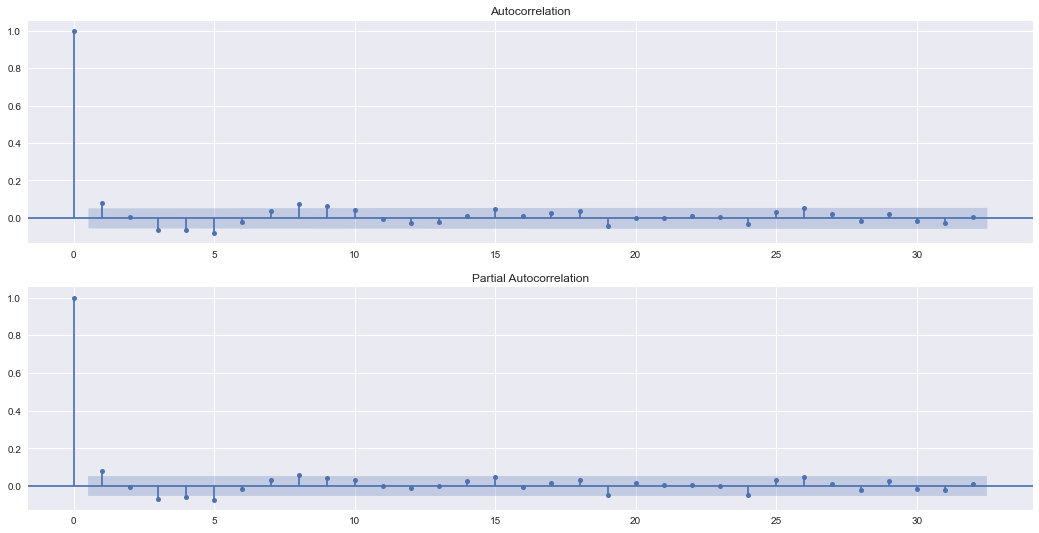

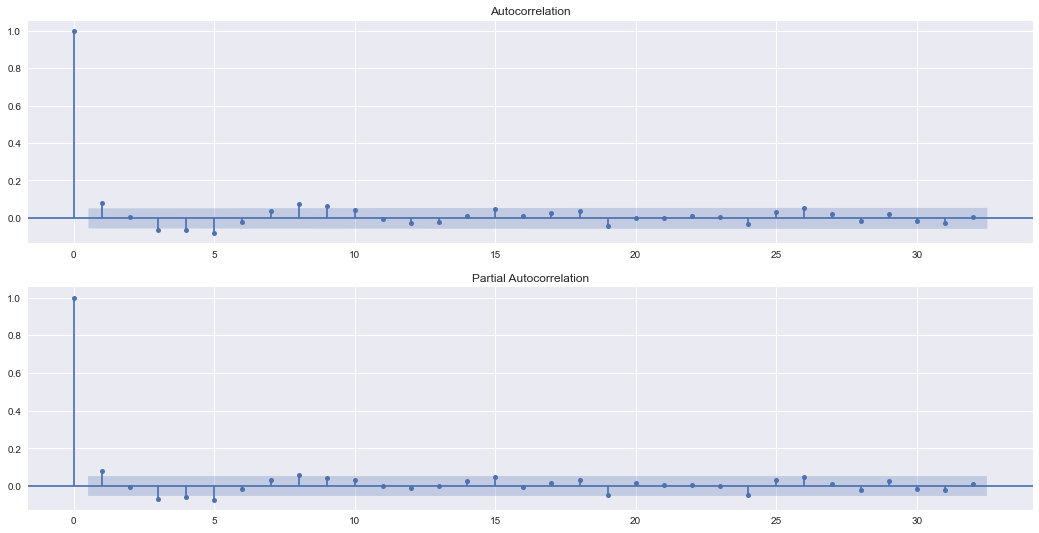

In [562]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar3['Brightness'], ax=ax[0])
plot_pacf(pulsar3['Brightness'], ax=ax[1], method="ols")

In [563]:
acf(pulsar3['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.08095517,  0.00412699, -0.06721578, -0.06554554,
       -0.07977771, -0.02053543,  0.03766276,  0.07611705,  0.06106126,
        0.04441705])

In [564]:
acfpulsar3 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar3[f"B_lag_{lag}"] = pulsar3['Brightness'].shift(lag)


acfpulsar3

B_lag_0   B_lag_1   B_lag_2   B_lag_3   B_lag_4   B_lag_5   B_lag_6  \
0     0.984043       NaN       NaN       NaN       NaN       NaN       NaN   
1     2.487928  0.984043       NaN       NaN       NaN       NaN       NaN   
2     1.690295  2.487928  0.984043       NaN       NaN       NaN       NaN   
3     1.196142  1.690295  2.487928  0.984043       NaN       NaN       NaN   
4     1.979783  1.196142  1.690295  2.487928  0.984043       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
1326  1.842016  2.646750  2.258860  2.123736  2.503202  2.178636  1.392491   
1327  1.547695  1.842016  2.646750  2.258860  2.123736  2.503202  2.178636   
1328  2.797312  1.547695  1.842016  2.646750  2.258860  2.123736  2.503202   
1329  3.351977  2.797312  1.547695  1.842016  2.646750  2.258860  2.123736   
1330  3.115255  3.351977  2.797312  1.547695  1.842016  2.646750  2.258860   

       B_lag_7   B_lag_8   B_lag_9  B_lag_10  
0          NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN  
...        ...       ...       ...       ...  
1326  1.886326  1.810641  1.943447  1.950708  
1327  1.392491  1.886326  1.810641  1.943447  
1328  2.178636  1.392491  1.886326  1.810641  
1329  2.503202  2.178636  1.392491  1.886326  
1330  2.123736  2.503202  2.178636  1.392491  

[1331 rows x 11 columns]

In [565]:
acfpulsar3.corr()["B_lag_0"].values

array([ 1.        ,  0.0811623 ,  0.00414645, -0.06751767, -0.06595236,
       -0.08029629, -0.02066581,  0.0379259 ,  0.07664111,  0.06149054,
        0.04473245])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [566]:
held5ths = pulsar3[pulsar3.index % 5 == 0]
held5ths

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0                1    0.984043     0.053831       0                       NaN   
5                6    2.297645     0.054210       1                  1.930359   
10              11    1.976790     0.037551       0                  2.233376   
15              16    1.581452     0.030372       0                  2.172861   
20              21    1.824490     0.036531       0                  2.373571   
...            ...         ...          ...     ...                       ...   
1310          1311    2.360064     0.034759       1                  2.020855   
1315          1316    2.596850     0.048041       1                  2.458422   
1320          1321    1.392491     0.030957       0                  1.796723   
1325          1326    2.646750     0.036691       1                  2.342237   
1330          1331    3.115255     0.035134       1                  2.530851   

      RollingMedianEmissions5ths  RollingMedianEmissions10ths  
0                            NaN                          NaN  
5                       1.979783                          NaN  
10                      2.289047                     2.212689  
15                      2.315184                     2.302116  
20                      2.529834                     2.380474  
...                          ...                          ...  
1310                    2.218181                     2.287940  
1315                    2.434470                     2.289122  
1320                    1.886326                     1.962875  
1325                    2.258860                     2.037222  
1330                    2.797312                     2.381031  

[267 rows x 7 columns]

In [567]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

2.256816

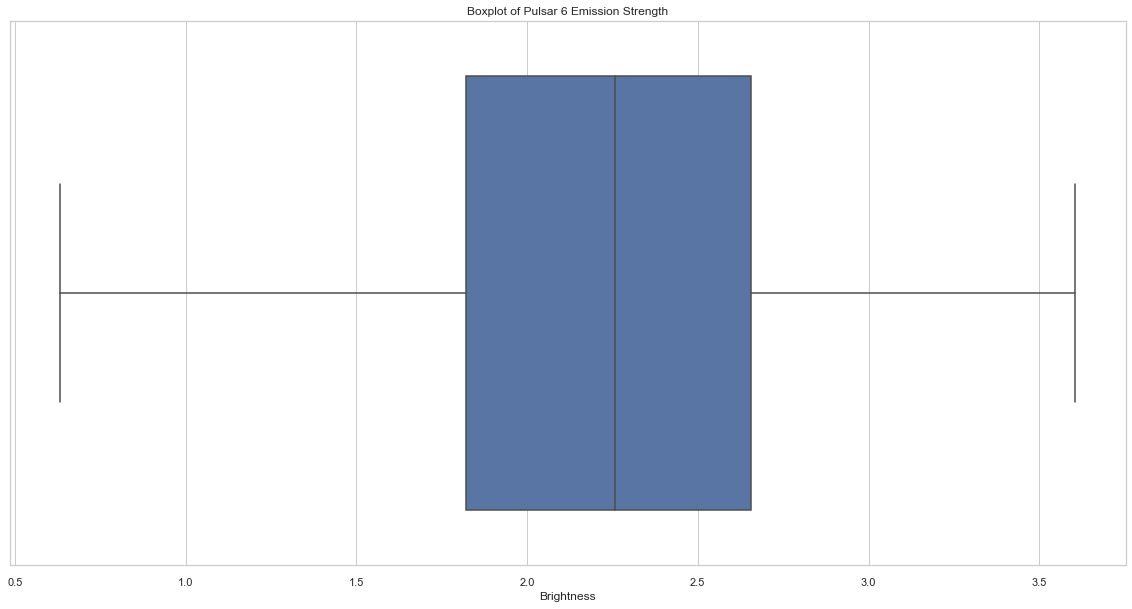

In [568]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

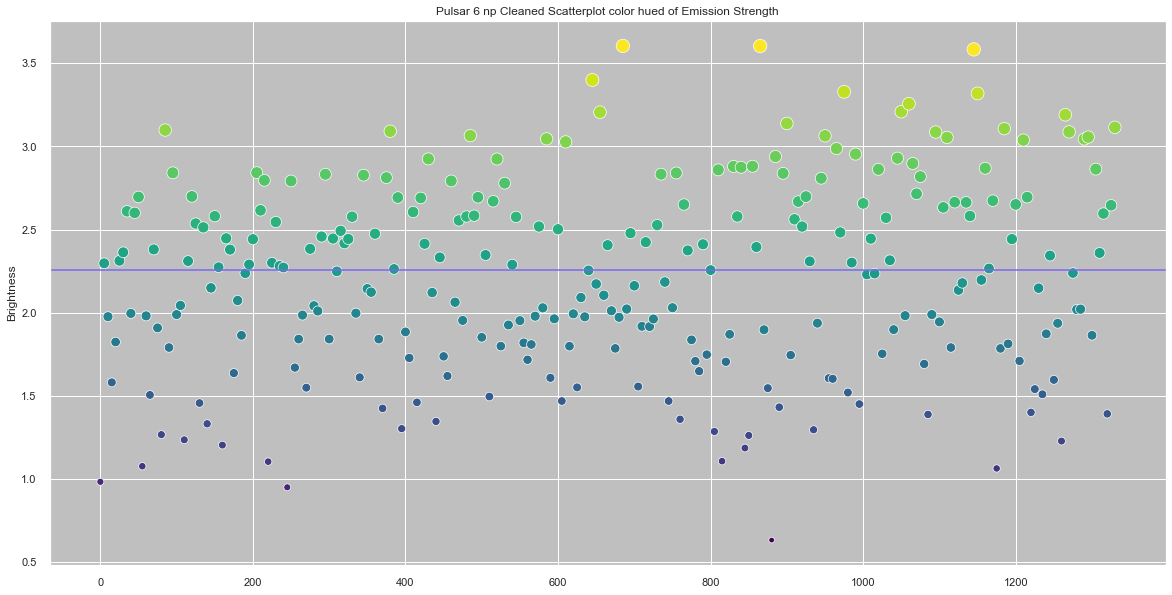

In [569]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=2.256816, ls='-',c='mediumslateblue')

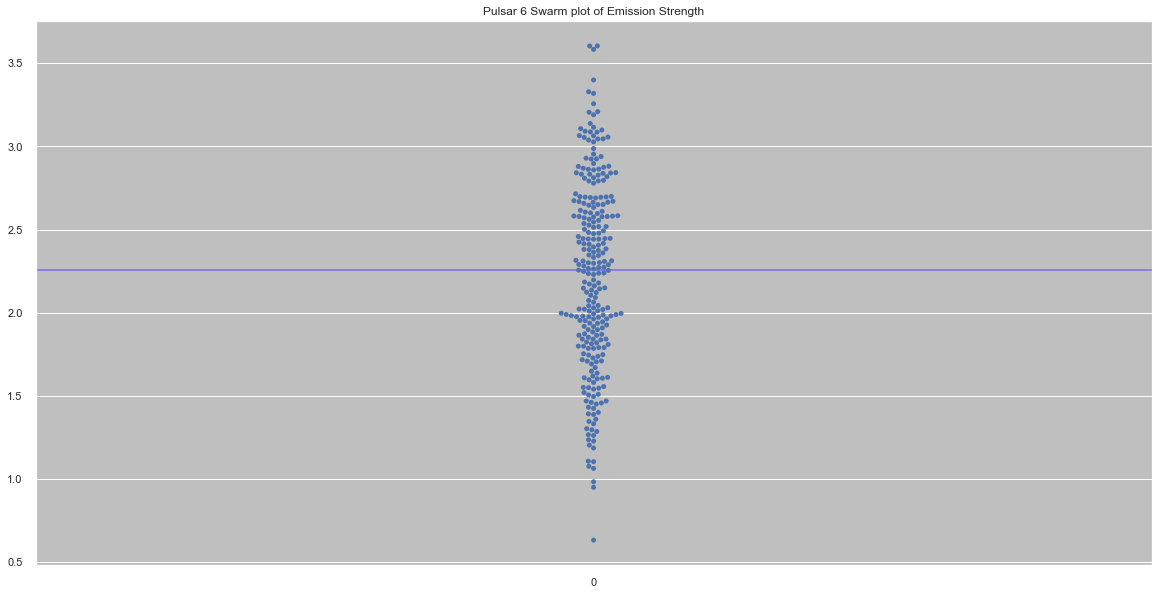

In [570]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=2.256816, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [571]:
print(len(held5ths[(held5ths.Brightness > 2.256816)]))
print(len(held5ths[(held5ths.Brightness < 2.256816)]))

133
133


# Pulsar 3 data export

In [572]:
np.savetxt(r'every5thbinarypulsar3.txt', held5ths.Binary, fmt='%d', delimiter='')
pulsar35thsbinary = held5ths.Binary.to_list()
np.savetxt(r'allpulsar3.txt', pulsar3.Binary, fmt='%d', delimiter='')

# Below we begin autocorrelation and autocovariance analysis for Pulsar 4

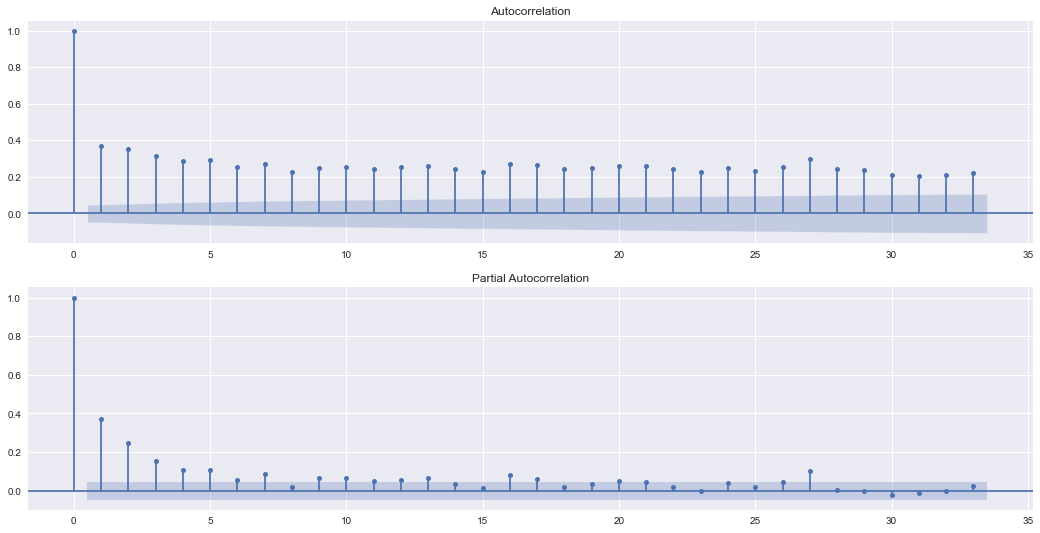

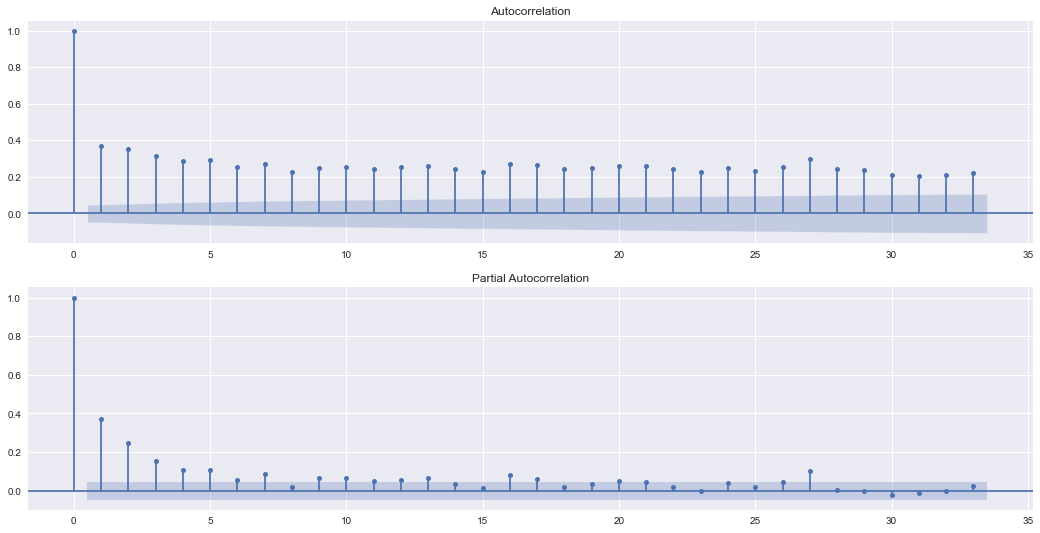

In [573]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar4['Brightness'], ax=ax[0])
plot_pacf(pulsar4['Brightness'], ax=ax[1], method="ols")

In [574]:
acf(pulsar4['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.37138454, 0.34994166, 0.31194031, 0.28665069,
       0.29048719, 0.25431929, 0.27167022, 0.22662943, 0.24809334,
       0.25146666])

In [575]:
acfpulsar4 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar4[f"B_lag_{lag}"] = pulsar4['Brightness'].shift(lag)


acfpulsar4

B_lag_0   B_lag_1   B_lag_2   B_lag_3   B_lag_4   B_lag_5   B_lag_6  \
0     0.101127       NaN       NaN       NaN       NaN       NaN       NaN   
1     0.012166  0.101127       NaN       NaN       NaN       NaN       NaN   
2     0.021918  0.012166  0.101127       NaN       NaN       NaN       NaN   
3     0.181179  0.021918  0.012166  0.101127       NaN       NaN       NaN   
4     0.000240  0.181179  0.021918  0.012166  0.101127       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
1814  0.105178  0.008539  0.053246  0.024587  0.004085  0.000947  0.044895   
1815  0.064272  0.105178  0.008539  0.053246  0.024587  0.004085  0.000947   
1816  0.000171  0.064272  0.105178  0.008539  0.053246  0.024587  0.004085   
1817 -0.000924  0.000171  0.064272  0.105178  0.008539  0.053246  0.024587   
1818  0.000001 -0.000924  0.000171  0.064272  0.105178  0.008539  0.053246   

       B_lag_7   B_lag_8   B_lag_9  B_lag_10  
0          NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN  
...        ...       ...       ...       ...  
1814  0.007906  0.048652  0.013009  0.006294  
1815  0.044895  0.007906  0.048652  0.013009  
1816  0.000947  0.044895  0.007906  0.048652  
1817  0.004085  0.000947  0.044895  0.007906  
1818  0.024587  0.004085  0.000947  0.044895  

[1819 rows x 11 columns]

In [576]:
acfpulsar4.corr()["B_lag_0"].values

array([1.        , 0.37158343, 0.35041747, 0.31258703, 0.28752434,
       0.29153195, 0.25533259, 0.27276504, 0.22759855, 0.2492633 ,
       0.25277541])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [577]:
held5ths = pulsar4[pulsar4.index % 5 == 0]
held5ths

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0                1    0.101127     0.001893       1                       NaN   
5                6    0.085866     0.001723       1                  0.060274   
10              11    0.123529     0.002026       1                  0.090983   
15              16    0.029203     0.001918       0                  0.080291   
20              21    0.042757     0.001891       0                  0.125101   
...            ...         ...          ...     ...                       ...   
1795          1796    0.004570     0.001779       0                  0.010804   
1800          1801    0.002429     0.001749       0                  0.042189   
1805          1806    0.013009     0.001764       0                  0.005799   
1810          1811    0.004085     0.001713       0                  0.021297   
1815          1816    0.064272     0.001995       0                  0.051165   

      RollingMeanEmissions10ths  RollingMedianEmissions5ths  \
0                           NaN                         NaN   
5                           NaN                    0.021918   
10                     0.075628                    0.087871   
15                     0.085637                    0.097413   
20                     0.102696                    0.123890   
...                         ...                         ...   
1795                   0.015280                    0.002436   
1800                   0.026497                    0.056999   
1805                   0.023994                    0.006294   
1810                   0.013548                    0.007906   
1815                   0.036231                    0.053246   

      RollingMedianEmissions10ths  
0                             NaN  
5                             NaN  
10                       0.084608  
15                       0.090377  
20                       0.099031  
...                           ...  
1795                     0.001989  
1800                     0.003503  
1805                     0.007042  
1810                     0.007042  
1815                     0.034741  

[364 rows x 8 columns]

In [578]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.07756883

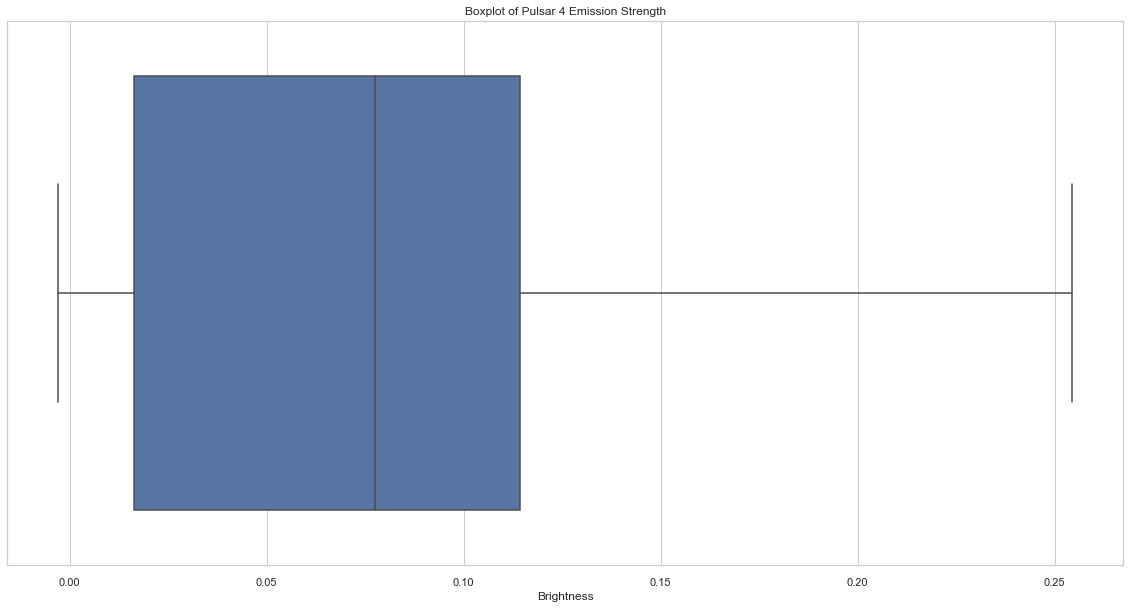

In [579]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 4 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


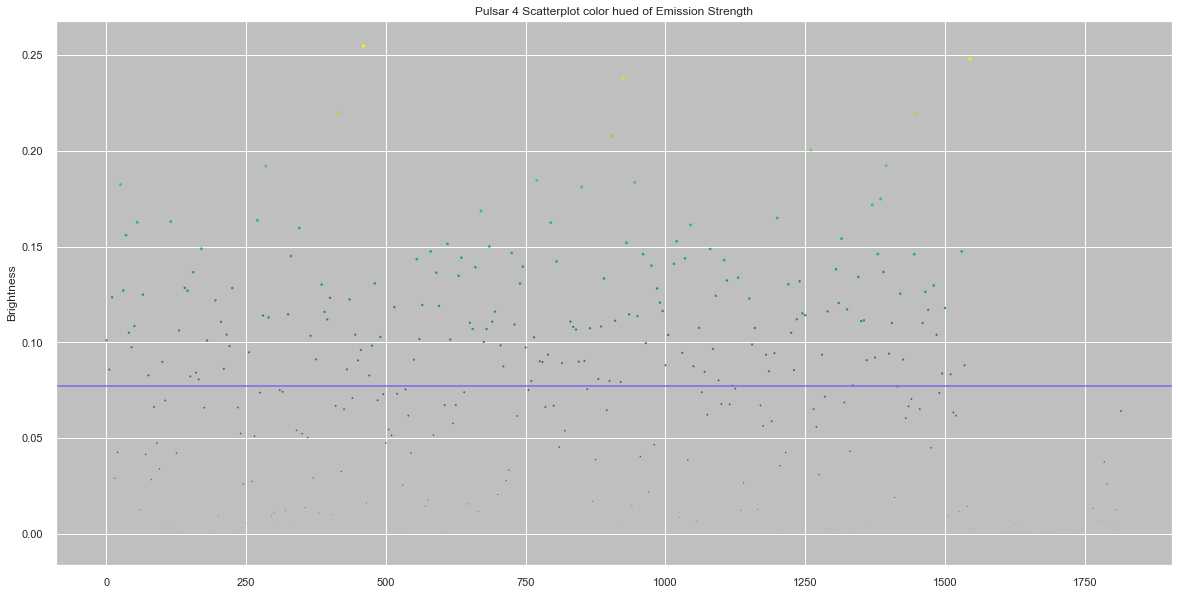

In [580]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 4 Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.07756883, ls='-',c='mediumslateblue')

In [581]:
held10ths = pulsar4[pulsar4.index % 10 == 0]
medianheld10ths = held10ths["Brightness"].median()
medianheld10ths

0.079977185

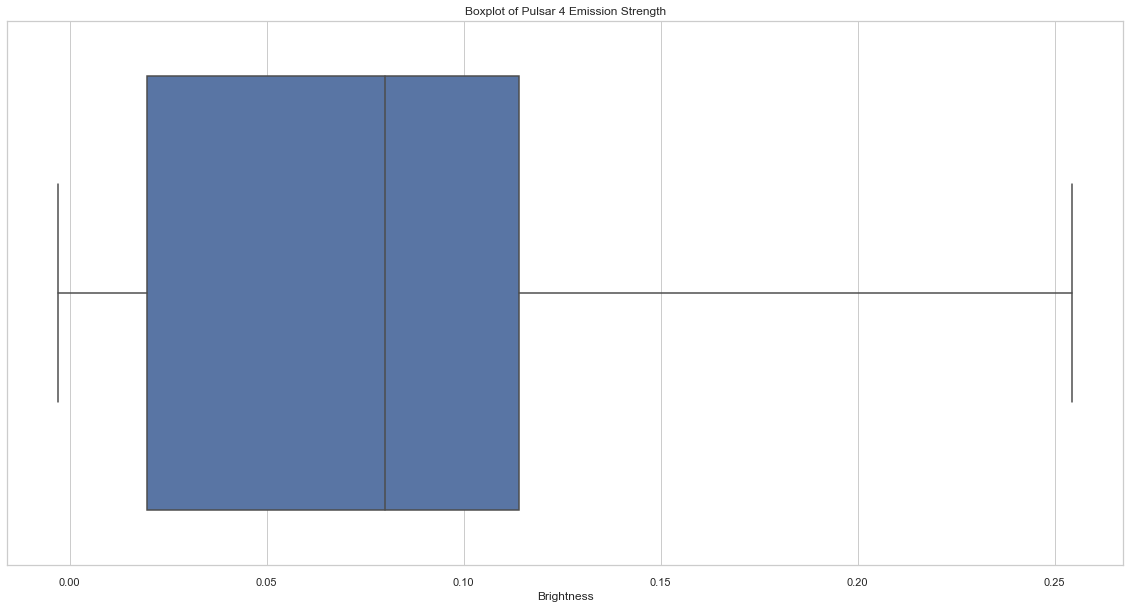

In [582]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held10ths["Brightness"]).set_title("Boxplot of Pulsar 4 Emission Strength")

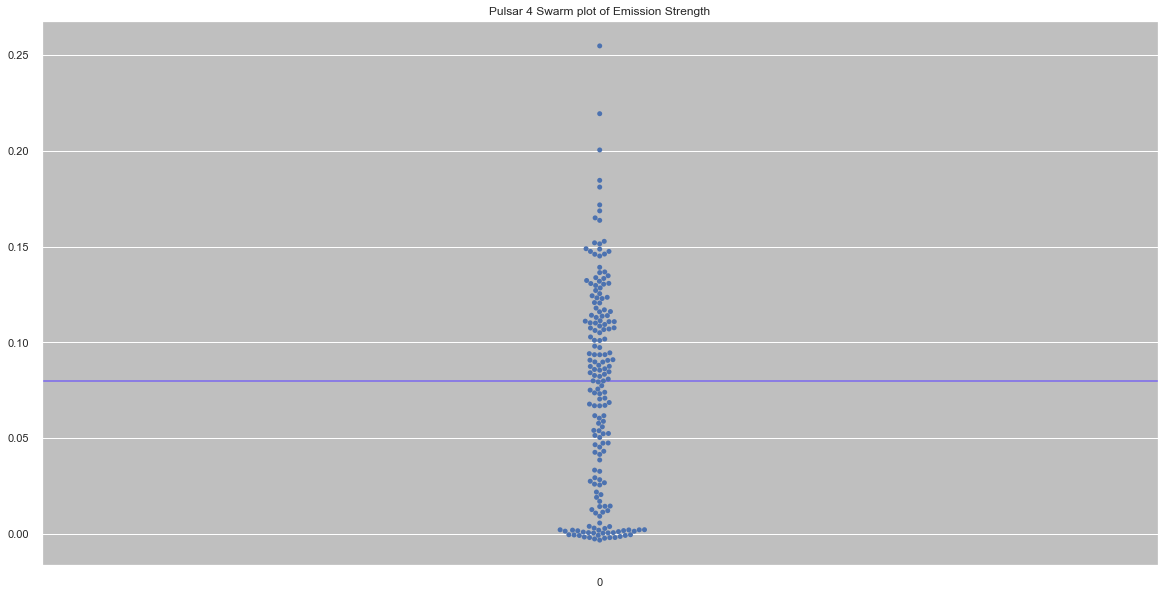

In [583]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=0.079977185, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held10ths["Brightness"], c="blue").set_title('Pulsar 4 Swarm plot of Emission Strength')

In [584]:
print(len(held5ths[(held5ths.Brightness > 0.07756883)]))
print(len(held5ths[(held5ths.Brightness < 0.07756883)]))

182
182


In [585]:
print(len(held10ths[(held10ths.Brightness > 0.079977185)]))
print(len(held10ths[(held10ths.Brightness < 0.079977185)]))

91
91


# Pulsar 4 Binary Export

In [586]:
np.savetxt(r'every5thbinarypulsar4.txt', held5ths.Binary, fmt='%d', delimiter='')
pulsar45thsbinary = held5ths.Binary.to_list()
np.savetxt(r'allpulsar4.txt', pulsar4.Binary, fmt='%d', delimiter='')
np.savetxt(r'every10thbinarypulsar4.txt', held10ths.Binary, fmt='%d', delimiter='')
pulsar410thsbinary = held10ths.Binary.to_list()

# Below we begin autocorrelation and autocovariance analysis pulsar 5

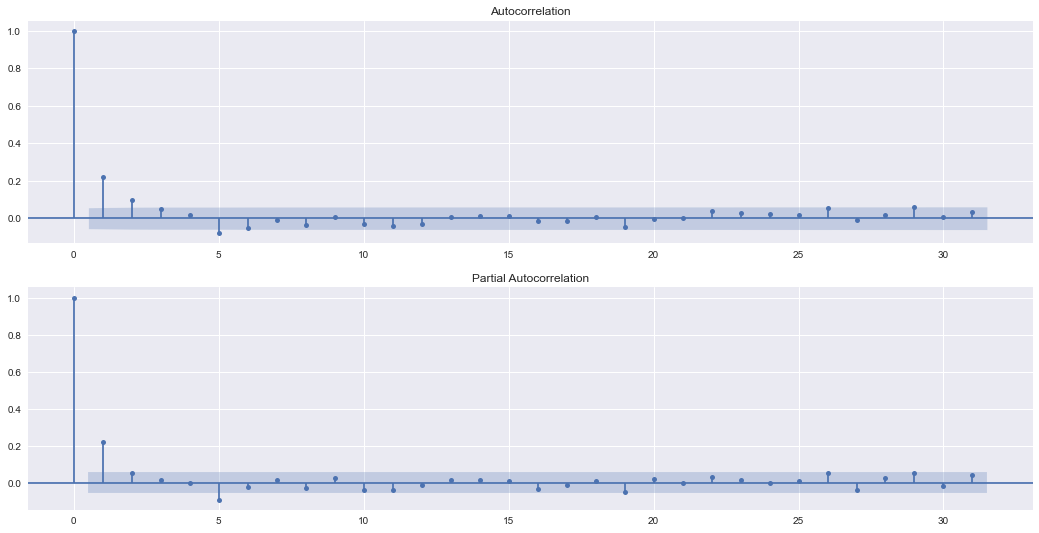

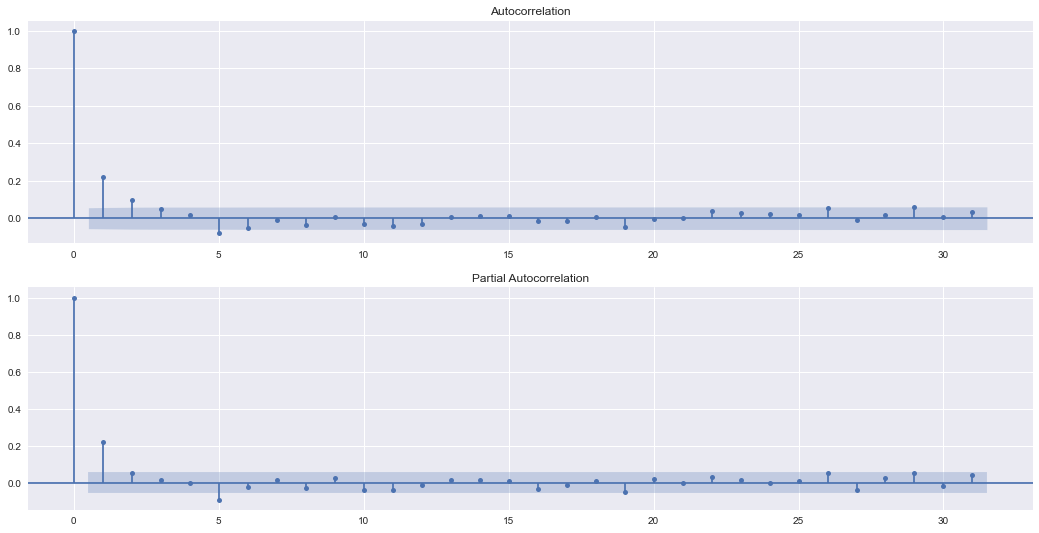

In [587]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar5['Brightness'], ax=ax[0])
plot_pacf(pulsar5['Brightness'], ax=ax[1], method="ols")

In [588]:
acf(pulsar5['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.22161581,  0.09940415,  0.04669096,  0.01876941,
       -0.07818365, -0.0539178 , -0.01220963, -0.03566829,  0.00520742,
       -0.03014362])

In [589]:
acfpulsar5 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar5[f"B_lag_{lag}"] = pulsar5['Brightness'].shift(lag)


acfpulsar5

B_lag_0   B_lag_1   B_lag_2   B_lag_3   B_lag_4   B_lag_5  \
0     5.390386e-02       NaN       NaN       NaN       NaN       NaN   
1     5.865279e-02  0.053904       NaN       NaN       NaN       NaN   
2     1.102083e-01  0.058653  0.053904       NaN       NaN       NaN   
3     3.471609e-02  0.110208  0.058653  0.053904       NaN       NaN   
4     5.610133e-02  0.034716  0.110208  0.058653  0.053904       NaN   
...            ...       ...       ...       ...       ...       ...   
1214  4.321559e-02  0.031916  0.030713  0.116777  0.144606  0.165039   
1215  1.830750e-02  0.043216  0.031916  0.030713  0.116777  0.144606   
1216  1.155671e-01  0.018308  0.043216  0.031916  0.030713  0.116777   
1217  1.562609e-02  0.115567  0.018308  0.043216  0.031916  0.030713   
1218 -1.137418e-08  0.015626  0.115567  0.018308  0.043216  0.031916   

       B_lag_6   B_lag_7   B_lag_8   B_lag_9  B_lag_10  
0          NaN       NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN       NaN  
...        ...       ...       ...       ...       ...  
1214  0.148642  0.071752  0.008108  0.038793  0.084002  
1215  0.165039  0.148642  0.071752  0.008108  0.038793  
1216  0.144606  0.165039  0.148642  0.071752  0.008108  
1217  0.116777  0.144606  0.165039  0.148642  0.071752  
1218  0.030713  0.116777  0.144606  0.165039  0.148642  

[1219 rows x 11 columns]

In [590]:
acfpulsar5.corr()["B_lag_0"].values

array([ 1.        ,  0.22179701,  0.09954441,  0.04675654,  0.01880625,
       -0.07839106, -0.05409556, -0.01226841, -0.03581717,  0.00521062,
       -0.03030331])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [591]:
held5ths = pulsar5[pulsar5.index % 5 == 0]
held5ths

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0                1    0.053904     0.005560       0                       NaN   
5                6    0.046168     0.005074       0                  0.061169   
10              11    0.009141     0.004581       0                  0.037888   
15              16    0.046869     0.004706       0                  0.053048   
20              21    0.120429     0.005141       1                  0.140218   
...            ...         ...          ...     ...                       ...   
1195          1196    0.049626     0.004631       0                  0.072716   
1200          1201    0.117575     0.005117       1                  0.055436   
1205          1206    0.038793     0.004621       0                  0.079521   
1210          1211    0.144606     0.005046       1                  0.107629   
1215          1216    0.018308     0.004578       0                  0.048186   

      RollingMeanEmissions10ths  RollingMedianEmissions5ths  \
0                           NaN                         NaN   
5                           NaN                    0.056101   
10                     0.049528                    0.039370   
15                     0.045468                    0.039953   
20                     0.096633                    0.090261   
...                         ...                         ...   
1195                   0.079188                    0.049626   
1200                   0.064076                    0.050588   
1205                   0.067478                    0.038793   
1210                   0.093575                    0.144606   
1215                   0.077908                    0.031916   

      RollingMedianEmissions10ths  
0                             NaN  
5                             NaN  
10                       0.050908  
15                       0.039662  
20                       0.070490  
...                           ...  
1195                     0.056310  
1200                     0.050107  
1205                     0.044691  
1210                     0.077877  
1215                     0.057484  

[244 rows x 8 columns]

In [592]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.08254402

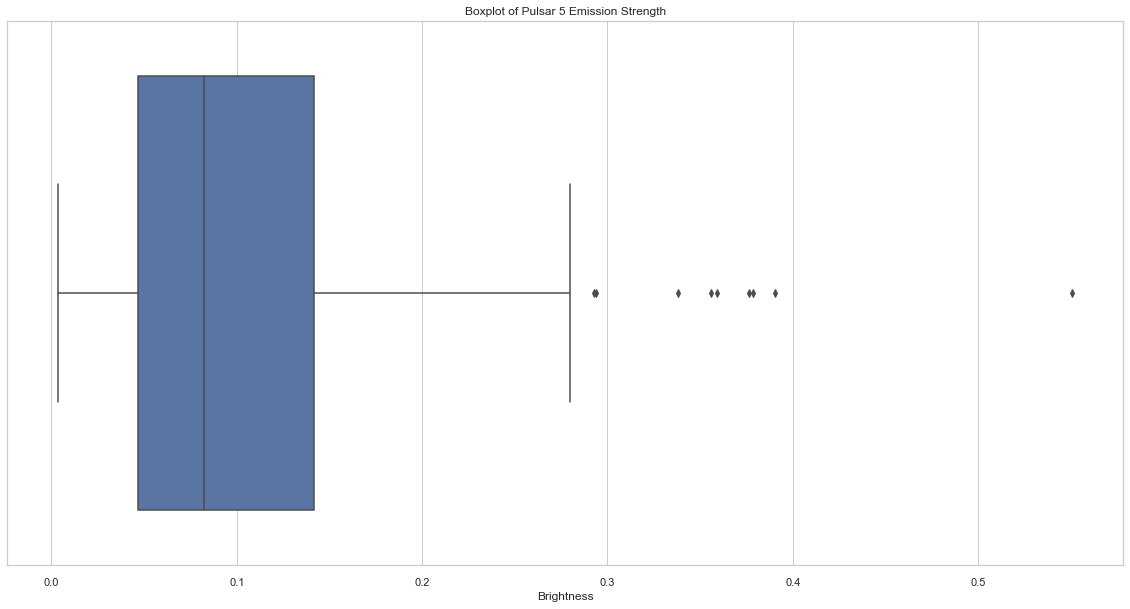

In [593]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 5 Emission Strength")

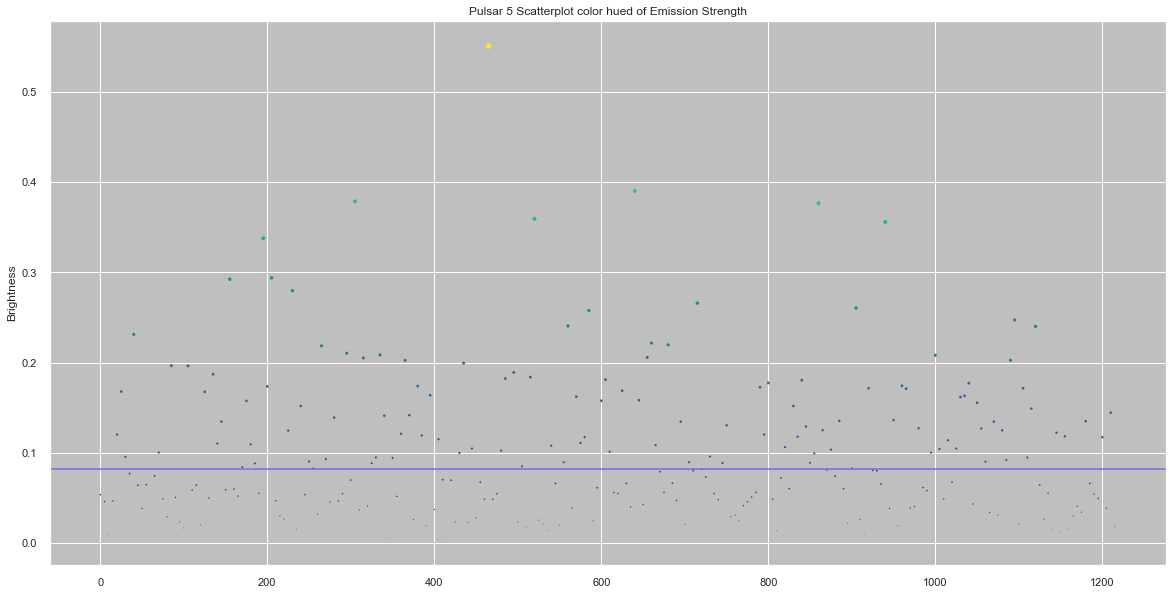

In [594]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 5 Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.08254402, ls='-',c='mediumslateblue')

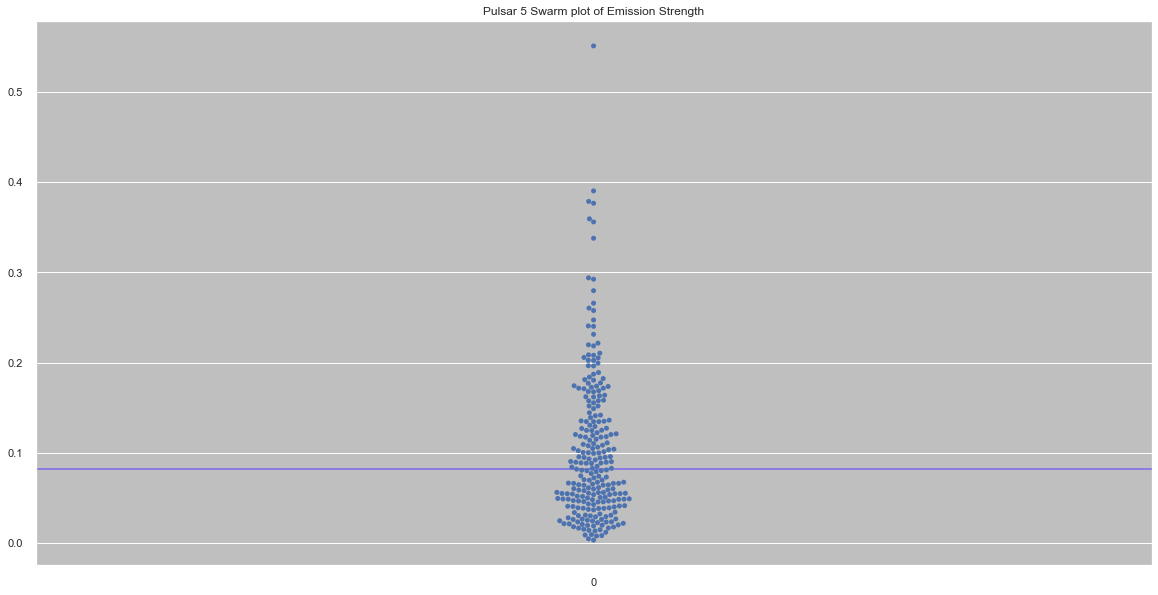

In [595]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=0.08254402, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 5 Swarm plot of Emission Strength')

In [596]:
print(len(held5ths[(held5ths.Brightness > 0.08254402)]))
print(len(held5ths[(held5ths.Brightness < 0.08254402)]))

122
122


# pulsar 5 export

In [597]:
np.savetxt(r'every5thbinarypulsar5.txt', held5ths.Binary, fmt='%d', delimiter='')
pulsar55thsbinary = held5ths.Binary.to_list()
np.savetxt(r'allpulsar5.txt', pulsar5.Binary, fmt='%d', delimiter='')

# Below we begin autocorrelation and autocovariance analysis pulsar 6

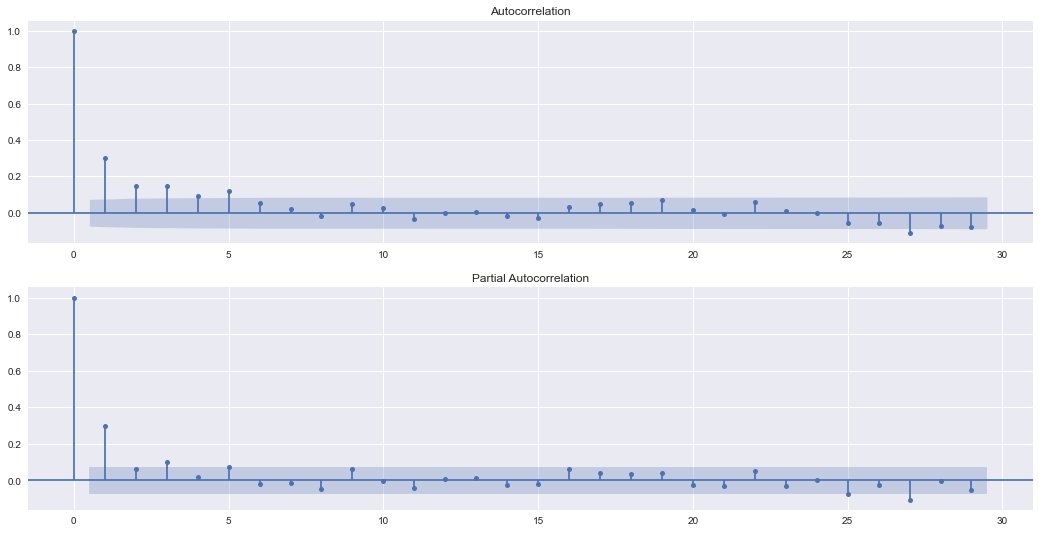

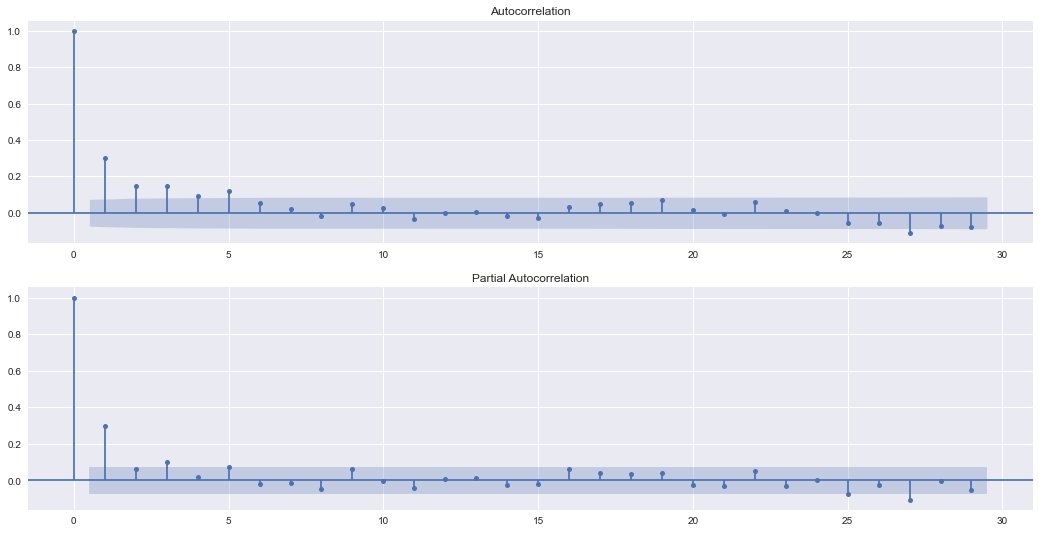

In [598]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar6['Brightness'], ax=ax[0])
plot_pacf(pulsar6['Brightness'], ax=ax[1], method="ols")

In [599]:
acf(pulsar6['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.29929122,  0.14656878,  0.14948301,  0.09384681,
        0.11707783,  0.05493324,  0.02160374, -0.01711482,  0.04777   ,
        0.02563995])

In [600]:
acfpulsar6 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar6[f"B_lag_{lag}"] = pulsar6['Brightness'].shift(lag)


acfpulsar6

B_lag_0   B_lag_1   B_lag_2   B_lag_3   B_lag_4   B_lag_5   B_lag_6  \
0    0.634671       NaN       NaN       NaN       NaN       NaN       NaN   
1    0.736945  0.634671       NaN       NaN       NaN       NaN       NaN   
2    0.693834  0.736945  0.634671       NaN       NaN       NaN       NaN   
3    1.021866  0.693834  0.736945  0.634671       NaN       NaN       NaN   
4    0.673845  1.021866  0.693834  0.736945  0.634671       NaN       NaN   
..        ...       ...       ...       ...       ...       ...       ...   
693  0.776083  0.623757  0.581248  0.555266  0.152886  0.286132  0.413354   
694  0.625382  0.776083  0.623757  0.581248  0.555266  0.152886  0.286132   
695  0.647559  0.625382  0.776083  0.623757  0.581248  0.555266  0.152886   
696  0.312449  0.647559  0.625382  0.776083  0.623757  0.581248  0.555266   
697  0.548353  0.312449  0.647559  0.625382  0.776083  0.623757  0.581248   

      B_lag_7   B_lag_8   B_lag_9  B_lag_10  
0         NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN  
2         NaN       NaN       NaN       NaN  
3         NaN       NaN       NaN       NaN  
4         NaN       NaN       NaN       NaN  
..        ...       ...       ...       ...  
693  0.460095  0.541486  0.346502  0.239302  
694  0.413354  0.460095  0.541486  0.346502  
695  0.286132  0.413354  0.460095  0.541486  
696  0.152886  0.286132  0.413354  0.460095  
697  0.555266  0.152886  0.286132  0.413354  

[698 rows x 11 columns]

In [601]:
acfpulsar6.corr()["B_lag_0"].values

array([ 1.        ,  0.29938402,  0.14710414,  0.15003691,  0.09455452,
        0.11800036,  0.05537751,  0.02179885, -0.01724535,  0.04863954,
        0.02621294])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [602]:
held5ths = pulsar6[pulsar6.index % 5 == 0]
held5ths

Pulse Number  Brightness  Uncertainty  Binary  RollingMeanEmissions5ths  \
0               1    0.634671     0.002761       0                       NaN   
5               6    0.676883     0.004763       1                  0.760675   
10             11    0.545564     0.003835       0                  0.552960   
15             16    0.399571     0.004712       0                  0.537775   
20             21    0.707715     0.006011       1                  0.665593   
..            ...         ...          ...     ...                       ...   
675           676    0.618826     0.002507       0                  0.634092   
680           681    0.246916     0.004276       0                  0.363455   
685           686    0.541486     0.003149       0                  0.444185   
690           691    0.555266     0.003657       0                  0.373547   
695           696    0.647559     0.003765       0                  0.650806   

     RollingMeanEmissions10ths  RollingMedianEmissions5ths  \
0                          NaN                         NaN   
5                          NaN                    0.693834   
10                    0.656817                    0.545564   
15                    0.545367                    0.494655   
20                    0.601684                    0.723437   
..                         ...                         ...   
675                   0.648694                    0.630414   
680                   0.498773                    0.316197   
685                   0.403820                    0.505084   
690                   0.408866                    0.413354   
695                   0.512176                    0.625382   

     RollingMedianEmissions10ths  
0                            NaN  
5                            NaN  
10                      0.673631  
15                      0.520201  
20                      0.610538  
..                           ...  
675                     0.650434  
680                     0.572860  
685                     0.344559  
690                     0.436725  
695                     0.568257  

[140 rows x 8 columns]

In [603]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.6508051

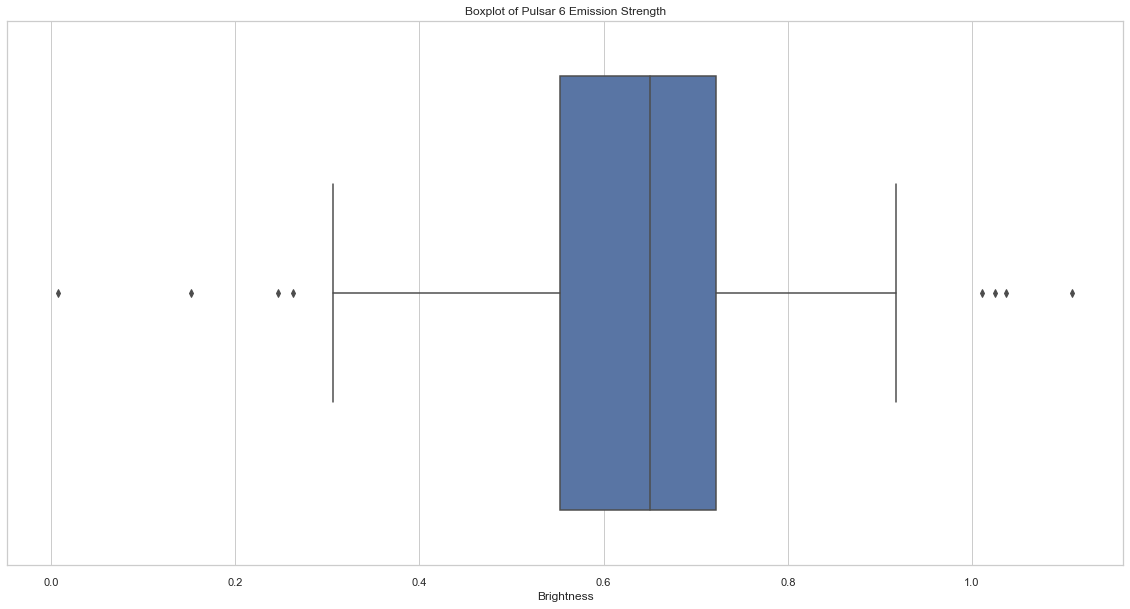

In [604]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

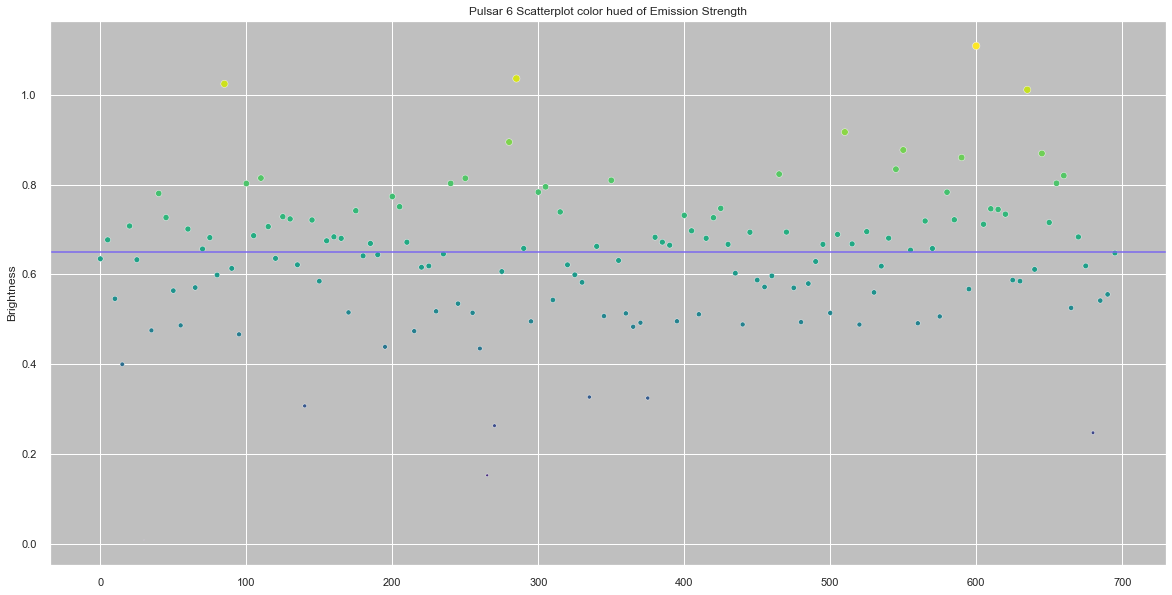

In [605]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')

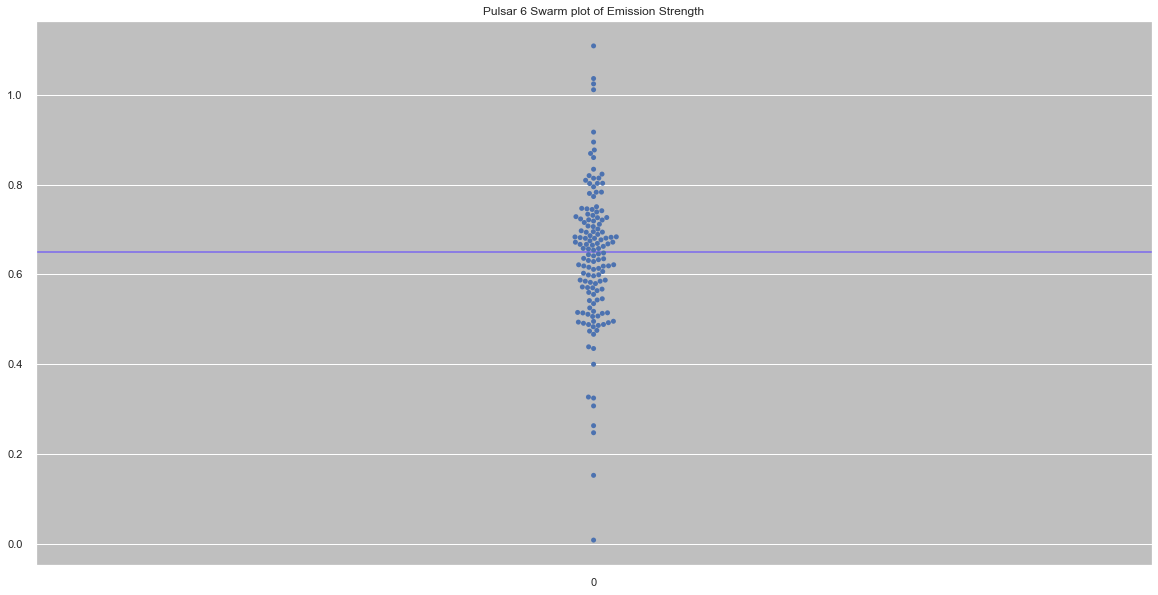

In [606]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [607]:
print(len(held5ths[(held5ths.Brightness > 0.6508051)]))
print(len(held5ths[(held5ths.Brightness < 0.6508051)]))

70
70


# Export pulsar 6

In [608]:
np.savetxt(r'every5thbinarypulsar6.txt', held5ths.Binary, fmt='%d', delimiter='')
pulsar65thsbinary = held5ths.Binary.to_list()
np.savetxt(r'allpulsar6.txt', pulsar6.Binary, fmt='%d', delimiter='')

# Randomness testing results

## using RandTest Library

In [609]:
import randtest

pulsar1binary = pulsar.Binary.to_list()
pulsar2binary = pulsar2.Binary.to_list()
pulsar3binary = pulsar3.Binary.to_list()
pulsar4binary = pulsar4.Binary.to_list()
pulsar5binary = pulsar5.Binary.to_list()
pulsar6binary = pulsar6.Binary.to_list()

randtest1 = randtest.random_score(pulsar1binary)
randtest2 = randtest.random_score(pulsar2binary)
randtest3 = randtest.random_score(pulsar3binary)
randtest4 = randtest.random_score(pulsar4binary)
randtest5 = randtest.random_score(pulsar5binary)
randtest6 = randtest.random_score(pulsar6binary)

randtest15ths = randtest.random_score(pulsar15thsbinary)
randtest25ths = randtest.random_score(pulsar25thsbinary)
randtest35ths = randtest.random_score(pulsar35thsbinary)
randtest45ths = randtest.random_score(pulsar45thsbinary)
randtest55ths = randtest.random_score(pulsar55thsbinary)
randtest65ths = randtest.random_score(pulsar65thsbinary)

randtest410ths = randtest.random_score(pulsar410thsbinary)

print("All pulsar 1 RandTest Evaluation:", randtest1)
#print(randtest2)
#print(randtest3)
#print(randtest4)
#print(randtest5)
#print(randtest6)
print("every 5th pulsar 1 RandTest Evaluation:", randtest15ths)
#print(randtest25ths)
#print(randtest35ths)
#print(randtest45ths)
#print(randtest410ths)
#print(randtest55ths)
#print(randtest65ths)

randtestAll = [randtest1, randtest2, randtest3, randtest4, randtest5, randtest6]
randtest5ths = [randtest15ths, randtest25ths, randtest35ths, randtest45ths, randtest55ths, randtest65ths]
randtestElse = ["Null", "Null", "Null", randtest410ths, "Null", "Null"]

print(randtestAll)
print(randtest5ths)
print(randtestElse)

randTestAll = pd.Series(randtestAll)
randTest5ths = pd.Series(randtest5ths)
randTestElse = pd.Series(randtestElse)

All pulsar 1 RandTest Evaluation: True
every 5th pulsar 1 RandTest Evaluation: True
[True, True, True, True, True, True]
[True, True, True, True, True, True]
['Null', 'Null', 'Null', True, 'Null', 'Null']


In [610]:
frame = {'RandTestAll' : randTestAll, 'RandTest5ths' : randTest5ths, 'RandTestElse' : randTestElse}
RandtestResults = pd.DataFrame(frame)
RandtestResults.to_csv('RandTestResults.csv', index=False)

## importing all results from NIST for evaluation

In [611]:
pulsar1_all = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR1_Tested_All.csv")
pulsar1_5th = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR1_Tested_5ths.csv")
pulsar2_all = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR2_Tested_All.csv")
pulsar2_5th = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR2_Tested_5ths.csv")
pulsar3_all = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR3_Tested_All.csv")
pulsar3_5th = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR3_Tested_5ths.csv")
pulsar4_all = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR4_Tested_All.csv")
pulsar4_5th = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR4_Tested_5ths.csv")
pulsar5_all = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR5_Tested_All.csv")
pulsar5_5th = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR5_Tested_5ths.csv")
pulsar4_10th = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR4_Tested_10ths.csv")
pulsar6_all = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR6_Tested_All.csv")
pulsar6_5th = pd.read_csv("pulsaryBinaryDataResultsCSV/PULSAR6_Tested_5ths.csv")


In [612]:
pulsar1_all

Test Name       P-Value     Outcome
0                     Frequency Test (Monobit)  1.000000e+00    Absolute
1                Frequency Test within a Block  9.050000e-08  Non-Random
2                                     Run Test  3.353164e-03  Non-Random
3               Longest Run of Ones in a Block  4.782901e-02      Random
4                      Binary Matrix Rank Test  1.020085e-01      Random
5   Discrete Fourier Transform (Spectral) Test  5.765222e-01      Random
6       Non-Overlapping Template Matching Test  4.860000e-07  Non-Random
7           Overlapping Template Matching Test  5.365440e-04  Non-Random
8          Maurer's Universal Statistical Test -1.000000e+00       Error
9                       Linear Complexity Test  8.177284e-01      Random
10                               Serial Test A  2.420000e-19  Non-Random
11                               Serial Test B  1.600000e-06  Non-Random
12                    Approximate Entropy Test  1.840000e-13  Non-Random
13              Cumulative Sums (Forward) Test  6.250000e-01      Random
14              Cumulative Sums (Reverse) Test  6.250000e-01      Random
15             Random Excursions Test State -4  1.210000e-01      Random
16             Random Excursions Test State -3  3.158609e-01      Random
17             Random Excursions Test State -2  3.590000e-01      Random
18             Random Excursions Test State -1  7.280000e-01      Random
19             Random Excursions Test State +1  2.730000e-01      Random
20             Random Excursions Test State +2  1.640000e-01      Random
21             Random Excursions Test State +3  3.070000e-01      Random
22             Random Excursions Test State +4  1.160000e-01      Random
23      Random Exursions Variant Test State -9  1.503674e-01      Random
24      Random Exursions Variant Test State -8  2.508288e-01      Random
25      Random Exursions Variant Test State -7  2.850494e-01      Random
26      Random Exursions Variant Test State -6  2.685964e-01      Random
27      Random Exursions Variant Test State -5  4.008621e-01      Random
28      Random Exursions Variant Test State -4  7.261831e-01      Random
29      Random Exursions Variant Test State -3  9.471395e-01      Random
30      Random Exursions Variant Test State -2  7.808785e-01      Random
31      Random Exursions Variant Test State -1  9.114677e-01      Random
32      Random Exursions Variant Test State +1  7.110000e-01      Random
33      Random Exursions Variant Test State +2  7.320000e-01      Random
34      Random Exursions Variant Test State +3  6.430000e-01      Random
35      Random Exursions Variant Test State +4  5.100000e-01      Random
36      Random Exursions Variant Test State +5  8.140000e-01      Random
37      Random Exursions Variant Test State +6  9.820000e-01      Random
38      Random Exursions Variant Test State +7  9.340000e-01      Random
39      Random Exursions Variant Test State +8  6.670000e-01      Random
40      Random Exursions Variant Test State +9  7.260000e-01      Random

In [613]:
pulsar1_5th

Test Name   P-Value     Outcome
0                     Frequency Test (Monobit)  0.096872      Random
1                Frequency Test within a Block  0.273011      Random
2                                     Run Test  0.295998      Random
3               Longest Run of Ones in a Block  0.143727      Random
4                      Binary Matrix Rank Test  0.858290      Random
5   Discrete Fourier Transform (Spectral) Test  0.453695      Random
6       Non-Overlapping Template Matching Test  0.424735      Random
7           Overlapping Template Matching Test  0.418207      Random
8          Maurer's Universal Statistical Test -1.000000       Error
9                       Linear Complexity Test  0.757153      Random
10                               Serial Test A  0.148533      Random
11                               Serial Test B  0.445237      Random
12                    Approximate Entropy Test  0.000145  Non-Random
13              Cumulative Sums (Forward) Test  0.072222      Random
14              Cumulative Sums (Reverse) Test  0.193743      Random
15             Random Excursions Test State -4  0.997903      Random
16             Random Excursions Test State -3  0.995330      Random
17             Random Excursions Test State -2  0.984748      Random
18             Random Excursions Test State -1  0.849145      Random
19             Random Excursions Test State +1  0.156236      Random
20             Random Excursions Test State +2  0.000354  Non-Random
21             Random Excursions Test State +3  0.000475  Non-Random
22             Random Excursions Test State +4  0.369569      Random
23      Random Exursions Variant Test State +1  0.317311      Random
24      Random Exursions Variant Test State +2  0.386476      Random
25      Random Exursions Variant Test State +3  0.013906      Random
26      Random Exursions Variant Test State +4  0.000670  Non-Random
27      Random Exursions Variant Test State +5  0.007661  Non-Random
28      Random Exursions Variant Test State +6  0.000526  Non-Random
29      Random Exursions Variant Test State +7  0.002282  Non-Random
30      Random Exursions Variant Test State +8  0.038867      Random
31      Random Exursions Variant Test State +9  0.015293      Random

In [614]:
pulsar2_all

Test Name       P-Value     Outcome
0                     Frequency Test (Monobit)  9.933346e-01      Random
1                Frequency Test within a Block  9.910000e-12  Non-Random
2                                     Run Test  3.200000e-94  Non-Random
3               Longest Run of Ones in a Block  3.810000e-36  Non-Random
4                      Binary Matrix Rank Test  2.570000e-01      Random
5   Discrete Fourier Transform (Spectral) Test  6.140000e-05  Non-Random
6       Non-Overlapping Template Matching Test  3.830000e-26  Non-Random
7           Overlapping Template Matching Test  4.630000e-13  Non-Random
8          Maurer's Universal Statistical Test -1.000000e+00       Error
9                       Linear Complexity Test  5.807496e-01      Random
10                               Serial Test A  2.350000e-17  Non-Random
11                               Serial Test B  9.520000e-01      Random
12                    Approximate Entropy Test  8.310000e-34  Non-Random
13              Cumulative Sums (Forward) Test  5.600000e-01      Random
14              Cumulative Sums (Reverse) Test  5.530000e-01      Random
15             Random Excursions Test State -4  2.050000e-01      Random
16             Random Excursions Test State -3  7.680000e-03  Non-Random
17             Random Excursions Test State -2  1.610000e-03  Non-Random
18             Random Excursions Test State -1  1.780000e-02      Random
19             Random Excursions Test State +1  3.980000e-01      Random
20             Random Excursions Test State +2  4.020000e-01      Random
21             Random Excursions Test State +3  1.520000e-01      Random
22             Random Excursions Test State +4  4.760000e-01      Random
23      Random Exursions Variant Test State -9  8.054226e-01      Random
24      Random Exursions Variant Test State -8  8.514120e-01      Random
25      Random Exursions Variant Test State -7  9.198637e-01      Random
26      Random Exursions Variant Test State -6  9.651054e-01      Random
27      Random Exursions Variant Test State -5  9.037602e-01      Random
28      Random Exursions Variant Test State -4  6.808479e-01      Random
29      Random Exursions Variant Test State -3  5.164123e-01      Random
30      Random Exursions Variant Test State -2  3.147768e-01      Random
31      Random Exursions Variant Test State -1  1.467931e-01      Random
32      Random Exursions Variant Test State +1  3.100000e-01      Random
33      Random Exursions Variant Test State +2  7.060000e-01      Random
34      Random Exursions Variant Test State +3  8.460000e-01      Random
35      Random Exursions Variant Test State +4  9.560000e-01      Random
36      Random Exursions Variant Test State +5  7.170000e-01      Random
37      Random Exursions Variant Test State +6  8.100000e-01      Random
38      Random Exursions Variant Test State +7  9.680000e-01      Random
39      Random Exursions Variant Test State +8  9.550000e-01      Random
40      Random Exursions Variant Test State +9  8.880000e-01      Random

In [615]:
pulsar2_5th

Test Name   P-Value     Outcome
0                     Frequency Test (Monobit)  0.736699      Random
1                Frequency Test within a Block  0.753000      Random
2                                     Run Test  0.018694      Random
3               Longest Run of Ones in a Block  0.092363      Random
4                      Binary Matrix Rank Test  0.481248      Random
5   Discrete Fourier Transform (Spectral) Test  0.565809      Random
6       Non-Overlapping Template Matching Test  0.526000      Random
7           Overlapping Template Matching Test  0.248594      Random
8          Maurer's Universal Statistical Test -1.000000       Error
9                       Linear Complexity Test  0.543779      Random
10                               Serial Test A  0.123000      Random
11                               Serial Test B  0.224000      Random
12                    Approximate Entropy Test  0.000025  Non-Random
13              Cumulative Sums (Forward) Test  0.604000      Random
14              Cumulative Sums (Reverse) Test  0.904000      Random
15             Random Excursions Test State -4  0.332000      Random
16             Random Excursions Test State -3  0.161000      Random
17             Random Excursions Test State -2  0.625000      Random
18             Random Excursions Test State -1  0.719000      Random
19             Random Excursions Test State +1  0.008430  Non-Random
20             Random Excursions Test State +2  0.000040  Non-Random
21             Random Excursions Test State +3  0.152000      Random
22             Random Excursions Test State +4  0.383000      Random
23      Random Exursions Variant Test State -5  0.226919      Random
24      Random Exursions Variant Test State -4  0.237548      Random
25      Random Exursions Variant Test State -3  0.263552      Random
26      Random Exursions Variant Test State -2  0.193931      Random
27      Random Exursions Variant Test State -1  0.133614      Random
28      Random Exursions Variant Test State +1  0.261000      Random
29      Random Exursions Variant Test State +2  0.516000      Random
30      Random Exursions Variant Test State +3  0.576000      Random
31      Random Exursions Variant Test State +4  0.450000      Random
32      Random Exursions Variant Test State +5  0.739000      Random
33      Random Exursions Variant Test State +6  0.792000      Random
34      Random Exursions Variant Test State +7  0.533000      Random
35      Random Exursions Variant Test State +8  0.561000      Random
36      Random Exursions Variant Test State +9  0.649000      Random

In [616]:
pulsar3_all

Test Name   P-Value Outcome
0                     Frequency Test (Monobit)  0.978133  Random
1                Frequency Test within a Block  0.843000  Random
2                                     Run Test  0.051600  Random
3               Longest Run of Ones in a Block  0.206000  Random
4                      Binary Matrix Rank Test  0.694000  Random
5   Discrete Fourier Transform (Spectral) Test  0.655000  Random
6       Non-Overlapping Template Matching Test  0.771000  Random
7           Overlapping Template Matching Test  0.887000  Random
8          Maurer's Universal Statistical Test -1.000000   Error
9                       Linear Complexity Test  0.320837  Random
10                               Serial Test A  0.876000  Random
11                               Serial Test B  0.553000  Random
12                    Approximate Entropy Test  0.767000  Random
13              Cumulative Sums (Forward) Test  0.943000  Random
14              Cumulative Sums (Reverse) Test  0.926000  Random
15             Random Excursions Test State -4  0.339000  Random
16             Random Excursions Test State -3  0.590000  Random
17             Random Excursions Test State -2  0.573000  Random
18             Random Excursions Test State -1  0.590000  Random
19             Random Excursions Test State +1  0.491000  Random
20             Random Excursions Test State +2  0.565000  Random
21             Random Excursions Test State +3  0.448000  Random
22             Random Excursions Test State +4  0.643000  Random
23      Random Exursions Variant Test State -9  0.215330  Random
24      Random Exursions Variant Test State -8  0.180652  Random
25      Random Exursions Variant Test State -7  0.150421  Random
26      Random Exursions Variant Test State -6  0.174968  Random
27      Random Exursions Variant Test State -5  0.232254  Random
28      Random Exursions Variant Test State -4  0.286278  Random
29      Random Exursions Variant Test State -3  0.322716  Random
30      Random Exursions Variant Test State -2  0.332797  Random
31      Random Exursions Variant Test State -1  0.541866  Random
32      Random Exursions Variant Test State +1  0.493000  Random
33      Random Exursions Variant Test State +2  0.509000  Random
34      Random Exursions Variant Test State +3  0.759000  Random
35      Random Exursions Variant Test State +4  0.863000  Random
36      Random Exursions Variant Test State +5  0.780000  Random
37      Random Exursions Variant Test State +6  0.629000  Random
38      Random Exursions Variant Test State +7  0.410000  Random
39      Random Exursions Variant Test State +8  0.288000  Random
40      Random Exursions Variant Test State +9  0.309000  Random

In [617]:
pulsar3_5th

Test Name   P-Value     Outcome
0                     Frequency Test (Monobit)  0.951201      Random
1                Frequency Test within a Block  0.925000      Random
2                                     Run Test  0.126000      Random
3               Longest Run of Ones in a Block  0.957000      Random
4                      Binary Matrix Rank Test -1.000000       Error
5   Discrete Fourier Transform (Spectral) Test  0.003660  Non-Random
6       Non-Overlapping Template Matching Test  1.000000      Random
7           Overlapping Template Matching Test -1.000000       Error
8          Maurer's Universal Statistical Test -1.000000       Error
9                       Linear Complexity Test -1.000000       Error
10                               Serial Test A  0.499000      Random
11                               Serial Test B  0.499000      Random
12                    Approximate Entropy Test  1.000000    Absolute
13              Cumulative Sums (Forward) Test  0.763000      Random
14              Cumulative Sums (Reverse) Test  0.705000      Random
15             Random Excursions Test State -4  0.886000      Random
16             Random Excursions Test State -3  0.347000      Random
17             Random Excursions Test State -2  0.735000      Random
18             Random Excursions Test State -1  0.700000      Random
19             Random Excursions Test State +1  0.659000      Random
20             Random Excursions Test State +2  0.258000      Random
21             Random Excursions Test State +3  0.018600      Random
22             Random Excursions Test State +4  0.783000      Random
23      Random Exursions Variant Test State -9  0.490920      Random
24      Random Exursions Variant Test State -8  0.463355      Random
25      Random Exursions Variant Test State -7  0.410205      Random
26      Random Exursions Variant Test State -6  0.413686      Random
27      Random Exursions Variant Test State -5  0.438578      Random
28      Random Exursions Variant Test State -4  0.406813      Random
29      Random Exursions Variant Test State -3  0.603332      Random
30      Random Exursions Variant Test State -2  0.765594      Random
31      Random Exursions Variant Test State -1  0.605577      Random
32      Random Exursions Variant Test State +1  0.699000      Random
33      Random Exursions Variant Test State +2  0.502000      Random
34      Random Exursions Variant Test State +3  0.326000      Random
35      Random Exursions Variant Test State +4  0.262000      Random
36      Random Exursions Variant Test State +5  0.263000      Random
37      Random Exursions Variant Test State +6  0.259000      Random
38                                         NaN       NaN         NaN
39                                         NaN       NaN         NaN
40                                         NaN       NaN         NaN

In [618]:
pulsar4_all

Test Name       P-Value     Outcome
0                     Frequency Test (Monobit)  9.812939e-01      Random
1                Frequency Test within a Block  3.910000e-53  Non-Random
2                                     Run Test  3.420000e-21  Non-Random
3               Longest Run of Ones in a Block  3.930000e-08  Non-Random
4                      Binary Matrix Rank Test  6.940000e-01      Random
5   Discrete Fourier Transform (Spectral) Test  1.820000e-02      Random
6       Non-Overlapping Template Matching Test  7.120000e-02      Random
7           Overlapping Template Matching Test  2.960000e-01      Random
8          Maurer's Universal Statistical Test -1.000000e+00       Error
9                       Linear Complexity Test  4.620000e-01      Random
10                               Serial Test A  0.000000e+00  Non-Random
11                               Serial Test B  0.000000e+00  Non-Random
12                    Approximate Entropy Test  2.100000e-12  Non-Random
13              Cumulative Sums (Forward) Test  1.040000e-09  Non-Random
14              Cumulative Sums (Reverse) Test  8.930000e-10  Non-Random
15             Random Excursions Test State -4  9.730000e-01      Random
16             Random Excursions Test State -3  9.450000e-01      Random
17             Random Excursions Test State -2  8.490000e-01      Random
18             Random Excursions Test State -1  3.060000e-01      Random
19             Random Excursions Test State +1  9.310000e-01      Random
20             Random Excursions Test State +2  5.080000e-01      Random
21             Random Excursions Test State +3  1.770000e-01      Random
22             Random Excursions Test State +4  1.180000e-02      Random
23      Random Exursions Variant Test State -1  5.637029e-01      Random
24      Random Exursions Variant Test State +1  3.860000e-01      Random
25      Random Exursions Variant Test State +2  6.170000e-01      Random
26      Random Exursions Variant Test State +3  6.990000e-01      Random
27      Random Exursions Variant Test State +4  8.270000e-01      Random
28      Random Exursions Variant Test State +5  8.470000e-01      Random
29      Random Exursions Variant Test State +6  7.280000e-01      Random
30      Random Exursions Variant Test State +7  8.100000e-01      Random
31      Random Exursions Variant Test State +8  8.810000e-01      Random
32      Random Exursions Variant Test State +9  8.340000e-01      Random

In [619]:
pulsar4_5th

Test Name       P-Value     Outcome
0                     Frequency Test (Monobit)  8.339354e-01      Random
1                Frequency Test within a Block  3.340000e-03  Non-Random
2                                     Run Test  3.350000e-03  Non-Random
3               Longest Run of Ones in a Block  4.350000e-01      Random
4                      Binary Matrix Rank Test -1.000000e+00       Error
5   Discrete Fourier Transform (Spectral) Test  3.120000e-01      Random
6       Non-Overlapping Template Matching Test  1.000000e+00    Absolute
7           Overlapping Template Matching Test -1.000000e+00       Error
8          Maurer's Universal Statistical Test -1.000000e+00       Error
9                       Linear Complexity Test -1.000000e+00       Error
10                               Serial Test A  0.000000e+00  Non-Random
11                               Serial Test B  0.000000e+00  Non-Random
12                    Approximate Entropy Test  1.000000e+00    Absolute
13              Cumulative Sums (Forward) Test  3.970000e-03  Non-Random
14              Cumulative Sums (Reverse) Test  7.880000e-03  Non-Random
15             Random Excursions Test State -4  9.980000e-01      Random
16             Random Excursions Test State -3  9.950000e-01      Random
17             Random Excursions Test State -2  9.850000e-01      Random
18             Random Excursions Test State -1  8.490000e-01      Random
19             Random Excursions Test State +1  6.840000e-03  Non-Random
20             Random Excursions Test State +2  2.980000e-04  Non-Random
21             Random Excursions Test State +3  3.550000e-04  Non-Random
22             Random Excursions Test State +4  1.220000e-04  Non-Random
23      Random Exursions Variant Test State +1  1.240000e-02      Random
24      Random Exursions Variant Test State +2  1.490000e-05  Non-Random
25      Random Exursions Variant Test State +3  2.700000e-07  Non-Random
26      Random Exursions Variant Test State +4  1.570000e-04  Non-Random
27      Random Exursions Variant Test State +5  6.680000e-02      Random
28      Random Exursions Variant Test State +6  1.320000e-01      Random
29      Random Exursions Variant Test State +7  3.750000e-02      Random
30      Random Exursions Variant Test State +8  5.280000e-02      Random
31      Random Exursions Variant Test State +9  2.750000e-01      Random

In [620]:
pulsar5_all

Test Name   P-Value     Outcome
0                     Frequency Test (Monobit)  0.977150      Random
1                Frequency Test within a Block  0.039800      Random
2                                     Run Test  0.000020  Non-Random
3               Longest Run of Ones in a Block  0.085500      Random
4                      Binary Matrix Rank Test  0.694000      Random
5   Discrete Fourier Transform (Spectral) Test  0.064800      Random
6       Non-Overlapping Template Matching Test  0.032300      Random
7           Overlapping Template Matching Test  0.296000      Random
8          Maurer's Universal Statistical Test -1.000000       Error
9                       Linear Complexity Test  0.029600      Random
10                               Serial Test A  0.853000      Random
11                               Serial Test B  0.963000      Random
12                    Approximate Entropy Test  0.956000      Random
13              Cumulative Sums (Forward) Test  0.761000      Random
14              Cumulative Sums (Reverse) Test  0.761000      Random
15             Random Excursions Test State -4  0.000254  Non-Random
16             Random Excursions Test State -3  0.019100      Random
17             Random Excursions Test State -2  0.162000      Random
18             Random Excursions Test State -1  0.067300      Random
19             Random Excursions Test State +1  0.941000      Random
20             Random Excursions Test State +2  0.951000      Random
21             Random Excursions Test State +3  0.155000      Random
22             Random Excursions Test State +4  0.027100      Random
23      Random Exursions Variant Test State -9  0.867859      Random
24      Random Exursions Variant Test State -8  0.790482      Random
25      Random Exursions Variant Test State -7  0.668588      Random
26      Random Exursions Variant Test State -6  0.569494      Random
27      Random Exursions Variant Test State -5  0.331137      Random
28      Random Exursions Variant Test State -4  0.194835      Random
29      Random Exursions Variant Test State -3  0.145052      Random
30      Random Exursions Variant Test State -2  0.092327      Random
31      Random Exursions Variant Test State -1  0.229949      Random
32      Random Exursions Variant Test State +1  0.170000      Random
33      Random Exursions Variant Test State +2  0.166000      Random
34      Random Exursions Variant Test State +3  0.645000      Random
35      Random Exursions Variant Test State +4  1.000000    Absolute
36      Random Exursions Variant Test State +5  0.775000      Random
37      Random Exursions Variant Test State +6  0.642000      Random
38      Random Exursions Variant Test State +7  0.812000      Random
39      Random Exursions Variant Test State +8  0.965000      Random
40      Random Exursions Variant Test State +9  0.835000      Random

In [621]:
pulsar5_5th

Test Name   P-Value   Outcome
0                     Frequency Test (Monobit)  0.898120    Random
1                Frequency Test within a Block  0.860000    Random
2                                     Run Test  0.095800    Random
3               Longest Run of Ones in a Block  0.693000    Random
4                      Binary Matrix Rank Test -1.000000     Error
5   Discrete Fourier Transform (Spectral) Test  0.217000    Random
6       Non-Overlapping Template Matching Test  1.000000  Absolute
7           Overlapping Template Matching Test -1.000000     Error
8          Maurer's Universal Statistical Test -1.000000     Error
9                       Linear Complexity Test -1.000000     Error
10                               Serial Test A  0.853000    Random
11                               Serial Test B  0.932000    Random
12                    Approximate Entropy Test  1.000000  Absolute
13              Cumulative Sums (Forward) Test  0.894000    Random
14              Cumulative Sums (Reverse) Test  0.786000    Random
15             Random Excursions Test State -4  0.728000    Random
16             Random Excursions Test State -3  0.900000    Random
17             Random Excursions Test State -2  0.755000    Random
18             Random Excursions Test State -1  0.968000    Random
19             Random Excursions Test State +1  0.383000    Random
20             Random Excursions Test State +2  0.542000    Random
21             Random Excursions Test State +3  0.568000    Random
22             Random Excursions Test State +4  0.796000    Random
23      Random Exursions Variant Test State -9  0.638822    Random
24      Random Exursions Variant Test State -8  8.415830    Random
25      Random Exursions Variant Test State -7  0.382103    Random
26      Random Exursions Variant Test State -6  0.500924    Random
27      Random Exursions Variant Test State -5  0.630192    Random
28      Random Exursions Variant Test State -4  0.655119    Random
29      Random Exursions Variant Test State -3  0.597154    Random
30      Random Exursions Variant Test State -2  0.820090    Random
31      Random Exursions Variant Test State -1  0.599426    Random
32      Random Exursions Variant Test State +1  0.237000    Random
33      Random Exursions Variant Test State +2  0.225000    Random
34      Random Exursions Variant Test State +3  0.159000    Random
35      Random Exursions Variant Test State +4  0.234000    Random
36      Random Exursions Variant Test State +5  0.294000    Random
37      Random Exursions Variant Test State +6  0.285000    Random
38      Random Exursions Variant Test State +7  0.382000    Random
39      Random Exursions Variant Test State +8  0.416000    Random
40      Random Exursions Variant Test State +9  0.390000    Random

In [622]:
pulsar4_10th

Test Name   P-Value     Outcome
0                     Frequency Test (Monobit)  0.656501      Random
1                Frequency Test within a Block  0.021600      Random
2                                     Run Test  0.001920  Non-Random
3               Longest Run of Ones in a Block  0.326000      Random
4                      Binary Matrix Rank Test -1.000000       Error
5   Discrete Fourier Transform (Spectral) Test  0.760000      Random
6       Non-Overlapping Template Matching Test  1.000000    Absolute
7           Overlapping Template Matching Test -1.000000       Error
8          Maurer's Universal Statistical Test -1.000000       Error
9                       Linear Complexity Test -1.000000       Error
10                               Serial Test A  0.000000  Non-Random
11                               Serial Test B  0.000000  Non-Random
12                    Approximate Entropy Test  1.000000    Absolute
13              Cumulative Sums (Forward) Test  0.023500      Random
14              Cumulative Sums (Reverse) Test  0.075900      Random
15             Random Excursions Test State -4  0.905000      Random
16             Random Excursions Test State -3  0.324000      Random
17             Random Excursions Test State -2  0.768000      Random
18             Random Excursions Test State -1  0.394000      Random
19             Random Excursions Test State +1  0.836000      Random
20             Random Excursions Test State +2  0.481000      Random
21             Random Excursions Test State +3  0.331000      Random
22             Random Excursions Test State +4  0.067000      Random
23      Random Exursions Variant Test State -3  0.504501      Random
24      Random Exursions Variant Test State -2  0.711923      Random
25      Random Exursions Variant Test State -1  0.831170      Random
26      Random Exursions Variant Test State +1  1.000000    Absolute
27      Random Exursions Variant Test State +2  0.902000      Random
28      Random Exursions Variant Test State +3  0.924000      Random
29      Random Exursions Variant Test State +4  0.872000      Random
30      Random Exursions Variant Test State +5  0.570000      Random
31      Random Exursions Variant Test State +6  0.563000      Random
32      Random Exursions Variant Test State +7  0.636000      Random
33      Random Exursions Variant Test State +8  0.741000      Random
34      Random Exursions Variant Test State +9  0.796000      Random

In [623]:
pulsar6_all

Test Name   P-Value     Outcome
0                     Frequency Test (Monobit)  1.000000    Absolute
1                Frequency Test within a Block  0.836000      Random
2                                     Run Test  0.000011  Non-Random
3               Longest Run of Ones in a Block  0.000178  Non-Random
4                      Binary Matrix Rank Test -1.000000       Error
5   Discrete Fourier Transform (Spectral) Test  0.218000      Random
6       Non-Overlapping Template Matching Test  0.087500      Random
7           Overlapping Template Matching Test -1.000000       Error
8          Maurer's Universal Statistical Test -1.000000       Error
9                       Linear Complexity Test -1.000000       Error
10                               Serial Test A  0.356000      Random
11                               Serial Test B  0.697000      Random
12                    Approximate Entropy Test  1.000000    Absolute
13              Cumulative Sums (Forward) Test  0.679000      Random
14              Cumulative Sums (Reverse) Test  0.679000      Random
15             Random Excursions Test State -4  0.196000      Random
16             Random Excursions Test State -3  0.398000      Random
17             Random Excursions Test State -2  0.760000      Random
18             Random Excursions Test State -1  0.845000      Random
19             Random Excursions Test State +1  0.272000      Random
20             Random Excursions Test State +2  0.135000      Random
21             Random Excursions Test State +3  0.076700      Random
22             Random Excursions Test State +4  0.002160  Non-Random
23      Random Exursions Variant Test State -9  0.324324      Random
24      Random Exursions Variant Test State -8  0.338728      Random
25      Random Exursions Variant Test State -7  0.388747      Random
26      Random Exursions Variant Test State -6  0.449177      Random
27      Random Exursions Variant Test State -5  0.449063      Random
28      Random Exursions Variant Test State -4  0.366256      Random
29      Random Exursions Variant Test State -3  0.335979      Random
30      Random Exursions Variant Test State -2  0.407626      Random
31      Random Exursions Variant Test State -1  0.719918      Random
32      Random Exursions Variant Test State +1  0.720000      Random
33      Random Exursions Variant Test State +2  0.730000      Random
34      Random Exursions Variant Test State +3  0.364000      Random
35      Random Exursions Variant Test State +4  0.442000      Random
36      Random Exursions Variant Test State +5  0.605000      Random
37      Random Exursions Variant Test State +6  0.719000      Random
38      Random Exursions Variant Test State +7  0.947000      Random
39      Random Exursions Variant Test State +8  0.975000      Random
40      Random Exursions Variant Test State +9  0.908000      Random

In [624]:
pulsar6_5th

Test Name   P-Value   Outcome
0                     Frequency Test (Monobit)  0.498962    Random
1                Frequency Test within a Block  0.596000    Random
2                                     Run Test  0.835000    Random
3               Longest Run of Ones in a Block  0.833000    Random
4                      Binary Matrix Rank Test -1.000000     Error
5   Discrete Fourier Transform (Spectral) Test  0.698000    Random
6       Non-Overlapping Template Matching Test  1.000000    Random
7           Overlapping Template Matching Test -1.000000     Error
8          Maurer's Universal Statistical Test -1.000000     Error
9                       Linear Complexity Test -1.000000     Error
10                               Serial Test A  0.499000    Random
11                               Serial Test B  0.098400    Random
12                    Approximate Entropy Test  1.000000  Absolute
13              Cumulative Sums (Forward) Test  0.473000    Random
14              Cumulative Sums (Reverse) Test  0.849000    Random
15             Random Excursions Test State -4  0.431000    Random
16             Random Excursions Test State -3  0.494000    Random
17             Random Excursions Test State -2  0.221000    Random
18             Random Excursions Test State -1  0.149000    Random
19             Random Excursions Test State +1  0.570000    Random
20             Random Excursions Test State +2  0.801000    Random
21             Random Excursions Test State +3  0.924000    Random
22             Random Excursions Test State +4  0.963000    Random
23      Random Exursions Variant Test State -9  0.845815    Random
24      Random Exursions Variant Test State -8  0.944984    Random
25      Random Exursions Variant Test State -7  0.766848    Random
26      Random Exursions Variant Test State -6  0.808976    Random
27      Random Exursions Variant Test State -5  0.929013    Random
28      Random Exursions Variant Test State -4  0.613505    Random
29      Random Exursions Variant Test State -3  0.473289    Random
30      Random Exursions Variant Test State -2  0.643429    Random
31      Random Exursions Variant Test State -1  0.422678    Random
32      Random Exursions Variant Test State +1  0.109000    Random